<h4><center>Parity Risk Strategies on a variety of Portfolio (Bonds, Equities, Commodities, and Currencies)</center></h4>

<h5><center>Dataset cover time frame from Jan 2000 till Dec 2020</center></h5>

In [1]:
# Load Modules
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
from matplotlib import rcParams
from datetime import datetime

In [31]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [32]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Germany    252 non-null    float64
 2   Australia  252 non-null    float64
 3   US         252 non-null    float64
 4   UK         252 non-null    float64
 5   Canada     252 non-null    float64
 6   Japan      252 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [33]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [34]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
bond_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Germany    252 non-null    float64       
 2   Australia  252 non-null    float64       
 3   US         252 non-null    float64       
 4   UK         252 non-null    float64       
 5   Canada     252 non-null    float64       
 6   Japan      252 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [35]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [36]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
bond_df_2000_2020.isnull().any()

Germany      False
Australia    False
US           False
UK           False
Canada       False
Japan        False
dtype: bool

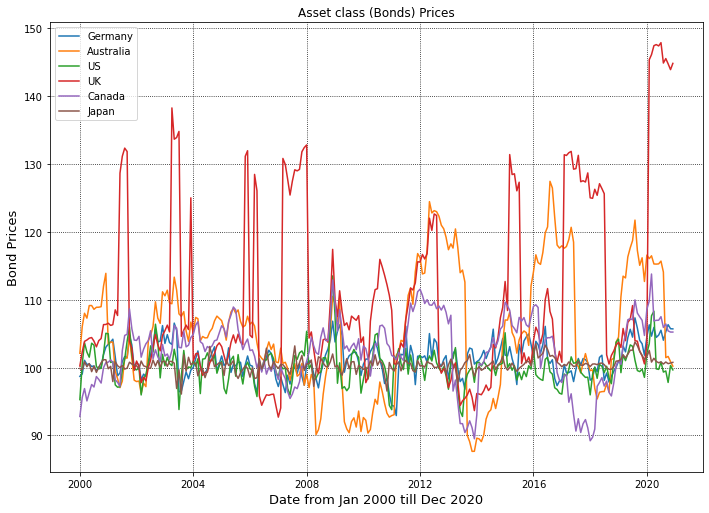

In [37]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Germany, label='Germany')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Australia, label='Australia')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.US, label='US')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.UK, label='UK')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Canada, label='Canada')
plt.plot(bond_df_2000_2020.index, bond_df_2000_2020.Japan, label='Japan')
plt.title('Asset class (Bonds) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Bond Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [38]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change()
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-01-01       NaN        NaN       NaN       NaN       NaN       NaN
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594

In [39]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830

In [40]:
print('There are {} rows in the DataFrame'.format(bond_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [41]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
bond_df_2000_2020_2 = bond_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [42]:
vol_bond_df_2000_2020 = bond_df_2000_2020

In [43]:
vol_bond_df_2000_2020.shape[0]

251

In [44]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_bond_df_2000_2020['Germany_Vol'] = vol_bond_df_2000_2020['Germany'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Australia_Vol'] = vol_bond_df_2000_2020['Australia'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['US_Vol'] = vol_bond_df_2000_2020['US'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['UK_Vol'] = vol_bond_df_2000_2020['UK'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Canada_Vol'] = vol_bond_df_2000_2020['Canada'].rolling(251).std() * math.sqrt(251)
vol_bond_df_2000_2020['Japan_Vol'] = vol_bond_df_2000_2020['Japan'].rolling(251).std() * math.sqrt(251)

In [45]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [46]:
vol_bond_df_2000_2020[['Germany_Vol','Australia_Vol','US_Vol','UK_Vol','Canada_Vol','Japan_Vol']]

Germany_Vol  Australia_Vol    US_Vol   UK_Vol  Canada_Vol  \
Date                                                                    
2020-12-01     0.307422       0.469516  0.389627  1.11048    0.318613   

            Japan_Vol  
Date                   
2020-12-01   0.189866

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [47]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility = (0.307422+0.469516+0.389627+1.11048+0.318613+0.189866) / 6
volatility

0.46425399999999994

In [48]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_bond_df_2000_2020 = 0.46425399999999994 / 6
target_vol_bond_df_2000_2020

0.07737566666666666

In [49]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_bond_df_2000_2020 = bond_df_2000_2020

In [50]:
port_bond_df_2000_2020['Germany_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Germany_Vol'] 
port_bond_df_2000_2020['Australia_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Australia_Vol'] 
port_bond_df_2000_2020['US_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['US_Vol']
port_bond_df_2000_2020['UK_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['UK_Vol']
port_bond_df_2000_2020['Canada_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Canada_Vol']
port_bond_df_2000_2020['Japan_Alloc'] = target_vol_bond_df_2000_2020 / vol_bond_df_2000_2020['Japan_Vol']

In [51]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_bond_df_2000_2020.dropna(axis=0, inplace=True)

In [52]:
port_bond_df_2000_2020[['Germany_Alloc','Australia_Alloc','US_Alloc','UK_Alloc','Canada_Alloc','Japan_Alloc']]

Germany_Alloc  Australia_Alloc  US_Alloc  UK_Alloc  Canada_Alloc  \
Date                                                                           
2020-12-01       0.251692         0.164799  0.198589  0.069678      0.242852   

            Japan_Alloc  
Date                     
2020-12-01     0.407528

In [53]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (bonds)

In [54]:
bond_df_2000_2020_2['Germany_R'] = bond_df_2000_2020_2['Germany'] * 0.251692
bond_df_2000_2020_2['Australia_R'] = bond_df_2000_2020_2['Australia'] * 0.164799
bond_df_2000_2020_2['US_R'] = bond_df_2000_2020_2['US'] * 0.198589
bond_df_2000_2020_2['UK_R'] = bond_df_2000_2020_2['UK'] * 0.069678
bond_df_2000_2020_2['Canada_R'] = bond_df_2000_2020_2['Canada'] * 0.242852
bond_df_2000_2020_2['Japan_R'] = bond_df_2000_2020_2['Japan'] * 0.407528

In [55]:
bond_df_2000_2020_2.head(5)

Germany  Australia        US        UK    Canada     Japan  \
Date                                                                      
2000-02-01  0.003647   0.038782  0.055730  0.020952  0.030388 -0.001702   
2000-03-01  0.020188   0.018196  0.030520  0.014952  0.013491  0.011635   
2000-04-01 -0.006035  -0.006667 -0.013313  0.001926 -0.018780 -0.007238   
2000-05-01  0.000697   0.017245 -0.007333  0.002595  0.012409  0.004594   
2000-06-01 -0.003680   0.000092  0.020290  0.000863  0.012880 -0.011830   

            Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  
Date                                                                        
2000-02-01   0.000918     0.006391  0.011067  0.001460  0.007380 -0.000694  
2000-03-01   0.005081     0.002999  0.006061  0.001042  0.003276  0.004742  
2000-04-01  -0.001519    -0.001099 -0.002644  0.000134 -0.004561 -0.002950  
2000-05-01   0.000175     0.002842 -0.001456  0.000181  0.003014  0.001872  
2000-06-01  -0.000926     0.000015  0.004029  0.000060  0.003128 -0.004821

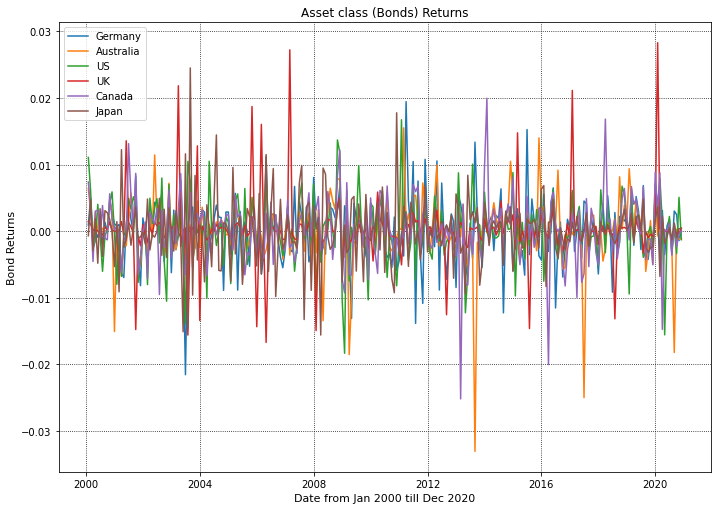

In [56]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Germany_R, label='Germany')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Australia_R, label='Australia')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.US_R, label='US')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.UK_R, label='UK')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Canada_R, label='Canada')
plt.plot(bond_df_2000_2020_2.index, bond_df_2000_2020_2.Japan_R, label='Japan')
plt.title('Asset class (Bonds) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020',fontsize=11)
plt.ylabel('Bond Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [28]:
# Adding up all the returns of all asset classes for all countries

In [57]:
bond_df_2000_2020_2['Portfolio_R'] = bond_df_2000_2020_2['Germany_R'] + bond_df_2000_2020_2['Australia_R'] + bond_df_2000_2020_2['US_R'] + bond_df_2000_2020_2['UK_R'] + bond_df_2000_2020_2['Canada_R'] + bond_df_2000_2020_2['Japan_R']

In [58]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [59]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
bond_df_2000_2020_2['Bond_Port_Value'] = ((bond_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [60]:
bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R', 'Portfolio_R', 'Bond_Port_Value']].head(5)

Germany_R  Australia_R      US_R      UK_R  Canada_R   Japan_R  \
Date                                                                         
2000-02-01   0.000918     0.006391  0.011067  0.001460  0.007380 -0.000694   
2000-03-01   0.005081     0.002999  0.006061  0.001042  0.003276  0.004742   
2000-04-01  -0.001519    -0.001099 -0.002644  0.000134 -0.004561 -0.002950   
2000-05-01   0.000175     0.002842 -0.001456  0.000181  0.003014  0.001872   
2000-06-01  -0.000926     0.000015  0.004029  0.000060  0.003128 -0.004821   

            Portfolio_R  Bond_Port_Value  
Date                                      
2000-02-01     0.026523      1026.522530  
2000-03-01     0.023200      1050.338123  
2000-04-01    -0.012638      1037.064222  
2000-05-01     0.006628      1043.937533  
2000-06-01     0.001485      1045.487827

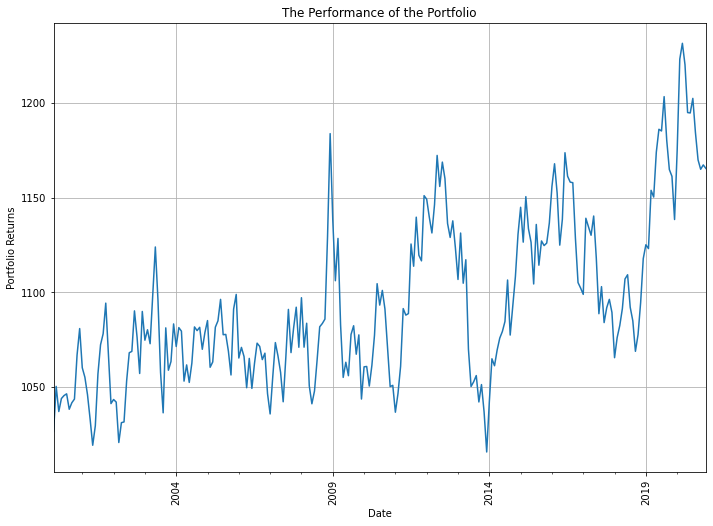

In [61]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2000 till Dec 2020');
plt.ylabel('Portfolio Returns');
bond_df_2000_2020_2['Bond_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [62]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(bond_df_2000_2020_2.Bond_Port_Value.max() - bond_df_2000_2020_2.Bond_Port_Value.min()) / bond_df_2000_2020_2.Bond_Port_Value.max()

0.17529121867906303

In [63]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (bond_df_2000_2020_2['Bond_Port_Value'][-1] / bond_df_2000_2020_2['Bond_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 13.54%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [64]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
bond_df_2000_2020_2['Monthly_Return'] = bond_df_2000_2020_2['Bond_Port_Value'].pct_change(1)

In [65]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = bond_df_2000_2020_2['Monthly_Return'].mean() / bond_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.03843987387494016

In [66]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

0.2635304981695694

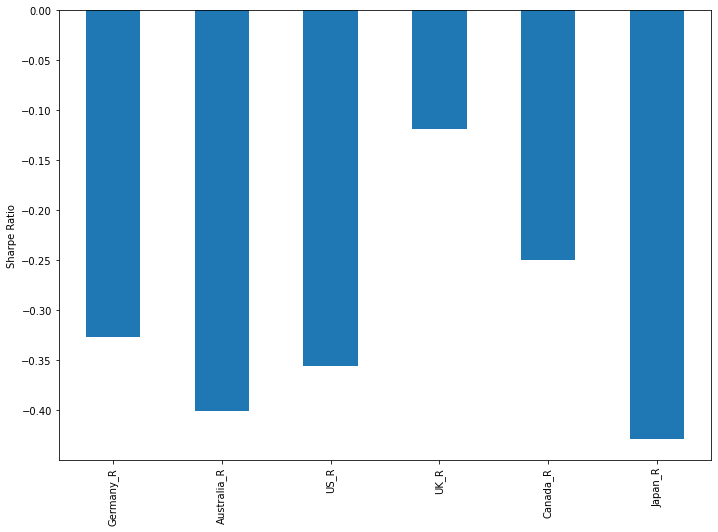

In [67]:
# Calcualte the Sharpe Ratio for bond portfolio
def bond_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sharpes = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
bond_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

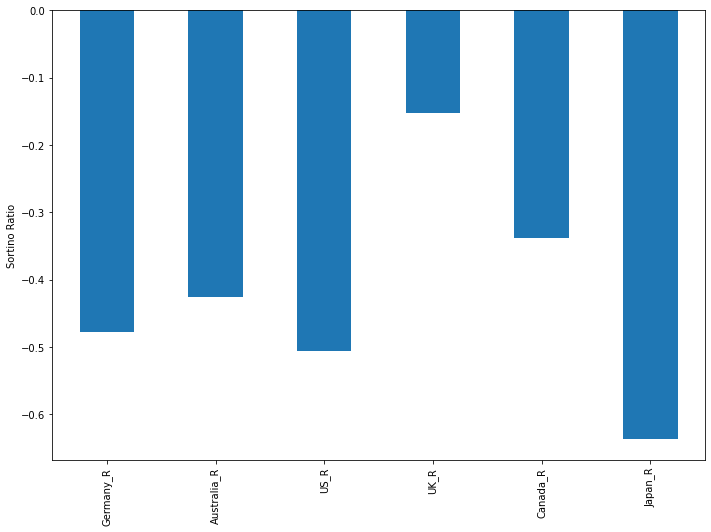

In [68]:
# Calcualte the Sortino Ratio for bond portfolio
def bond_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_sortinos = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
bond_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

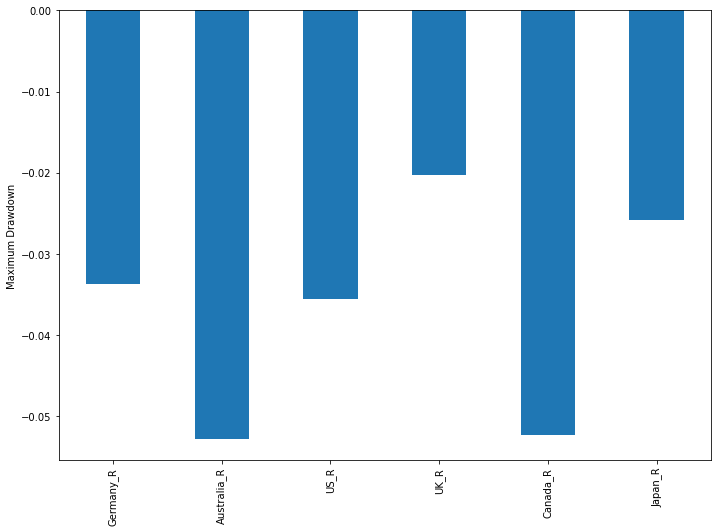

In [69]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def bond_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
bond_max_drawdown = bond_df_2000_2020_2[['Germany_R','Australia_R','US_R','UK_R','Canada_R','Japan_R']].apply(bond_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
bond_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020
- Target volatility 7.73 %.
- Maximum Drawdown 1.75%.
- Cumulative return of the of portfolio 13.54%
- Sharpe Ratio 3.84 %.


In [70]:
# Dataset (Equity_2000_2020.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2020 = pd.read_csv('Equity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2020.head()

(252, 15)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan     Spain  Sweden   \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1  1220.23   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8  1433.08   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0  1383.66   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  11467.9  1429.61   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  10688.5  1377.15   

        UK   Italy  Singapore  
0  6268.50  112.52    3958.79  
1  6232.56  109.75    3844.90  
2  6540.22  108.78    3907.83  
3  6327.43  103.99    3709.37  
4  6359.35  101.37    3666.83

In [71]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        252 non-null    object 
 1   Australia   252 non-null    float64
 2   Nethelands  252 non-null    float64
 3   Germany     252 non-null    float64
 4   Canada      252 non-null    float64
 5   Hong_Kong   252 non-null    float64
 6   France      252 non-null    float64
 7   Belgium     252 non-null    float64
 8   US          252 non-null    float64
 9   Japan       252 non-null    float64
 10  Spain       252 non-null    float64
 11  Sweden      252 non-null    float64
 12  UK          252 non-null    float64
 13  Italy       252 non-null    float64
 14  Singapore   252 non-null    float64
dtypes: float64(14), object(1)
memory usage: 29.7+ KB


In [72]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2020['Date'] = pd.to_datetime(equity_df_2000_2020.Date)

In [73]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
equity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        252 non-null    datetime64[ns]
 1   Australia   252 non-null    float64       
 2   Nethelands  252 non-null    float64       
 3   Germany     252 non-null    float64       
 4   Canada      252 non-null    float64       
 5   Hong_Kong   252 non-null    float64       
 6   France      252 non-null    float64       
 7   Belgium     252 non-null    float64       
 8   US          252 non-null    float64       
 9   Japan       252 non-null    float64       
 10  Spain       252 non-null    float64       
 11  Sweden      252 non-null    float64       
 12  UK          252 non-null    float64       
 13  Italy       252 non-null    float64       
 14  Singapore   252 non-null    float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 29.7 KB


In [74]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2020.set_index('Date',inplace=True)

In [75]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
equity_df_2000_2020.isnull().any()

Australia     False
Nethelands    False
Germany       False
Canada        False
Hong_Kong     False
France        False
Belgium       False
US            False
Japan         False
Spain         False
Sweden        False
UK            False
Italy         False
Singapore     False
dtype: bool

In [76]:
equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France ','Belgium','US','Japan ',
                     'Spain','Sweden ','UK','Italy','Singapore']].head(3)

Australia  Nethelands  Germany   Canada     Hong_Kong  \
Date                                                                
2000-01-01     3080.2      612.38  6835.60  8481.11  1.553234e+10   
2000-02-01     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2000-03-01     3133.3      662.29  7599.39  9462.39  1.740654e+10   

                 France        Belgium            US    Japan     Spain  \
Date                                                                      
2000-01-01  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1   
2000-02-01  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8   
2000-03-01  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0   

            Sweden        UK   Italy  Singapore  
Date                                             
2000-01-01  1220.23  6268.50  112.52    3958.79  
2000-02-01  1433.08  6232.56  109.75    3844.90  
2000-03-01  1383.66  6540.22  108.78    3907.83

In [77]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'France ':'France'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Japan ':'Japan'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Sweden ':'Sweden'})

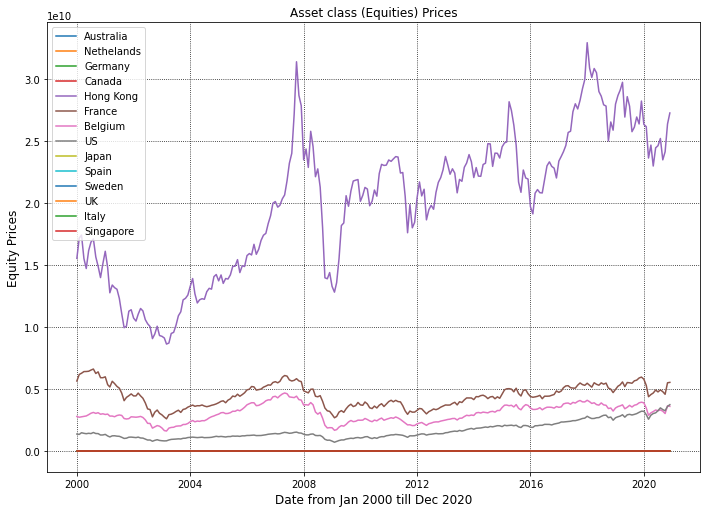

In [78]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Australia, label='Australia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Germany, label='Germany')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Canada, label='Canada')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.France, label='France')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Belgium, label='Belgium')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.US, label='US')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Japan, label='Japan')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Spain, label='Spain')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Sweden, label='Sweden')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.UK, label='UK')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Italy, label='Italy')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

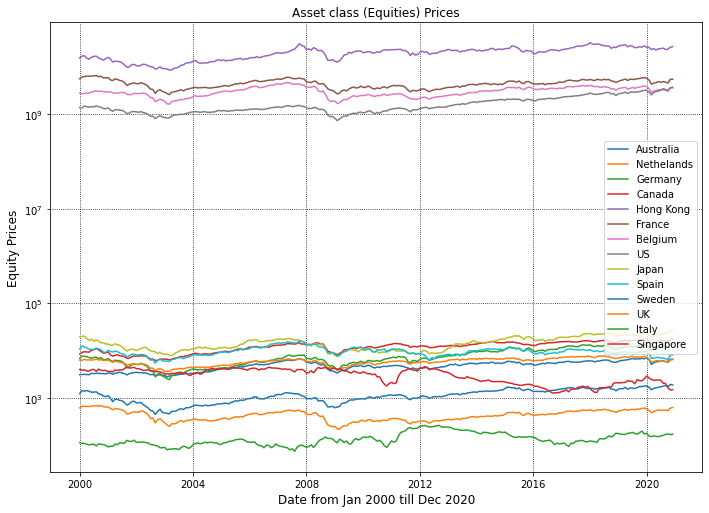

In [79]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Australia, label='Australia')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Nethelands, label='Nethelands')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Germany, label='Germany')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Canada, label='Canada')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Hong_Kong, label='Hong Kong')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.France, label='France')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Belgium, label='Belgium')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.US, label='US')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Japan, label='Japan')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Spain, label='Spain')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Sweden, label='Sweden')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.UK, label='UK')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Italy, label='Italy')
plt.plot(equity_df_2000_2020.index, equity_df_2000_2020.Singapore, label='Singapore')
plt.title('Asset class (Equities) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=12)
plt.ylabel('Equity Prices', fontsize=12)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [80]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2020 = equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                                           'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change()
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  0.174434 -0.005733   
2000-03-01  0.011566  0.096720  0.018928 -0.051709 -0.034485  0.049363   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  0.033209 -0.032536   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964 -0.036695  0.005045   

               Italy  Singapore  
Date                             
2000-01-01       NaN        NaN  
2000-02-01 -0.024618  -0.028769  
2000-03-01 -0.008838   0.016367  
2000-04-01 -0.044034  -0.050785  
2000-05-01 -0.025195  -0.011468

In [81]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2020.dropna(axis=0, inplace=True)
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  0.174434 -0.005733   
2000-03-01  0.011566  0.096720  0.018928 -0.051709 -0.034485  0.049363   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  0.033209 -0.032536   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964 -0.036695  0.005045   
2000-06-01  0.036446  0.023934  0.066040 -0.010029 -0.045057 -0.007334   

               Italy  Singapore  
Date                             
2000-02-01 -0.024618  -0.028769  
2000-03-01 -0.008838   0.016367  
2000-04-01 -0.044034  -0.050785  
2000-05-01 -0.025195  -0.011468  
2000-06-01  0.013515   0.075008

In [82]:
print('There are {} rows in the DataFrame'.format(equity_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [83]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
equity_df_2000_2020_2 = equity_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [84]:
vol_equity_df_2000_2020 = equity_df_2000_2020

In [85]:
equity_df_2000_2020.shape[0]

251

In [86]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_equity_df_2000_2020['Australia_Vol'] = vol_equity_df_2000_2020['Australia'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Nethelands_Vol'] = vol_equity_df_2000_2020['Nethelands'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Germany_Vol'] = vol_equity_df_2000_2020['Germany'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Canada_Vol'] = vol_equity_df_2000_2020['Canada'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Hong_Kong_Vol'] = vol_equity_df_2000_2020['Hong_Kong'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['France_Vol'] = vol_equity_df_2000_2020['France'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Belgium_Vol'] = vol_equity_df_2000_2020['Belgium'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['US_Vol'] = vol_equity_df_2000_2020['US'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Japan_Vol'] = vol_equity_df_2000_2020['Japan'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Spain_Vol'] = vol_equity_df_2000_2020['Spain'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Sweden_Vol'] = vol_equity_df_2000_2020['Sweden'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['UK_Vol'] = vol_equity_df_2000_2020['UK'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Italy_Vol'] = vol_equity_df_2000_2020['Italy'].rolling(251).std() * math.sqrt(251)
vol_equity_df_2000_2020['Singapore_Vol'] = vol_equity_df_2000_2020['Singapore'].rolling(251).std() * math.sqrt(251)

In [87]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [88]:
vol_equity_df_2000_2020[['Australia_Vol','Nethelands_Vol','Germany_Vol','Canada_Vol','Hong_Kong_Vol','France_Vol',
                         'Belgium_Vol','US_Vol','Japan_Vol','Spain_Vol','Sweden_Vol','UK_Vol','Italy_Vol','Singapore_Vol']]

Australia_Vol  Nethelands_Vol  Germany_Vol  Canada_Vol  \
Date                                                                 
2020-12-01       0.616103        0.847231     0.953758    0.646975   

            Hong_Kong_Vol  France_Vol  Belgium_Vol    US_Vol  Japan_Vol  \
Date                                                                      
2020-12-01       0.940866    0.820655       0.7774  0.692984   0.883287   

            Spain_Vol  Sweden_Vol    UK_Vol  Italy_Vol  Singapore_Vol  
Date                                                                   
2020-12-01   0.933972    0.863868  0.633582   1.111714       1.083001

In [89]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_equity = (0.616103 + 0.847231 + 0.953758 + 0.646975 + 0.940866 + 0.820655 + 0.7774 + 0.692984 + 0.883287 + 0.933972 + 0.863868 + 0.633582 + 1.111714 + 1.083001) / 14
Avg_vol_equity

0.8432425714285715

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [91]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
target_vol_equity_2000_2020 =0.8432425714285715 / 14
target_vol_equity_2000_2020

0.06023161224489797

In [92]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_equity_df_2000_2020 = equity_df_2000_2020

In [93]:
port_equity_df_2000_2020['Australia_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Australia_Vol'] 
port_equity_df_2000_2020['Nethelands_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Nethelands_Vol'] 
port_equity_df_2000_2020['Germany_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Germany_Vol'] 
port_equity_df_2000_2020['Canada_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Canada_Vol']
port_equity_df_2000_2020['Hong_Kong_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Hong_Kong_Vol']
port_equity_df_2000_2020['France_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['France_Vol']
port_equity_df_2000_2020['Belgium_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Belgium_Vol']
port_equity_df_2000_2020['US_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['US_Vol']
port_equity_df_2000_2020['Japan_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Japan_Vol']
port_equity_df_2000_2020['Spain_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Spain_Vol']
port_equity_df_2000_2020['Sweden_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Sweden_Vol']
port_equity_df_2000_2020['UK_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['UK_Vol']
port_equity_df_2000_2020['Italy_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Italy_Vol']
port_equity_df_2000_2020['Singapore_Alloc'] = target_vol_equity_2000_2020 / vol_equity_df_2000_2020['Singapore_Vol']

In [94]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_equity_df_2000_2020.dropna(axis=0, inplace=True)

In [95]:
port_equity_df_2000_2020[['Australia_Alloc','Nethelands_Alloc','Germany_Alloc','Canada_Alloc','Hong_Kong_Alloc',
                          'France_Alloc','Belgium_Alloc','US_Alloc','Japan_Alloc','Spain_Alloc','Sweden_Alloc',
                          'UK_Alloc','Italy_Alloc','Singapore_Alloc']]

Australia_Alloc  Nethelands_Alloc  Germany_Alloc  Canada_Alloc  \
Date                                                                         
2020-12-01         0.097762          0.071092       0.063152      0.093097   

            Hong_Kong_Alloc  France_Alloc  Belgium_Alloc  US_Alloc  \
Date                                                                 
2020-12-01         0.064017      0.073395       0.077478  0.086916   

            Japan_Alloc  Spain_Alloc  Sweden_Alloc  UK_Alloc  Italy_Alloc  \
Date                                                                        
2020-12-01      0.06819      0.06449      0.069723  0.095065     0.054179   

            Singapore_Alloc  
Date                         
2020-12-01         0.055615

In [96]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [97]:
equity_df_2000_2020_2['Australia_R'] = equity_df_2000_2020_2['Australia'] * 0.097762
equity_df_2000_2020_2['Nethelands_R'] = equity_df_2000_2020_2['Nethelands'] * 0.071092
equity_df_2000_2020_2['Germany_R'] = equity_df_2000_2020_2['Germany'] * 0.063152
equity_df_2000_2020_2['Canada_R'] = equity_df_2000_2020_2['Canada'] * 0.093097
equity_df_2000_2020_2['Hong_Kong_R'] = equity_df_2000_2020_2['Hong_Kong'] * 0.064017
equity_df_2000_2020_2['France_R'] = equity_df_2000_2020_2['France'] * 0.073395
equity_df_2000_2020_2['Belgium_R'] = equity_df_2000_2020_2['Belgium'] * 0.077478
equity_df_2000_2020_2['US_R'] = equity_df_2000_2020_2['US'] * 0.086916
equity_df_2000_2020_2['Japan_R'] = equity_df_2000_2020_2['Japan'] * 0.06819
equity_df_2000_2020_2['Spain_R'] = equity_df_2000_2020_2['Spain'] * 0.06449
equity_df_2000_2020_2['Sweden_R'] = equity_df_2000_2020_2['Sweden'] * 0.069723
equity_df_2000_2020_2['UK_R'] = equity_df_2000_2020_2['UK'] * 0.095065
equity_df_2000_2020_2['Italy_R'] = equity_df_2000_2020_2['Italy'] * 0.054179
equity_df_2000_2020_2['Singapore_R'] = equity_df_2000_2020_2['Singapore'] * 0.055615

In [98]:
equity_df_2000_2020_2.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014415    0.084751  0.118344  0.076391   0.105399  0.093846   
2000-03-01   0.002784   -0.002996 -0.005907  0.036521   0.013809  0.015359   
2000-04-01  -0.005585   -0.001374 -0.024306 -0.012130  -0.108421  0.021265   
2000-05-01  -0.011169   -0.008891 -0.041136 -0.010229  -0.051899  0.001019   
2000-06-01   0.074716    0.025385 -0.029743  0.101974   0.097997  0.003156   

             Belgium        US     Japan     Spain  ...  Hong_Kong_R  \
Date                                                ...                
2000-02-01 -0.021455 -0.020108  0.021485  0.161577  ...     0.006747   
2000-03-01  0.011566  0.096720  0.018928 -0.051709  ...     0.000884   
2000-04-01  0.012758 -0.030796 -0.116221 -0.039137  ...    -0.006941   
2000-05-01  0.012850 -0.021915 -0.091314 -0.067964  ...    -0.003322   
2000-06-01  0.036446  0.023934  0.066040 -0.010029  ...     0.006273   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  Sweden_R  \
Date                                                                      
2000-02-01  0.006888  -0.001662 -0.001748  0.001465  0.010420  0.012162   
2000-03-01  0.001127   0.000896  0.008407  0.001291 -0.003335 -0.002404   
2000-04-01  0.001561   0.000988 -0.002677 -0.007925 -0.002524  0.002315   
2000-05-01  0.000075   0.000996 -0.001905 -0.006227 -0.004383 -0.002559   
2000-06-01  0.000232   0.002824  0.002080  0.004503 -0.000647 -0.003141   

                UK_R   Italy_R  Singapore_R  
Date                                         
2000-02-01 -0.000545 -0.001334    -0.001600  
2000-03-01  0.004693 -0.000479     0.000910  
2000-04-01 -0.003093 -0.002386    -0.002824  
2000-05-01  0.000480 -0.001365    -0.000638  
2000-06-01 -0.000697  0.000732     0.004172  

[5 rows x 28 columns]

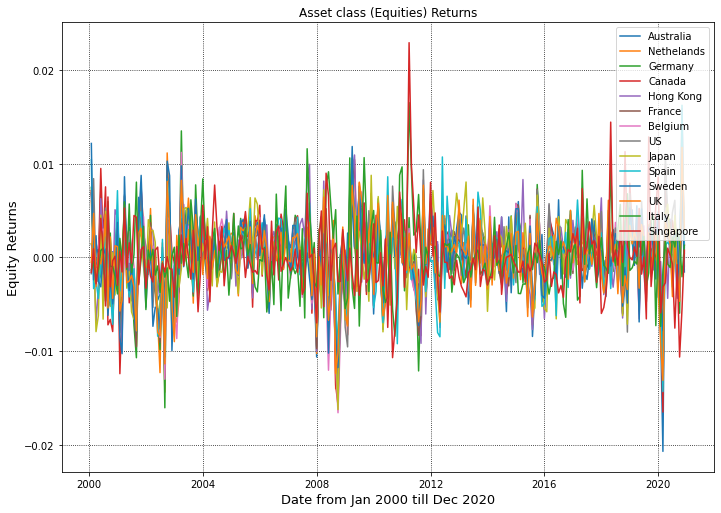

In [99]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Australia_R, label='Australia')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Nethelands_R, label='Nethelands')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Germany_R, label='Germany')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Canada_R, label='Canada')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Hong_Kong_R, label='Hong Kong')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.France_R, label='France')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Belgium_R, label='Belgium')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.US_R, label='US')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Japan_R, label='Japan')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Spain_R, label='Spain')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Sweden_R, label='Sweden')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.UK_R, label='UK')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Italy_R, label='Italy')
plt.plot(equity_df_2000_2020_2.index, equity_df_2000_2020_2.Singapore_R, label='Singapore')
plt.title('Asset class (Equities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [100]:
# Adding up all the returns of all asset classes for all countries

In [101]:
equity_df_2000_2020_2['Portfolio_R'] = equity_df_2000_2020_2['Australia_R'] + equity_df_2000_2020_2['Nethelands_R'] + equity_df_2000_2020_2['Germany_R'] + equity_df_2000_2020_2['Canada_R'] + equity_df_2000_2020_2['Hong_Kong_R'] + equity_df_2000_2020_2['France_R'] + equity_df_2000_2020_2['Belgium_R'] + equity_df_2000_2020_2['US_R'] + equity_df_2000_2020_2['Japan_R'] + equity_df_2000_2020_2['Spain_R'] + equity_df_2000_2020_2['Sweden_R'] + equity_df_2000_2020_2['UK_R'] + equity_df_2000_2020_2['Italy_R'] + equity_df_2000_2020_2['Singapore_R']

In [102]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [103]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
equity_df_2000_2020_2['Equity_Port_Value'] = ((equity_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [104]:
equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
                       'Singapore_R','Portfolio_R', 'Equity_Port_Value']].head(5)

Australia_R  Nethelands_R  Germany_R  Canada_R  Hong_Kong_R  \
Date                                                                      
2000-02-01     0.001409      0.006025   0.007474  0.007112     0.006747   
2000-03-01     0.000272     -0.000213  -0.000373  0.003400     0.000884   
2000-04-01    -0.000546     -0.000098  -0.001535 -0.001129    -0.006941   
2000-05-01    -0.001092     -0.000632  -0.002598 -0.000952    -0.003322   
2000-06-01     0.007304      0.001805  -0.001878  0.009493     0.006273   

            France_R  Belgium_R      US_R   Japan_R   Spain_R  Sweden_R  \
Date                                                                      
2000-02-01  0.006888  -0.001662 -0.001748  0.001465  0.010420  0.012162   
2000-03-01  0.001127   0.000896  0.008407  0.001291 -0.003335 -0.002404   
2000-04-01  0.001561   0.000988 -0.002677 -0.007925 -0.002524  0.002315   
2000-05-01  0.000075   0.000996 -0.001905 -0.006227 -0.004383 -0.002559   
2000-06-01  0.000232   0.002824  0.002080  0.004503 -0.000647 -0.003141   

                UK_R   Italy_R  Singapore_R  Portfolio_R  Equity_Port_Value  
Date                                                                         
2000-02-01 -0.000545 -0.001334    -0.001600     0.052813        1052.813355  
2000-03-01  0.004693 -0.000479     0.000910     0.015076        1068.685373  
2000-04-01 -0.003093 -0.002386    -0.002824    -0.026813        1040.030776  
2000-05-01  0.000480 -0.001365    -0.000638    -0.024122        1014.942760  
2000-06-01 -0.000697  0.000732     0.004172     0.033055        1048.491537

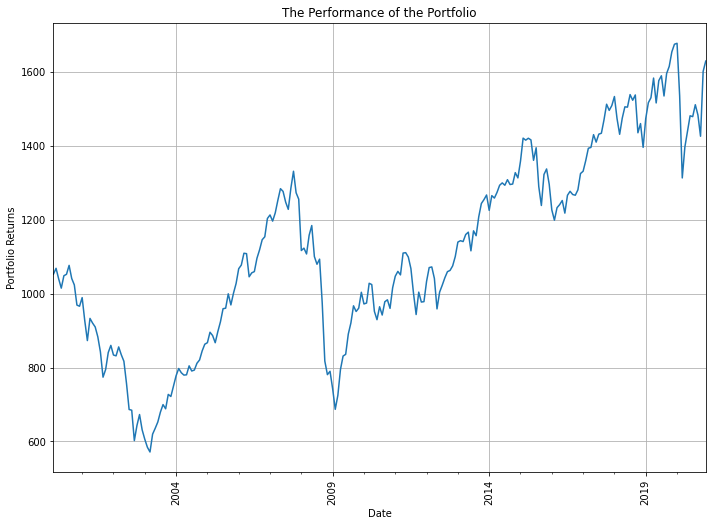

In [105]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date');
plt.ylabel('Portfolio Returns');
equity_df_2000_2020_2['Equity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [106]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(equity_df_2000_2020_2.Equity_Port_Value.max() - equity_df_2000_2020_2.Equity_Port_Value.min()) / equity_df_2000_2020_2.Equity_Port_Value.max()

0.6595385770841752

In [107]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (equity_df_2000_2020_2['Equity_Port_Value'][-1] / equity_df_2000_2020_2['Equity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 54.81%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [108]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
equity_df_2000_2020_2['Monthly_Return'] = equity_df_2000_2020_2['Equity_Port_Value'].pct_change(1)

In [109]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = equity_df_2000_2020_2['Monthly_Return'].mean() / equity_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.06434917451777755

In [111]:
equity_df_2000_2020_2.shape[0]

251

In [112]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(251)
Annualized_Sharpe_Ratio

1.0194826538695827

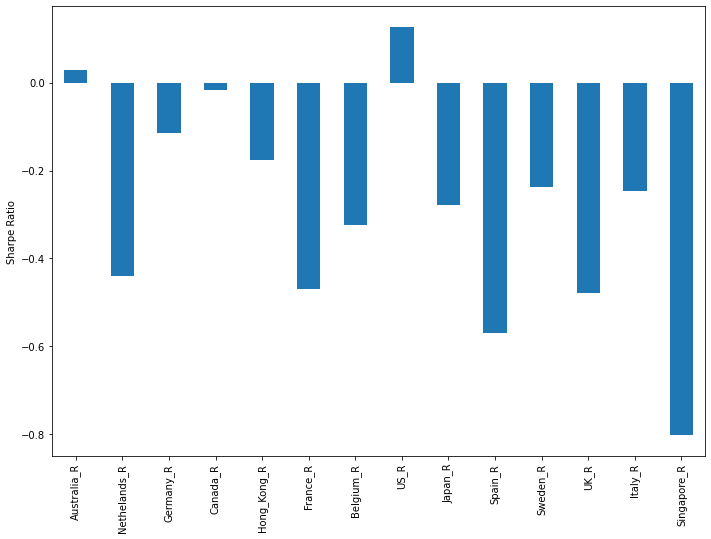

In [113]:
# Calcualte the Sharpe Ratio for equity portfolio
def equity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                       'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                       'Italy_R','Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sharpes = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
                                        'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R',
                                        'Italy_R','Singapore_R']].apply(equity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
equity_sharpes.plot.bar();   

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

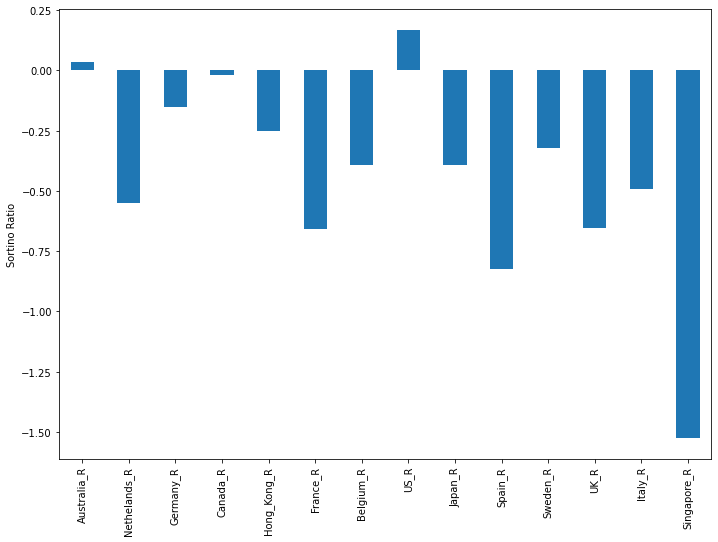

In [114]:
# Calcualte the Sortino Ratio for equity portfolio
def equity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_sortinos = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
equity_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

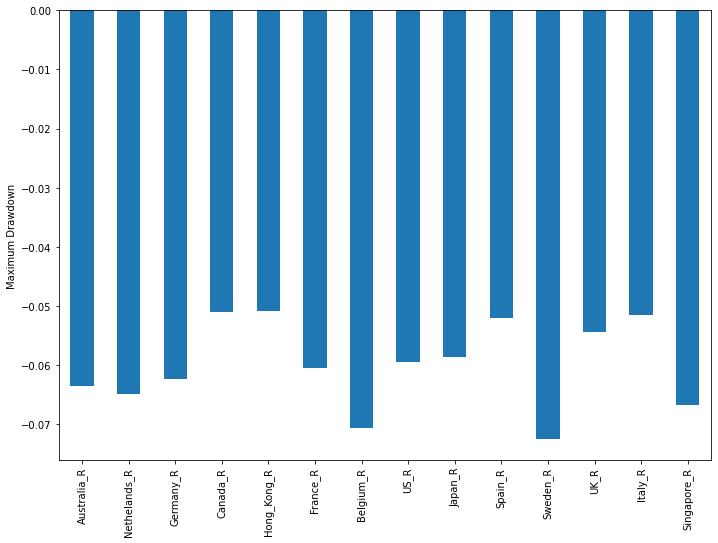

In [115]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def equity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
equity_max_drawdown = equity_df_2000_2020_2[['Australia_R','Nethelands_R','Germany_R','Canada_R','Hong_Kong_R',
            'France_R','Belgium_R','US_R','Japan_R','Spain_R','Sweden_R','UK_R','Italy_R',
            'Singapore_R']].apply(equity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
equity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till Dec 2020
- Target volatility 6.02 %.
- Maximum Drawdown 65.95 %.
- Cumulative return of the o=portfolio 54.81 %
- Sharpe Ratio 6.43 %.


In [116]:
# Dataset (Emerging_Market.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
emerg_market_df_2000_2020 = pd.read_csv('Emerging_market_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(emerg_market_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
emerg_market_df_2000_2020.head()

(252, 12)


Date  Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
0  1/1/2000    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
1  2/1/2000    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2  3/1/2000    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   
3  4/1/2000    390.40  1075.01  15537.60     509.51  242.85  192.06  12235.62   
4  5/1/2000    323.29  1124.19  14956.61     464.30  217.05  162.06  11864.13   

   Finland  South Africa  Indonesia  Venezuela  
0  3234.78       7771.66     636.37   90224.09  
1  3239.69       7287.01     576.54   69894.88  
2  3189.06       7388.34     583.28   47772.07  
3  3170.85       6913.24     526.74   48856.03  
4  2901.45       6921.37     454.33   55583.02

In [117]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          252 non-null    object 
 1   Thailand      252 non-null    float64
 2   Chile         252 non-null    float64
 3   Brazil        252 non-null    float64
 4   Argentina     252 non-null    float64
 5   Russia        252 non-null    float64
 6   Turkey        252 non-null    float64
 7   Portugal      252 non-null    float64
 8   Finland       252 non-null    float64
 9   South Africa  252 non-null    float64
 10  Indonesia     252 non-null    float64
 11  Venezuela     252 non-null    float64
dtypes: float64(11), object(1)
memory usage: 23.8+ KB


In [118]:
# Use pandas.to_datetime() function to convert argument to datetime
emerg_market_df_2000_2020['Date'] = pd.to_datetime(emerg_market_df_2000_2020.Date)

In [119]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          252 non-null    datetime64[ns]
 1   Thailand      252 non-null    float64       
 2   Chile         252 non-null    float64       
 3   Brazil        252 non-null    float64       
 4   Argentina     252 non-null    float64       
 5   Russia        252 non-null    float64       
 6   Turkey        252 non-null    float64       
 7   Portugal      252 non-null    float64       
 8   Finland       252 non-null    float64       
 9   South Africa  252 non-null    float64       
 10  Indonesia     252 non-null    float64       
 11  Venezuela     252 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 23.8 KB


In [120]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
emerg_market_df_2000_2020.set_index('Date',inplace=True)

In [121]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2000_2020.isnull().any()

Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [122]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df_2000_2020 = emerg_market_df_2000_2020.rename(columns={'South Africa':'South_Africa'})

In [123]:
emerg_market_df_2000_2020[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
Date                                                                           
2000-01-01    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
2000-02-01    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2000-03-01    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   

            Finland  South_Africa  Indonesia  Venezuela  
Date                                                     
2000-01-01  3234.78       7771.66     636.37   90224.09  
2000-02-01  3239.69       7287.01     576.54   69894.88  
2000-03-01  3189.06       7388.34     583.28   47772.07

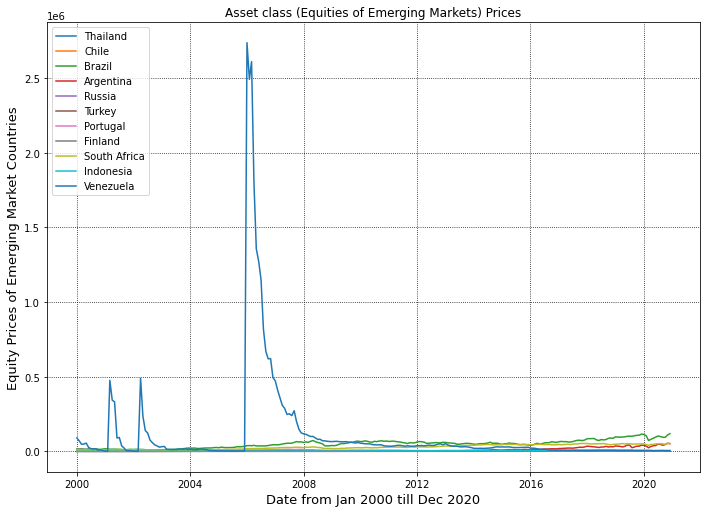

In [124]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile, label='Chile')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil, label='Brazil')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia, label='Russia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey, label='Turkey')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal, label='Portugal')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland, label='Finland')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa, label='South Africa')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia, label='Indonesia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

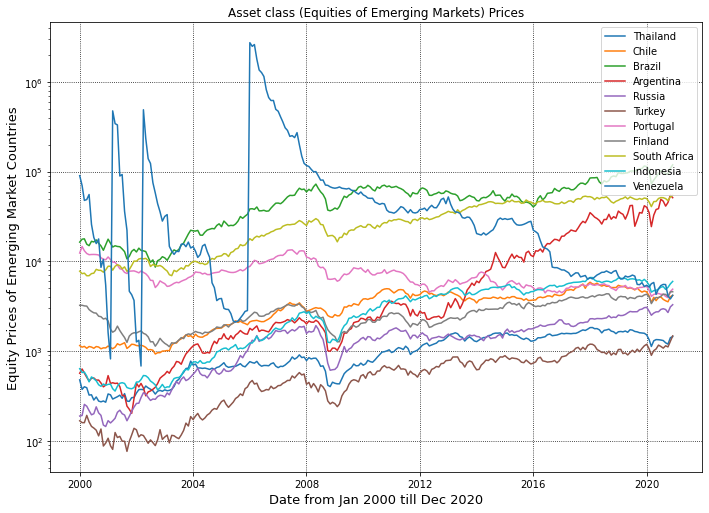

In [126]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile, label='Chile')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil, label='Brazil')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia, label='Russia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey, label='Turkey')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal, label='Portugal')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland, label='Finland')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa, label='South Africa')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia, label='Indonesia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Prices of Emerging Market Countries', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [128]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
emerg_market_df_2000_2020 = emerg_market_df_2000_2020[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal',
                                                       'Finland', 'South_Africa','Indonesia','Venezuela']].pct_change()
emerg_market_df_2000_2020.head(5)

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2000-01-01       NaN       NaN       NaN        NaN       NaN       NaN   
2000-02-01 -0.216199 -0.039291  0.077612   0.115420  0.014194 -0.046007   
2000-03-01  0.069459  0.020250  0.009070  -0.098790  0.329991 -0.001631   
2000-04-01 -0.024780 -0.047467 -0.128099  -0.104929 -0.046450  0.206407   
2000-05-01 -0.171901  0.045748 -0.037393  -0.088732 -0.106238 -0.156201   

            Portugal   Finland  South_Africa  Indonesia  Venezuela  
Date                                                                
2000-01-01       NaN       NaN           NaN        NaN        NaN  
2000-02-01  0.182367  0.001518     -0.062361  -0.094018  -0.225319  
2000-03-01 -0.103602 -0.015628      0.013906   0.011690  -0.316515  
2000-04-01 -0.067911 -0.005710     -0.064304  -0.096935   0.022690  
2000-05-01 -0.030361 -0.084961      0.001176  -0.137468   0.137690

In [129]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
emerg_market_df_2000_2020.dropna(axis=0, inplace=True)
emerg_market_df_2000_2020.head(5)

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2000-02-01 -0.216199 -0.039291  0.077612   0.115420  0.014194 -0.046007   
2000-03-01  0.069459  0.020250  0.009070  -0.098790  0.329991 -0.001631   
2000-04-01 -0.024780 -0.047467 -0.128099  -0.104929 -0.046450  0.206407   
2000-05-01 -0.171901  0.045748 -0.037393  -0.088732 -0.106238 -0.156201   
2000-06-01  0.007424 -0.013814  0.118432   0.070213 -0.101912 -0.107368   

            Portugal   Finland  South_Africa  Indonesia  Venezuela  
Date                                                                
2000-02-01  0.182367  0.001518     -0.062361  -0.094018  -0.225319  
2000-03-01 -0.103602 -0.015628      0.013906   0.011690  -0.316515  
2000-04-01 -0.067911 -0.005710     -0.064304  -0.096935   0.022690  
2000-05-01 -0.030361 -0.084961      0.001176  -0.137468   0.137690  
2000-06-01  0.004993 -0.047145      0.055314   0.133779  -0.536033

In [130]:
print('There are {} rows in the DataFrame'.format(emerg_market_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [131]:
# Use pandas.DataFrame.copy() function to make a copy of bond_df
emerg_market_df_2000_2020_2 = emerg_market_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [132]:
vol_emerg_market_df_2000_2020 = emerg_market_df_2000_2020

In [133]:
vol_emerg_market_df_2000_2020.shape[0]

251

In [134]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_emerg_market_df_2000_2020['Thailand_Vol'] = vol_emerg_market_df_2000_2020['Thailand'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Chile_Vol'] = vol_emerg_market_df_2000_2020['Chile'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Brazil_Vol'] = vol_emerg_market_df_2000_2020['Brazil'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Argentina_Vol'] = vol_emerg_market_df_2000_2020['Argentina'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Russia_Vol'] = vol_emerg_market_df_2000_2020['Russia'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Turkey_Vol'] = vol_emerg_market_df_2000_2020['Turkey'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Portugal_Vol'] = vol_emerg_market_df_2000_2020['Portugal'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Finland_Vol'] = vol_emerg_market_df_2000_2020['Finland'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['South_Africa_Vol'] = vol_emerg_market_df_2000_2020['South_Africa'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Indonesia_Vol'] = vol_emerg_market_df_2000_2020['Indonesia'].rolling(251).std() * math.sqrt(251)
vol_emerg_market_df_2000_2020['Venezuela_Vol'] = vol_emerg_market_df_2000_2020['Venezuela'].rolling(251).std() * math.sqrt(251)

In [135]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_emerg_market_df_2000_2020.dropna(axis=0, inplace=True)

In [136]:
vol_emerg_market_df_2000_2020[['Thailand_Vol','Chile_Vol','Brazil_Vol','Argentina_Vol','Russia_Vol','Turkey_Vol',
                               'Portugal_Vol','Finland_Vol','South_Africa_Vol','Indonesia_Vol','Venezuela_Vol']]

Thailand_Vol  Chile_Vol  Brazil_Vol  Argentina_Vol  Russia_Vol  \
Date                                                                         
2020-12-01      1.019075   0.756534    1.148901       1.823715    1.242477   

            Turkey_Vol  Portugal_Vol  Finland_Vol  South_Africa_Vol  \
Date                                                                  
2020-12-01    1.585053      0.859817     0.911778          0.804432   

            Indonesia_Vol  Venezuela_Vol  
Date                                      
2020-12-01       0.968431    1331.549394

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [137]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_emerg_market_df = (1.019075+0.756534+1.148901+1.823715+1.242477+1.585053+0.859817+0.911778+0.804432+0.968431+1331.549394) / 11
Avg_vol_emerg_market_df

122.06087336363635

In [138]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
vol_emerg_market_target_vol = 1 / 11
vol_emerg_market_target_vol

0.09090909090909091

In [139]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_emerg_market_df_2000_2020 = emerg_market_df_2000_2020

In [140]:
port_emerg_market_df_2000_2020['Thailand_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Thailand_Vol']
port_emerg_market_df_2000_2020['Chile_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Chile_Vol']
port_emerg_market_df_2000_2020['Brazil_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Brazil_Vol']
port_emerg_market_df_2000_2020['Argentina_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Argentina_Vol']
port_emerg_market_df_2000_2020['Russia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Russia_Vol']
port_emerg_market_df_2000_2020['Turkey_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Turkey_Vol']
port_emerg_market_df_2000_2020['Portugal_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Portugal_Vol']
port_emerg_market_df_2000_2020['Finland_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Finland_Vol']
port_emerg_market_df_2000_2020['South_Africa_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['South_Africa_Vol']
port_emerg_market_df_2000_2020['Indonesia_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Indonesia_Vol']
port_emerg_market_df_2000_2020['Venezuela_Alloc'] = vol_emerg_market_target_vol / vol_emerg_market_df_2000_2020['Venezuela_Vol']

In [141]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_emerg_market_df_2000_2020.dropna(axis=0, inplace=True)

In [142]:
port_emerg_market_df_2000_2020[['Thailand_Alloc','Chile_Alloc','Brazil_Alloc','Argentina_Alloc','Russia_Alloc',
                                'Turkey_Alloc','Portugal_Alloc','Finland_Alloc','South_Africa_Alloc','Indonesia_Alloc',
                                'Venezuela_Alloc']]

Thailand_Alloc  Chile_Alloc  Brazil_Alloc  Argentina_Alloc  \
Date                                                                     
2020-12-01        0.089207     0.120165      0.079127         0.049848   

            Russia_Alloc  Turkey_Alloc  Portugal_Alloc  Finland_Alloc  \
Date                                                                    
2020-12-01      0.073168      0.057354        0.105731       0.099705   

            South_Africa_Alloc  Indonesia_Alloc  Venezuela_Alloc  
Date                                                              
2020-12-01             0.11301         0.093873         0.000068

In [143]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (equities)

In [144]:
emerg_market_df_2000_2020_2['Thailand_R'] = emerg_market_df_2000_2020_2['Thailand'] * 0.089207
emerg_market_df_2000_2020_2['Chile_R'] = emerg_market_df_2000_2020_2['Chile'] * 0.089207
emerg_market_df_2000_2020_2['Brazil_R'] = emerg_market_df_2000_2020_2['Brazil'] * 0.079127
emerg_market_df_2000_2020_2['Argentina_R'] = emerg_market_df_2000_2020_2['Argentina'] * 0.049848 
emerg_market_df_2000_2020_2['Russia_R'] = emerg_market_df_2000_2020_2['Russia'] * 0.073168
emerg_market_df_2000_2020_2['Turkey_R'] = emerg_market_df_2000_2020_2['Turkey'] * 0.057354
emerg_market_df_2000_2020_2['Portugal_R'] = emerg_market_df_2000_2020_2['Portugal'] * 0.105731
emerg_market_df_2000_2020_2['Finland_R'] = emerg_market_df_2000_2020_2['Finland'] * 0.099705
emerg_market_df_2000_2020_2['South_Africa_R'] = emerg_market_df_2000_2020_2['South_Africa'] * 0.11301
emerg_market_df_2000_2020_2['Indonesia_R'] = emerg_market_df_2000_2020_2['Indonesia'] * 0.093873
emerg_market_df_2000_2020_2['Venezuela_R'] = emerg_market_df_2000_2020_2['Venezuela'] * 0.000068

In [145]:
emerg_market_df_2000_2020_2.head(5)

Thailand     Chile    Brazil  Argentina    Russia    Turkey  \
Date                                                                      
2000-02-01 -0.216199 -0.039291  0.077612   0.115420  0.014194 -0.046007   
2000-03-01  0.069459  0.020250  0.009070  -0.098790  0.329991 -0.001631   
2000-04-01 -0.024780 -0.047467 -0.128099  -0.104929 -0.046450  0.206407   
2000-05-01 -0.171901  0.045748 -0.037393  -0.088732 -0.106238 -0.156201   
2000-06-01  0.007424 -0.013814  0.118432   0.070213 -0.101912 -0.107368   

            Portugal   Finland  South_Africa  Indonesia  ...   Chile_R  \
Date                                                     ...             
2000-02-01  0.182367  0.001518     -0.062361  -0.094018  ... -0.003505   
2000-03-01 -0.103602 -0.015628      0.013906   0.011690  ...  0.001806   
2000-04-01 -0.067911 -0.005710     -0.064304  -0.096935  ... -0.004234   
2000-05-01 -0.030361 -0.084961      0.001176  -0.137468  ...  0.004081   
2000-06-01  0.004993 -0.047145      0.055314   0.133779  ... -0.001232   

            Brazil_R  Argentina_R  Russia_R  Turkey_R  Portugal_R  Finland_R  \
Date                                                                           
2000-02-01  0.006141     0.005753  0.001039 -0.002639    0.019282   0.000151   
2000-03-01  0.000718    -0.004925  0.024145 -0.000094   -0.010954  -0.001558   
2000-04-01 -0.010136    -0.005231 -0.003399  0.011838   -0.007180  -0.000569   
2000-05-01 -0.002959    -0.004423 -0.007773 -0.008959   -0.003210  -0.008471   
2000-06-01  0.009371     0.003500 -0.007457 -0.006158    0.000528  -0.004701   

            South_Africa_R  Indonesia_R  Venezuela_R  
Date                                                  
2000-02-01       -0.007047    -0.008826    -0.000015  
2000-03-01        0.001571     0.001097    -0.000022  
2000-04-01       -0.007267    -0.009100     0.000002  
2000-05-01        0.000133    -0.012905     0.000009  
2000-06-01        0.006251     0.012558    -0.000036  

[5 rows x 22 columns]

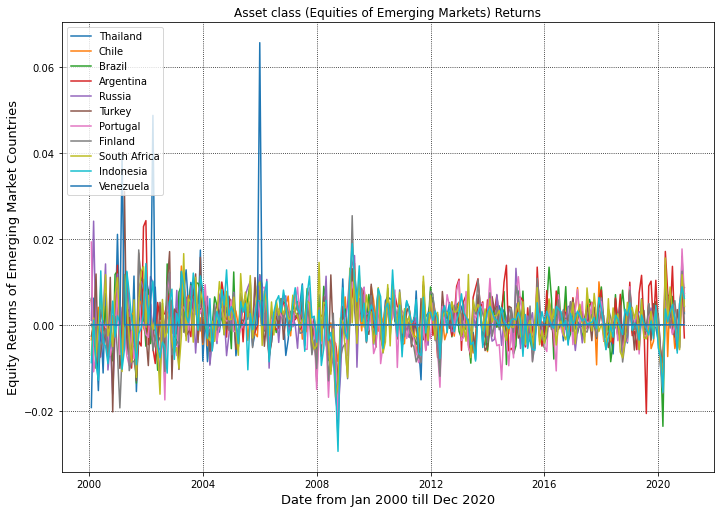

In [146]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Thailand_R, label='Thailand')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Chile_R, label='Chile')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Brazil_R, label='Brazil')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Argentina_R, label='Argentina')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Russia_R, label='Russia')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Turkey_R, label='Turkey')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Portugal_R, label='Portugal')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Finland_R, label='Finland')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.South_Africa_R, label='South Africa')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Indonesia_R, label='Indonesia')
plt.plot(emerg_market_df_2000_2020_2.index, emerg_market_df_2000_2020_2.Venezuela_R, label='Venezuela')
plt.title('Asset class (Equities of Emerging Markets) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Returns of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

In [147]:
# Adding up all the returns of all asset classes for all countries

In [148]:
emerg_market_df_2000_2020_2['Portfolio_R'] = emerg_market_df_2000_2020_2['Thailand_R'] + emerg_market_df_2000_2020_2['Chile_R'] + emerg_market_df_2000_2020_2['Brazil_R'] + emerg_market_df_2000_2020_2['Argentina_R'] + emerg_market_df_2000_2020_2['Russia_R'] + emerg_market_df_2000_2020_2['Turkey_R'] + emerg_market_df_2000_2020_2['Portugal_R'] + emerg_market_df_2000_2020_2['Finland_R'] + emerg_market_df_2000_2020_2['South_Africa_R'] + emerg_market_df_2000_2020_2['Indonesia_R'] + emerg_market_df_2000_2020_2['Venezuela_R']

In [149]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [150]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'] = ((emerg_market_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [151]:
emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                             'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R', 'Portfolio_R',
                             'Emerg_Market_Port_Value']].head(5)

Thailand_R   Chile_R  Brazil_R  Argentina_R  Russia_R  Turkey_R  \
Date                                                                          
2000-02-01   -0.019286 -0.003505  0.006141     0.005753  0.001039 -0.002639   
2000-03-01    0.006196  0.001806  0.000718    -0.004925  0.024145 -0.000094   
2000-04-01   -0.002211 -0.004234 -0.010136    -0.005231 -0.003399  0.011838   
2000-05-01   -0.015335  0.004081 -0.002959    -0.004423 -0.007773 -0.008959   
2000-06-01    0.000662 -0.001232  0.009371     0.003500 -0.007457 -0.006158   

            Portugal_R  Finland_R  South_Africa_R  Indonesia_R  Venezuela_R  \
Date                                                                          
2000-02-01    0.019282   0.000151       -0.007047    -0.008826    -0.000015   
2000-03-01   -0.010954  -0.001558        0.001571     0.001097    -0.000022   
2000-04-01   -0.007180  -0.000569       -0.007267    -0.009100     0.000002   
2000-05-01   -0.003210  -0.008471        0.000133    -0.012905     0.000009   
2000-06-01    0.000528  -0.004701        0.006251     0.012558    -0.000036   

            Portfolio_R  Emerg_Market_Port_Value  
Date                                              
2000-02-01    -0.008952               991.047885  
2000-03-01     0.017982              1008.869197  
2000-04-01    -0.037487               971.050180  
2000-05-01    -0.059811               912.970632  
2000-06-01     0.013287               925.100889

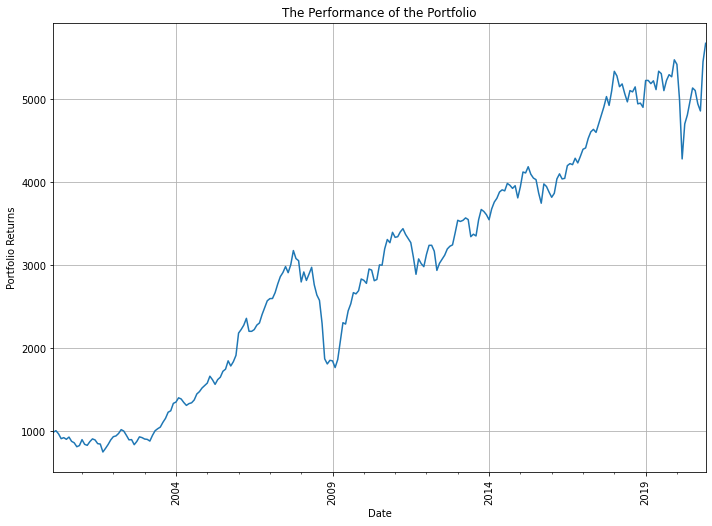

In [152]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [153]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(emerg_market_df_2000_2020_2.Emerg_Market_Port_Value.max() - emerg_market_df_2000_2020_2.Emerg_Market_Port_Value.min()) / emerg_market_df_2000_2020_2.Emerg_Market_Port_Value.max()

0.8673780963970384

In [154]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'][-1] / emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 472.48%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [155]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
emerg_market_df_2000_2020_2['Monthly_Return'] = emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'].pct_change(1)

In [156]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = emerg_market_df_2000_2020_2['Monthly_Return'].mean() / emerg_market_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.1917805089237107

In [157]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(46)
Annualized_Sharpe_Ratio

1.3007186958523063

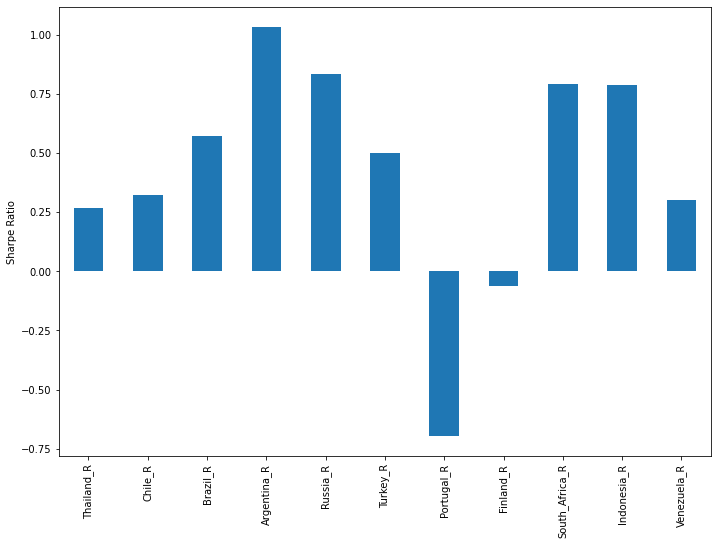

In [158]:
# Calcualte the Sharpe Ratio for equity portfolio
def emerg_market_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sharpes = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
emerg_market_sharpes.plot.bar();  

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

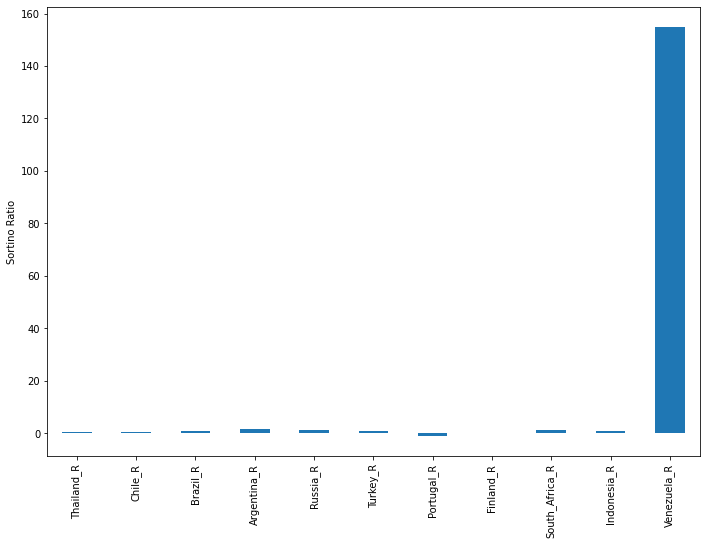

In [159]:
# Calcualte the Sortino Ratio for equity portfolio
def emerg_market_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]
rf = .0164 # Risk Free Rate
n = 46 # 46 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_sortinos = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R',
                                                     'Portugal_R','Finland_R','South_Africa_R','Indonesia_R',
                                                     'Venezuela_R']].apply(emerg_market_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
emerg_market_sortinos.plot.bar();   

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

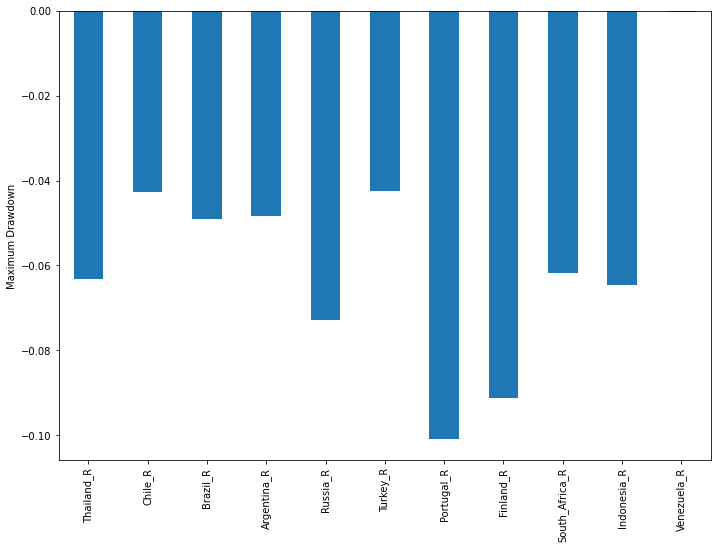

In [160]:
# Calcualte the Maximum Drawdown (MDD) for bond portfolio
def emerg_market_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
emerg_market_max_drawdown = emerg_market_df_2000_2020_2[['Thailand_R','Chile_R','Brazil_R','Argentina_R','Russia_R','Turkey_R','Portugal_R',
                   'Finland_R','South_Africa_R','Indonesia_R','Venezuela_R']].apply(emerg_market_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
emerg_market_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till Dec 2020.
- Target volatility 9 %.
- Maximum Drawdown 86.73 %.
- Cumulative return of the of portfolio 472 %
- Sharpe Ratio 19.17 %.

In [161]:
# Dataset (Commodity.csv) from Master Equity Portfolio Excel file
# Dataset includes: Gold, WTI (West Texas Intermediate Crude Oil), Heat Oil, Natural Gas, Silver, US Coffee,
# US Corn, Wheat, Copper, Platinum, and Cocoa

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
commodity_df_2000_2020 = pd.read_csv('Commodity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(commodity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
commodity_df_2000_2020.head()

(252, 12)


Date   Gold    WTI  Heat_Oil  Natural_Gas  Silver  US_Coffee  US_Corn  \
0  1/1/2000  283.2  27.64      1.95       2662.0  5287.0      111.1   220.00   
1  2/1/2000  292.4  30.43      1.87       2761.0  5048.0       99.9   215.00   
2  3/1/2000  278.4  26.90      1.84       2945.0  5020.0      103.7   236.00   
3  4/1/2000  273.1  25.74      1.84       3141.0  4960.0       95.3   223.75   
4  5/1/2000  271.7  29.01      1.82       4356.0  4941.0       93.0   225.00   

    Wheat  Copper  Platinum   Cocoa  
0  256.25    0.84     971.4  2541.0  
1  247.00    0.79     900.4  2588.0  
2  262.25    0.80     933.7  2455.0  
3  242.25    0.79     883.4  2451.0  
4  274.75    0.81     931.7  2238.0

In [162]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         252 non-null    object 
 1   Gold         252 non-null    float64
 2   WTI          252 non-null    float64
 3   Heat_Oil     252 non-null    float64
 4   Natural_Gas  252 non-null    float64
 5   Silver       252 non-null    float64
 6   US_Coffee    252 non-null    float64
 7   US_Corn      252 non-null    float64
 8   Wheat        252 non-null    float64
 9   Copper       252 non-null    float64
 10  Platinum     252 non-null    float64
 11  Cocoa        252 non-null    float64
dtypes: float64(11), object(1)
memory usage: 23.8+ KB


In [165]:
# Use pandas.to_datetime() function to convert argument to datetime
commodity_df_2000_2020['Date'] = pd.to_datetime(commodity_df_2000_2020.Date)

In [166]:
# Use pandas.DataFrame.astype() function to casta pandas object to a specified data type
commodity_df_2000_2020['Natural_Gas'] = commodity_df_2000_2020['Natural_Gas'].astype(float)
commodity_df_2000_2020['Silver'] = commodity_df_2000_2020['Silver'].astype(float)
commodity_df_2000_2020['Copper'] = commodity_df_2000_2020['Copper'].astype(float)
commodity_df_2000_2020['Cocoa'] = commodity_df_2000_2020['Cocoa'].astype(float)

In [167]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
commodity_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         252 non-null    datetime64[ns]
 1   Gold         252 non-null    float64       
 2   WTI          252 non-null    float64       
 3   Heat_Oil     252 non-null    float64       
 4   Natural_Gas  252 non-null    float64       
 5   Silver       252 non-null    float64       
 6   US_Coffee    252 non-null    float64       
 7   US_Corn      252 non-null    float64       
 8   Wheat        252 non-null    float64       
 9   Copper       252 non-null    float64       
 10  Platinum     252 non-null    float64       
 11  Cocoa        252 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 23.8 KB


In [169]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
commodity_df_2000_2020.set_index('Date',inplace=True)

In [170]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
commodity_df_2000_2020.isnull().any()

Gold           False
WTI            False
Heat_Oil       False
Natural_Gas    False
Silver         False
US_Coffee      False
US_Corn        False
Wheat          False
Copper         False
Platinum       False
Cocoa          False
dtype: bool

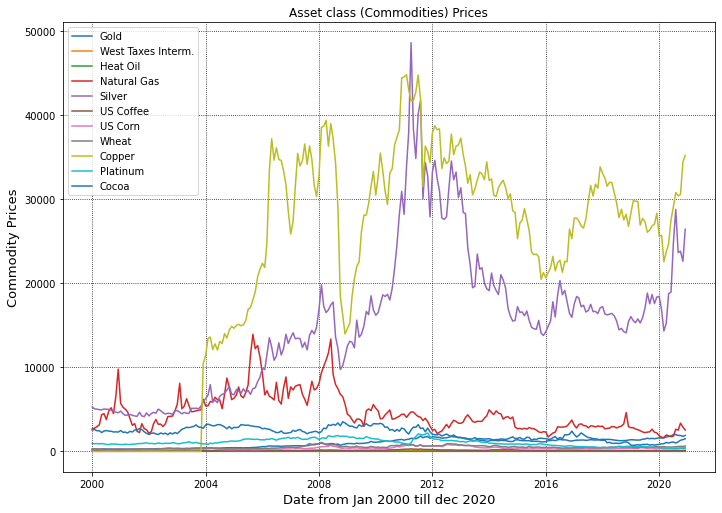

In [171]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Gold, label='Gold')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Silver, label='Silver')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Copper, label='Copper')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2020', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

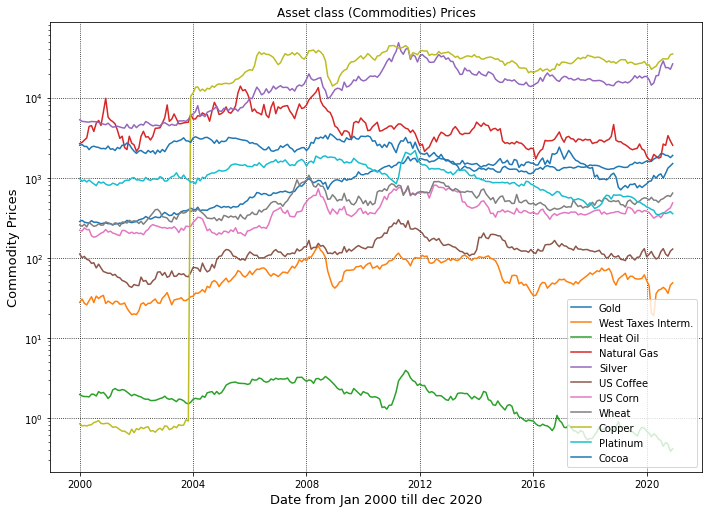

In [172]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Gold, label='Gold')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.WTI, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Heat_Oil, label='Heat Oil')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Natural_Gas, label='Natural Gas')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Silver, label='Silver')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Coffee, label='US Coffee')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.US_Corn, label='US Corn')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Wheat, label='Wheat')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Copper, label='Copper')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Platinum, label='Platinum')
plt.plot(commodity_df_2000_2020.index, commodity_df_2000_2020.Cocoa, label='Cocoa')
plt.title('Asset class (Commodities) Prices')
plt.xlabel('Date from Jan 2000 till dec 2020', fontsize=13)
plt.ylabel('Commodity Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [173]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
commodity_df_2000_2020 = commodity_df_2000_2020[['Gold','WTI','Heat_Oil','Natural_Gas','Silver','US_Coffee',
                                                 'US_Corn','Wheat','Copper','Platinum','Cocoa']].pct_change()
commodity_df_2000_2020.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-01-01       NaN       NaN       NaN          NaN       NaN        NaN   
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-01-01       NaN       NaN       NaN       NaN       NaN  
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903

In [174]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
commodity_df_2000_2020.dropna(axis=0, inplace=True)
commodity_df_2000_2020.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum     Cocoa  
Date                                                          
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  0.018497  
2000-03-01  0.097674  0.061741  0.012658  0.036984 -0.051391  
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872 -0.001629  
2000-05-01  0.005587  0.134159  0.025316  0.054675 -0.086903  
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  0.079982

In [175]:
print('There are {} rows in the DataFrame'.format(commodity_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [178]:
# Use pandas.DataFrame.copy() function to make a copy of commodity_df
commodity_df_2000_2020_2 = commodity_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [179]:
vol_com_df_2000_2020 = commodity_df_2000_2020

In [180]:
vol_com_df_2000_2020.shape[0]

251

In [181]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_com_df_2000_2020['Gold_Vol'] = vol_com_df_2000_2020['Gold'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['WTI_Vol'] = vol_com_df_2000_2020['WTI'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Heat_Oil_Vol'] = vol_com_df_2000_2020['Heat_Oil'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Natural_Gas_Vol'] = vol_com_df_2000_2020['Natural_Gas'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Silver_Vol'] = vol_com_df_2000_2020['Silver'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['US_Coffee_Vol'] = vol_com_df_2000_2020['US_Coffee'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['US_Corn_Vol'] = vol_com_df_2000_2020['US_Corn'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Wheat_Vol'] = vol_com_df_2000_2020['Wheat'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Copper_Vol'] = vol_com_df_2000_2020['Copper'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Platinum_Vol'] = vol_com_df_2000_2020['Platinum'].rolling(251).std() * math.sqrt(251)
vol_com_df_2000_2020['Cocoa_Vol'] = vol_com_df_2000_2020['Cocoa'].rolling(251).std() * math.sqrt(251)

In [183]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_com_df_2000_2020.dropna(axis=0, inplace=True)

In [184]:
vol_com_df_2000_2020[['Gold_Vol','WTI_Vol','Heat_Oil_Vol','Natural_Gas_Vol','Silver_Vol','US_Coffee_Vol','US_Corn_Vol',
                      'Wheat_Vol','Copper_Vol','Platinum_Vol','Cocoa_Vol']]

Gold_Vol   WTI_Vol  Heat_Oil_Vol  Natural_Gas_Vol  Silver_Vol  \
Date                                                                        
2020-12-01  0.761646  1.800685      1.311096         2.473119     1.42329   

            US_Coffee_Vol  US_Corn_Vol  Wheat_Vol    Copper_Vol  Platinum_Vol  \
Date                                                                            
2020-12-01       1.458071     1.334751    1.40575  11460.530537      1.079163   

            Cocoa_Vol  
Date                   
2020-12-01   1.326298

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy which focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is an inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [185]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
volatility_com = (0.761646+1.800685+1.311096+2.473119+1.42329+1.458071+1.334751+1.40575+11460.530537+1.079163+1.326298) / 11
volatility_com

1043.173127818182

In [186]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
commodity_target_vol = 1 / 11
commodity_target_vol

0.09090909090909091

In [187]:
# Create a new dataframe called commodity_portfolio_df which calculates the allocation to each asset class 
port_com_df_2000_2020 = commodity_df_2000_2020

In [188]:
port_com_df_2000_2020['Gold_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Gold_Vol']
port_com_df_2000_2020['WTI_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['WTI_Vol']
port_com_df_2000_2020['Heat_Oil_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Heat_Oil_Vol']
port_com_df_2000_2020['Natural_Gas_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Natural_Gas_Vol']
port_com_df_2000_2020['Silver_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Silver_Vol']
port_com_df_2000_2020['US_Coffee_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['US_Coffee_Vol']
port_com_df_2000_2020['US_Corn_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['US_Corn_Vol']
port_com_df_2000_2020['Wheat_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Wheat_Vol']
port_com_df_2000_2020['Copper_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Copper_Vol']
port_com_df_2000_2020['Platinum_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Platinum_Vol']
port_com_df_2000_2020['Cocoa_Alloc'] = commodity_target_vol / vol_com_df_2000_2020['Cocoa_Vol']

In [189]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_com_df_2000_2020.dropna(axis=0, inplace=True)

In [190]:
port_com_df_2000_2020[['Gold_Alloc','WTI_Alloc','Heat_Oil_Alloc','Natural_Gas_Alloc','Silver_Alloc',
                        'US_Coffee_Alloc','US_Corn_Alloc','Wheat_Alloc','Copper_Alloc','Platinum_Alloc','Cocoa_Alloc']]

Gold_Alloc  WTI_Alloc  Heat_Oil_Alloc  Natural_Gas_Alloc  \
Date                                                                   
2020-12-01    0.119359   0.050486        0.069338           0.036759   

            Silver_Alloc  US_Coffee_Alloc  US_Corn_Alloc  Wheat_Alloc  \
Date                                                                    
2020-12-01      0.063873         0.062349       0.068109     0.064669   

            Copper_Alloc  Platinum_Alloc  Cocoa_Alloc  
Date                                                   
2020-12-01      0.000008         0.08424     0.068543

In [153]:
# I will multiply the monthly commodity prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (Commodity)

In [191]:
commodity_df_2000_2020_2['Gold_R'] = commodity_df_2000_2020_2['Gold'] * 0.119359
commodity_df_2000_2020_2['WTI_R'] = commodity_df_2000_2020_2['WTI'] * 0.050486
commodity_df_2000_2020_2['Heat_Oil_R'] = commodity_df_2000_2020_2['Heat_Oil'] * 0.069338
commodity_df_2000_2020_2['Natural_Gas_R'] = commodity_df_2000_2020_2['Natural_Gas'] * 0.036759
commodity_df_2000_2020_2['Silver_R'] = commodity_df_2000_2020_2['Silver'] * 0.063873
commodity_df_2000_2020_2['US_Coffee_R'] = commodity_df_2000_2020_2['US_Coffee'] * 0.062349
commodity_df_2000_2020_2['US_Corn_R'] = commodity_df_2000_2020_2['US_Corn'] * 0.068109
commodity_df_2000_2020_2['Wheat_R'] = commodity_df_2000_2020_2['Wheat'] * 0.064669
commodity_df_2000_2020_2['Copper_R'] = commodity_df_2000_2020_2['Copper'] * 0.000008
commodity_df_2000_2020_2['Platinum_R'] = commodity_df_2000_2020_2['Platinum'] * 0.08424 
commodity_df_2000_2020_2['Cocoa_R'] = commodity_df_2000_2020_2['Cocoa'] * 0.068543

In [192]:
commodity_df_2000_2020_2.head(5)

Gold       WTI  Heat_Oil  Natural_Gas    Silver  US_Coffee  \
Date                                                                         
2000-02-01  0.032486  0.100941 -0.041026     0.037190 -0.045205  -0.100810   
2000-03-01 -0.047880 -0.116004 -0.016043     0.066643 -0.005547   0.038038   
2000-04-01 -0.019037 -0.043123  0.000000     0.066553 -0.011952  -0.081003   
2000-05-01 -0.005126  0.127040 -0.010870     0.386819 -0.003831  -0.024134   
2000-06-01  0.067722  0.120303  0.082418     0.027548  0.018620  -0.087634   

             US_Corn     Wheat    Copper  Platinum  ...     WTI_R  Heat_Oil_R  \
Date                                                ...                         
2000-02-01 -0.022727 -0.036098 -0.059524 -0.073090  ...  0.005096   -0.002845   
2000-03-01  0.097674  0.061741  0.012658  0.036984  ... -0.005857   -0.001112   
2000-04-01 -0.051907 -0.076263 -0.012500 -0.053872  ... -0.002177    0.000000   
2000-05-01  0.005587  0.134159  0.025316  0.054675  ...  0.006414   -0.000754   
2000-06-01 -0.166667 -0.055505  0.012346 -0.056671  ...  0.006074    0.005715   

            Natural_Gas_R  Silver_R  US_Coffee_R  US_Corn_R   Wheat_R  \
Date                                                                    
2000-02-01       0.001367 -0.002887    -0.006285  -0.001548 -0.002334   
2000-03-01       0.002450 -0.000354     0.002372   0.006653  0.003993   
2000-04-01       0.002446 -0.000763    -0.005050  -0.003535 -0.004932   
2000-05-01       0.014219 -0.000245    -0.001505   0.000380  0.008676   
2000-06-01       0.001013  0.001189    -0.005464  -0.011351 -0.003589   

                Copper_R  Platinum_R   Cocoa_R  
Date                                            
2000-02-01 -4.761905e-07   -0.006157  0.001268  
2000-03-01  1.012658e-07    0.003115 -0.003522  
2000-04-01 -1.000000e-07   -0.004538 -0.000112  
2000-05-01  2.025316e-07    0.004606 -0.005957  
2000-06-01  9.876543e-08   -0.004774  0.005482  

[5 rows x 22 columns]

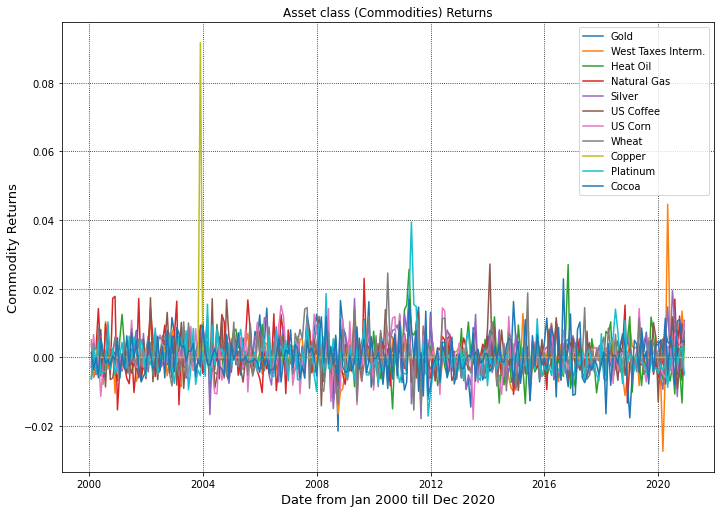

In [193]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Gold_R, label='Gold')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.WTI_R, label='West Taxes Interm.')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Heat_Oil_R, label='Heat Oil')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Natural_Gas_R, label='Natural Gas')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Silver_R, label='Silver')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.US_Coffee_R, label='US Coffee')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.US_Corn_R, label='US Corn')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Wheat_R, label='Wheat')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Copper_R, label='Copper')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Platinum_R, label='Platinum')
plt.plot(commodity_df_2000_2020_2.index, commodity_df_2000_2020_2.Cocoa_R, label='Cocoa')
plt.title('Asset class (Commodities) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Commodity Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

In [194]:
# Adding up all the returns of all asset classes for all commodities

In [195]:
commodity_df_2000_2020_2['Portfolio_R'] = commodity_df_2000_2020_2['Gold_R'] + commodity_df_2000_2020_2['WTI_R'] + commodity_df_2000_2020_2['Heat_Oil_R'] + commodity_df_2000_2020_2['Natural_Gas_R'] + commodity_df_2000_2020_2['Silver_R'] + commodity_df_2000_2020_2['US_Coffee_R'] + commodity_df_2000_2020_2['US_Corn_R'] + commodity_df_2000_2020_2['Wheat_R'] + commodity_df_2000_2020_2['Copper_R'] + commodity_df_2000_2020_2['Platinum_R'] + commodity_df_2000_2020_2['Cocoa_R']

In [196]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [197]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
commodity_df_2000_2020_2['Commodity_Port_Value'] = ((commodity_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [198]:
commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
                          'Wheat_R','Copper_R','Platinum_R','Cocoa_R','Portfolio_R', 'Commodity_Port_Value']].head(5)

Gold_R     WTI_R  Heat_Oil_R  Natural_Gas_R  Silver_R  \
Date                                                                  
2000-02-01  0.003877  0.005096   -0.002845       0.001367 -0.002887   
2000-03-01 -0.005715 -0.005857   -0.001112       0.002450 -0.000354   
2000-04-01 -0.002272 -0.002177    0.000000       0.002446 -0.000763   
2000-05-01 -0.000612  0.006414   -0.000754       0.014219 -0.000245   
2000-06-01  0.008083  0.006074    0.005715       0.001013  0.001189   

            US_Coffee_R  US_Corn_R   Wheat_R      Copper_R  Platinum_R  \
Date                                                                     
2000-02-01    -0.006285  -0.001548 -0.002334 -4.761905e-07   -0.006157   
2000-03-01     0.002372   0.006653  0.003993  1.012658e-07    0.003115   
2000-04-01    -0.005050  -0.003535 -0.004932 -1.000000e-07   -0.004538   
2000-05-01    -0.001505   0.000380  0.008676  2.025316e-07    0.004606   
2000-06-01    -0.005464  -0.011351 -0.003589  9.876543e-08   -0.004774   

             Cocoa_R  Portfolio_R  Commodity_Port_Value  
Date                                                     
2000-02-01  0.001268    -0.010449            989.551087  
2000-03-01 -0.003522     0.002022            991.551539  
2000-04-01 -0.000112    -0.020934            970.794486  
2000-05-01 -0.005957     0.025224            995.281505  
2000-06-01  0.005482     0.002377            997.647248

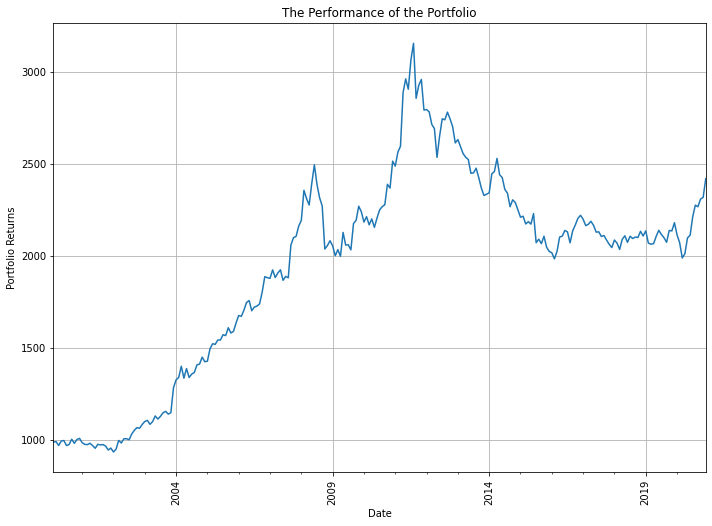

In [199]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
commodity_df_2000_2020_2['Commodity_Port_Value'].plot(grid=True)
plt.xticks(rotation=90)
plt.show();

In [200]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
(commodity_df_2000_2020_2.Commodity_Port_Value.max() - commodity_df_2000_2020_2.Commodity_Port_Value.min()) / commodity_df_2000_2020_2.Commodity_Port_Value.max()

0.7035685492683017

In [201]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (commodity_df_2000_2020_2['Commodity_Port_Value'][-1] / commodity_df_2000_2020_2['Commodity_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f}%".format(cumulative_return))

The Cumulative Return of the Portfolio is 144.58%


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [202]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
commodity_df_2000_2020_2['Monthly_Return'] = commodity_df_2000_2020_2['Commodity_Port_Value'].pct_change(1)

In [203]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = commodity_df_2000_2020_2['Monthly_Return'].mean() / commodity_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.14465405857731078

In [204]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

0.9916982621522228

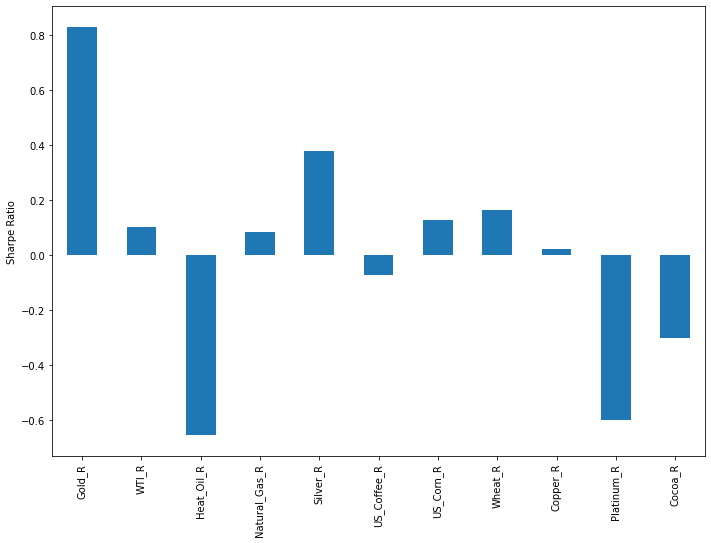

In [205]:
# Calcualte the Sharpe Ratio for commodity portfolio
def commodity_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sharpes = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
commodity_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

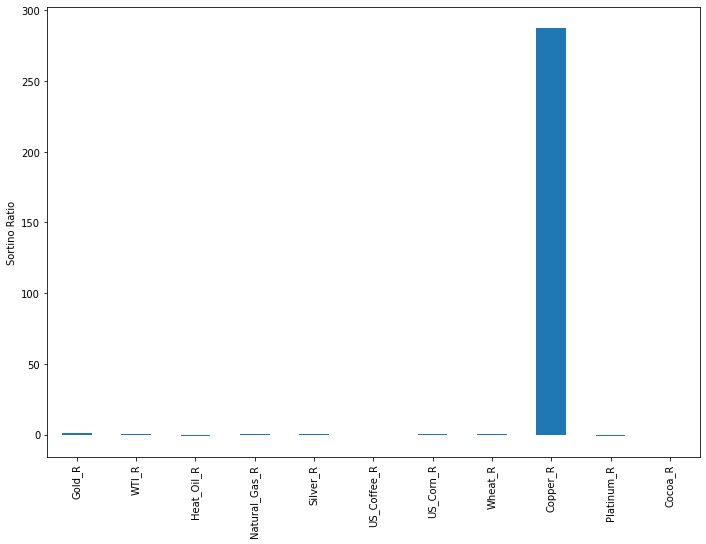

In [207]:
# Calcualte the Sortino Ratio for commodity portfolio
def commodity_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_sortinos = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
commodity_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

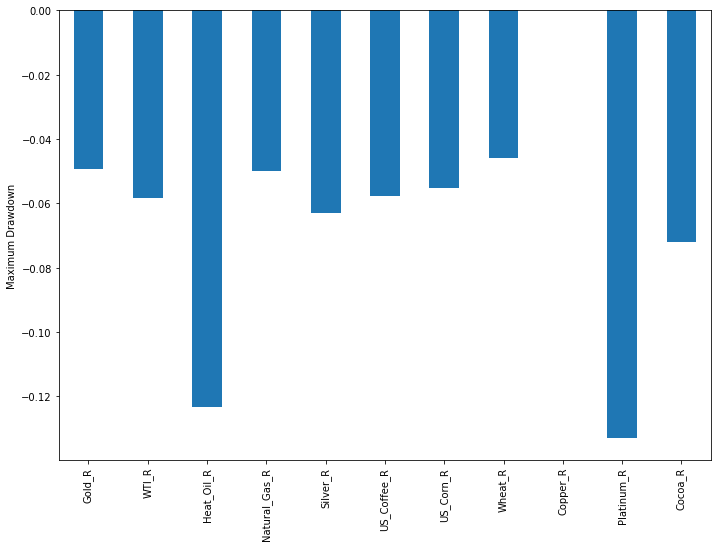

In [208]:
# Calcualte the Maximum Drawdown (MDD) for commodity portfolio
def commodity_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
commodity_max_drawdown = commodity_df_2000_2020_2[['Gold_R','WTI_R','Heat_Oil_R','Natural_Gas_R','Silver_R','US_Coffee_R','US_Corn_R',
               'Wheat_R','Copper_R','Platinum_R','Cocoa_R']].apply(commodity_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
commodity_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till December 2020.
- Target volatility 9 %.
- Maximum Drawdown 7 %.
- Cumulative return of the of portfolio 144.58 %
- Sharpe Ratio 14.46 %.


In [209]:
# Dataset (Currency.csv) from Master Equity Portfolio Excel file
# We have five different currency:Australian dollar (AUD), Euro, Canadian dollar (CAD), Japanese yen (JPY),
# and British pound sterling (GBP.)

# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
currency_df_2000_2020 = pd.read_csv('Currency_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(currency_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
currency_df_2000_2020.head()

(252, 6)


Date   AUD  EURO   CAD     JPY   GBP
0  1/1/2000  1.42  0.89  1.30  108.68  0.76
1  2/1/2000  1.48  0.91  1.33  109.51  0.77
2  3/1/2000  1.45  0.90  1.32  108.08  0.77
3  4/1/2000  1.48  0.92  1.32  108.09  0.81
4  5/1/2000  1.49  0.91  1.33  106.22  0.82

In [210]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   AUD     252 non-null    float64
 2   EURO    252 non-null    float64
 3   CAD     252 non-null    float64
 4   JPY     252 non-null    float64
 5   GBP     252 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB


In [211]:
# Use pandas.to_datetime() function to convert argument to datetime
currency_df_2000_2020['Date'] = pd.to_datetime(currency_df_2000_2020.Date)

In [212]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
currency_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   AUD     252 non-null    float64       
 2   EURO    252 non-null    float64       
 3   CAD     252 non-null    float64       
 4   JPY     252 non-null    float64       
 5   GBP     252 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.9 KB


In [213]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
currency_df_2000_2020.set_index('Date',inplace=True)

In [214]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
currency_df_2000_2020.isnull().any()

AUD     False
EURO    False
CAD     False
JPY     False
GBP     False
dtype: bool

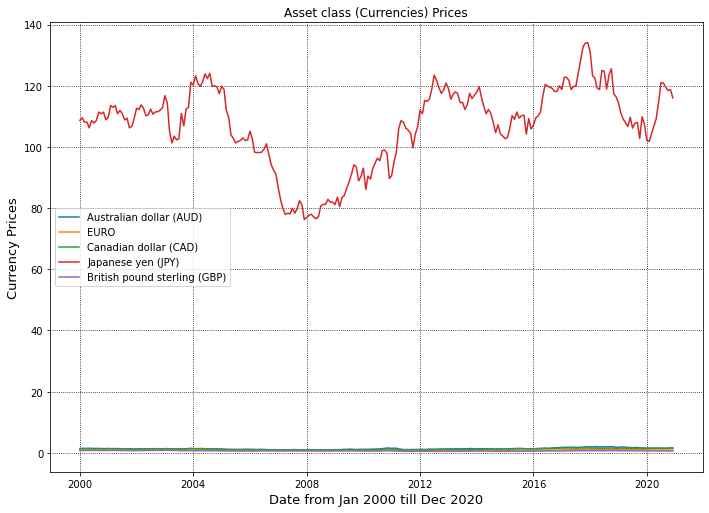

In [215]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.EURO, label='EURO')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

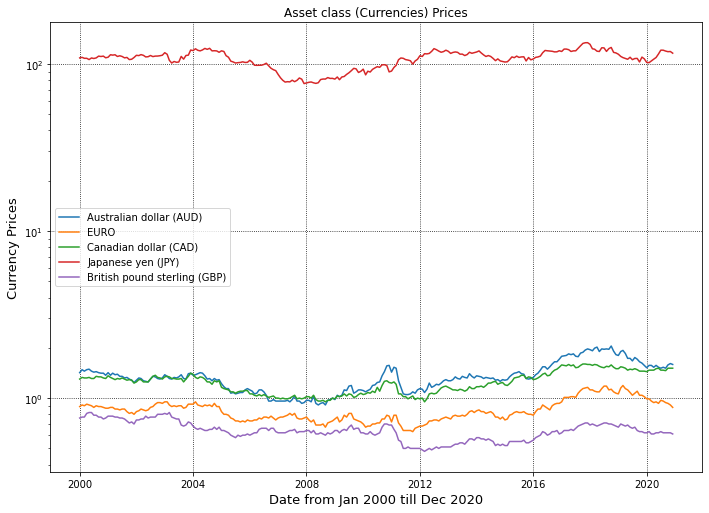

In [217]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.AUD, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.EURO, label='EURO')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.CAD, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.JPY, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020.index, currency_df_2000_2020.GBP, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Prices')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Prices', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=6);

**The Price Rate of Change (ROC)**

- To get the percentage change for each bond price of each country on a monthly basis, I will use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element, and call it on the entire DataFrame.

In [218]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
currency_df_2000_2020 = currency_df_2000_2020[['AUD','EURO','CAD','JPY','GBP']].pct_change()
currency_df_2000_2020.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-01-01       NaN       NaN       NaN       NaN       NaN
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346

In [219]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
currency_df_2000_2020.dropna(axis=0, inplace=True)
currency_df_2000_2020.head(5)

AUD      EURO       CAD       JPY       GBP
Date                                                        
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000

In [220]:
print('There are {} rows in the DataFrame'.format(currency_df_2000_2020.shape[0]))

There are 251 rows in the DataFrame


In [221]:
# Use pandas.DataFrame.copy() function to make a copy of currency_df
currency_df_2000_2020_2 = currency_df_2000_2020.copy()

**Volatility**

- Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. However, volatility is often measured as either the standard deviation or variance between returns from that same security or market index.
- Volatility is a measure of the price fluctuations of an asset or portfolio.

**Annualizing Volatility**

- To Calculate the annualizing volatility, I will multiply the monthly standard deviation by the square root of number of months.

In [222]:
vol_curr_df_2000_2020 = currency_df_2000_2020

In [223]:
vol_curr_df_2000_2020.shape[0]

251

In [224]:
# Calculate the volatility (the price fluctuation of assets od the protfolio)

# Use pandas.DataFrame.rolling() function to provide rolling window calculation
# Use numpy.std() function to compute the standard deviation along the specified axis
# Use Python math sqrt() function to return the square root of any number

vol_curr_df_2000_2020['AUD_Vol'] = vol_curr_df_2000_2020['AUD'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['EURO_Vol'] = vol_curr_df_2000_2020['EURO'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['CAD_Vol'] = vol_curr_df_2000_2020['CAD'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['JPY_Vol'] = vol_curr_df_2000_2020['JPY'].rolling(251).std() * math.sqrt(251)
vol_curr_df_2000_2020['GBP_Vol'] = vol_curr_df_2000_2020['GBP'].rolling(251).std() * math.sqrt(251)

In [225]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
vol_curr_df_2000_2020.dropna(axis=0, inplace=True)

In [226]:
vol_curr_df_2000_2020[['AUD_Vol','EURO_Vol','CAD_Vol','JPY_Vol','GBP_Vol']]

AUD_Vol  EURO_Vol   CAD_Vol   JPY_Vol  GBP_Vol
Date                                                       
2020-12-01  0.552509  0.454174  0.401976  0.434423  0.39769

**Risk Parity Portfolio (RP):**

- Risk parity portfolio is an investment allocation strategy that focuses on the allocation of risk, rather than the allocation of capital.

- A Risky Parity Portfolio, also known as equal risk contribution portfolio (ERC) is inverse volatility weighted portfolio if all pairwise correlations are equal, in other words, which individual assets, in the case of equity and bond, have equal risk contribution to the portfolio risk.

- However, the Risk Parity portfolio was coined by Edward Qian (2015) when he examined the unbalanced risk allocation of traditional 60/40 allocation portfolios of bonds and stocks.

- Risk parity is a portfolio allocation strategy that uses risk to determine allocations across various components of an investment portfolio. The risk parity strategy modifies the modern portfolio theory (MPT) approach to investing through the use of leverage.

- A challenge with RP is that asset classes may carry some degree of risk exposure coming from other asset classes. The key point is that the RP portfolio should hold balanced risk allocation between the economic risk factors such as, growth and inflation risk that are the major drivers of portfolio returns.

In [227]:
# With Risk Parity Strategy, I will target a specific level of risk or return,
# and divide the risk equally across all asset classes
Avg_vol_curr = (0.552509+0.454174+0.401976+0.434423+0.39769) / 5
Avg_vol_curr

0.44815440000000006

In [229]:
# Set the annualized volatility target divide by six asset clases for the portfolio with Risk Parity
curr_target_vol = 0.44815440000000006 / 5
curr_target_vol

0.08963088000000001

In [230]:
# Create a new dataframe called portfolio_df which calculates the allocation to each asset class 
port_curr_df_2000_2020 = currency_df_2000_2020

In [231]:
port_curr_df_2000_2020['AUD_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['AUD_Vol'] 
port_curr_df_2000_2020['EURO_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['EURO_Vol'] 
port_curr_df_2000_2020['CAD_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['CAD_Vol'] 
port_curr_df_2000_2020['JPY_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['JPY_Vol'] 
port_curr_df_2000_2020['GBP_Alloc'] = curr_target_vol / vol_curr_df_2000_2020['GBP_Vol'] 

In [232]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
port_curr_df_2000_2020.dropna(axis=0, inplace=True)

In [233]:
port_curr_df_2000_2020[['AUD_Alloc','EURO_Alloc','CAD_Alloc','JPY_Alloc','GBP_Alloc']]

AUD_Alloc  EURO_Alloc  CAD_Alloc  JPY_Alloc  GBP_Alloc
Date                                                              
2020-12-01   0.162225    0.197349   0.222976   0.206322   0.225379

In [234]:
# I will multiply the monthly bond prices by the allocation percentage,
# in order to get the return for each portion of the portfolio (currencies)

In [235]:
currency_df_2000_2020_2['AUD_R'] = currency_df_2000_2020_2['AUD'] * 0.162225
currency_df_2000_2020_2['EURO_R'] = currency_df_2000_2020_2['EURO'] * 0.197349
currency_df_2000_2020_2['CAD_R'] = currency_df_2000_2020_2['CAD'] * 0.222976
currency_df_2000_2020_2['JPY_R'] = currency_df_2000_2020_2['JPY'] * 0.206322
currency_df_2000_2020_2['GBP_R'] = currency_df_2000_2020_2['GBP'] * 0.225379

In [236]:
currency_df_2000_2020_2.head(5)

AUD      EURO       CAD       JPY       GBP     AUD_R  \
Date                                                                     
2000-02-01  0.042254  0.022472  0.023077  0.007637  0.013158  0.006855   
2000-03-01 -0.020270 -0.010989 -0.007519 -0.013058  0.000000 -0.003288   
2000-04-01  0.020690  0.022222  0.000000  0.000093  0.051948  0.003356   
2000-05-01  0.006757 -0.010870  0.007576 -0.017300  0.012346  0.001096   
2000-06-01 -0.026846 -0.010989 -0.015038  0.022406  0.000000 -0.004355   

              EURO_R     CAD_R     JPY_R     GBP_R  
Date                                                
2000-02-01  0.004435  0.005146  0.001576  0.002966  
2000-03-01 -0.002169 -0.001677 -0.002694  0.000000  
2000-04-01  0.004386  0.000000  0.000019  0.011708  
2000-05-01 -0.002145  0.001689 -0.003569  0.002782  
2000-06-01 -0.002169 -0.003353  0.004623  0.000000

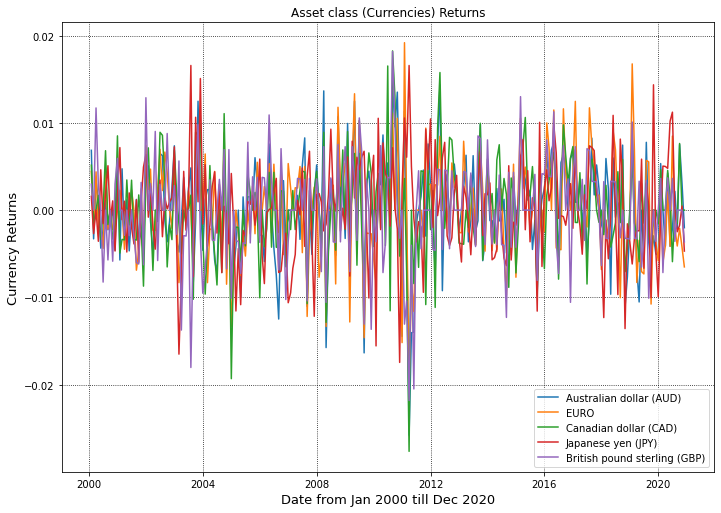

In [237]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.AUD_R, label='Australian dollar (AUD)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.EURO_R, label='EURO')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.CAD_R, label='Canadian dollar (CAD)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.JPY_R, label='Japanese yen (JPY)')
plt.plot(currency_df_2000_2020_2.index, currency_df_2000_2020_2.GBP_R, label='British pound sterling (GBP)')
plt.title('Asset class (Currencies) Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Currency Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

In [238]:
# Adding up all the returns of all asset classes for all currencies (AUD, EURO, CAD, JPY, and GBP)

In [239]:
currency_df_2000_2020_2['Portfolio_R'] = currency_df_2000_2020_2['AUD_R'] + currency_df_2000_2020_2['EURO_R'] + currency_df_2000_2020_2['CAD_R'] + currency_df_2000_2020_2['JPY_R'] + currency_df_2000_2020_2['GBP_R']

In [240]:
# Creating a hypothetical $1,000 portfolio and calculate the cumulative performance of the risk parity portfolio.

In [241]:
# Use pandas.DataFrame.cumprod() function to return cumulative product over a dataframe or series axis
currency_df_2000_2020_2['Currency_Port_Value'] = ((currency_df_2000_2020_2['Portfolio_R'] + 1).cumprod())*1000

In [242]:
currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R','Portfolio_R', 'Currency_Port_Value']].head(5)

AUD_R    EURO_R     CAD_R     JPY_R     GBP_R  Portfolio_R  \
Date                                                                        
2000-02-01  0.006855  0.004435  0.005146  0.001576  0.002966     0.020976   
2000-03-01 -0.003288 -0.002169 -0.001677 -0.002694  0.000000    -0.009828   
2000-04-01  0.003356  0.004386  0.000000  0.000019  0.011708     0.019469   
2000-05-01  0.001096 -0.002145  0.001689 -0.003569  0.002782    -0.000147   
2000-06-01 -0.004355 -0.002169 -0.003353  0.004623  0.000000    -0.005254   

            Currency_Port_Value  
Date                             
2000-02-01          1020.976201  
2000-03-01          1010.942340  
2000-04-01          1030.624378  
2000-05-01          1030.473117  
2000-06-01          1025.059209

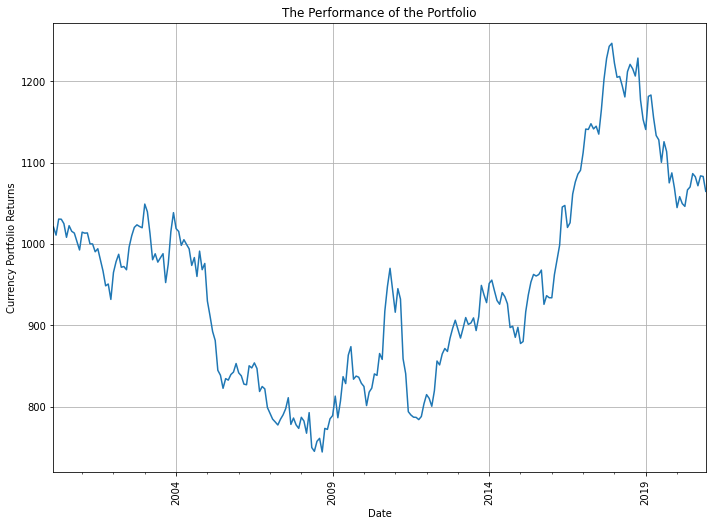

In [243]:
plt.figure(figsize=[ 11.69, 8.27])
plt.title('The Performance of the Portfolio');
plt.xlabel('Date from Jan 2004 till Dec 2007')
plt.ylabel('Currency Portfolio Returns')
currency_df_2000_2020_2['Currency_Port_Value'].plot(grid=True)
plt.xticks(rotation=90);
plt.show();

In [244]:
# Calculate the Maximum Drawdown (MDD) of the Portfolio Value
# (currency_df_2.Portfolio_Value.max() - currency_df_2.Portfolio_Value.min()) / currency_df_2.Portfolio_Value.max()
print("The Maximum Drawdown (MDD) of the Portfolio is {:.2f} %".format((currency_df_2000_2020_2.Currency_Port_Value.max() - currency_df_2000_2020_2.Currency_Port_Value.min()) / currency_df_2000_2020_2.Currency_Port_Value.max()
))

The Maximum Drawdown (MDD) of the Portfolio is 0.40 %


In [245]:
# Calculate the cumulative return of the portfolio
cumulative_return = 100 * (currency_df_2000_2020_2['Currency_Port_Value'][-1] / currency_df_2000_2020_2['Currency_Port_Value'][0] - 1)
print("The Cumulative Return of the Portfolio is {:.2f} %".format(cumulative_return))

The Cumulative Return of the Portfolio is 4.29 %


**The Sharpe Ratio**

- The sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
- The Risk-Free Rate could by a U.S. Treasury Rate (A 10 year US Treasury rate is at 1.64%)

In [246]:
# use the pandas.DataFrame.pct_change() method to getpercentage change between the current and a prior element.
currency_df_2000_2020_2['Monthly_Return'] = currency_df_2000_2020_2['Currency_Port_Value'].pct_change(1)

In [247]:
# Calcualte the Sharpe Ratio
Sharpe_Ratio = currency_df_2000_2020_2['Monthly_Return'].mean() / currency_df_2000_2020_2['Monthly_Return'].std()
Sharpe_Ratio

0.018397102799515917

In [248]:
# Annualize the Sharpe Ratio, since I calculate it from monthly values.
# There are twelve months in the year, so to annualize it, multiply the Sharpe Ratio by the square root of 12
Annualized_Sharpe_Ratio = Sharpe_Ratio * np.sqrt(47)
Annualized_Sharpe_Ratio

0.1261241824415522

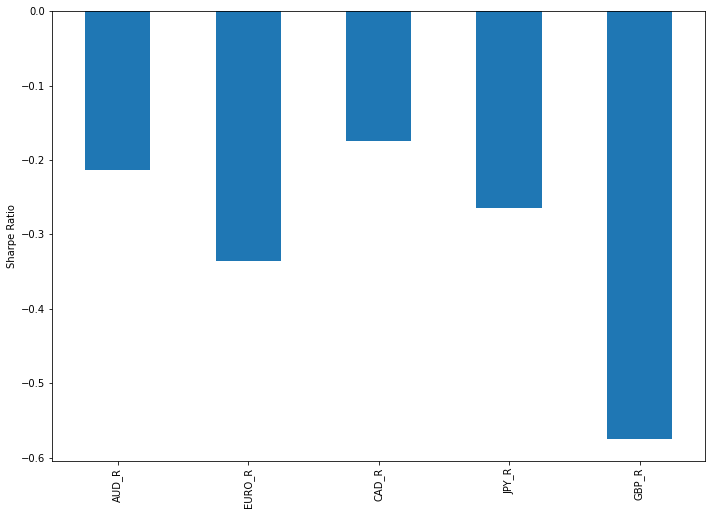

In [249]:
# Calcualte the Sharpe Ratio for currency portfolio
def currency_sharpe_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    sigma = return_series.std() * np.sqrt(n)
    return mean / sigma

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sharpes = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sharpe_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sharpe Ratio')
currency_sharpes.plot.bar(); 

**The Sortino Ratio**

- The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns—downside deviation—instead of the total standard deviation of portfolio returns. 
- The Sortino ratio takes an asset or portfolio's return and subtracts the risk-free rate, and then divides that amount by the asset's downside deviation. The ratio was named after Frank A. Sortino.
- The Sortino ratio = Portfolio Return - Target Return / Downside Risk

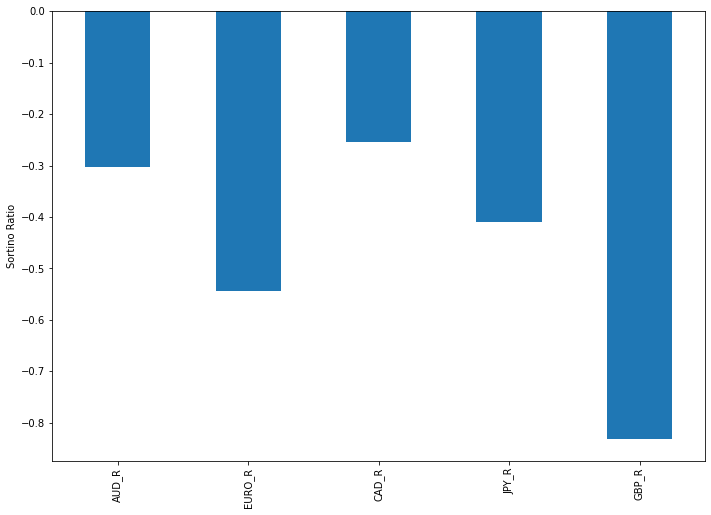

In [250]:
# Calcualte the Sortino Ratio for currency portfolio
def currency_sortino_ratio(return_series, n, rf):
    mean = return_series.mean() * n - rf
    std_neg = return_series[return_series < 0].std() * np.sqrt(n)
    return mean / std_neg

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]
rf = .0164 # Risk Free Rate
n = 47 # 47 months

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_sortinos = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_sortino_ratio, args=(n,rf,), axis=0)
plt.ylabel('Sortino Ratio')
currency_sortinos.plot.bar(); 

**Maximum Drawdown (MDD)**

- A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.
- The formula for Maximum Drawdown is MDD = (Trough Value - Peak Value) /Peak Value.

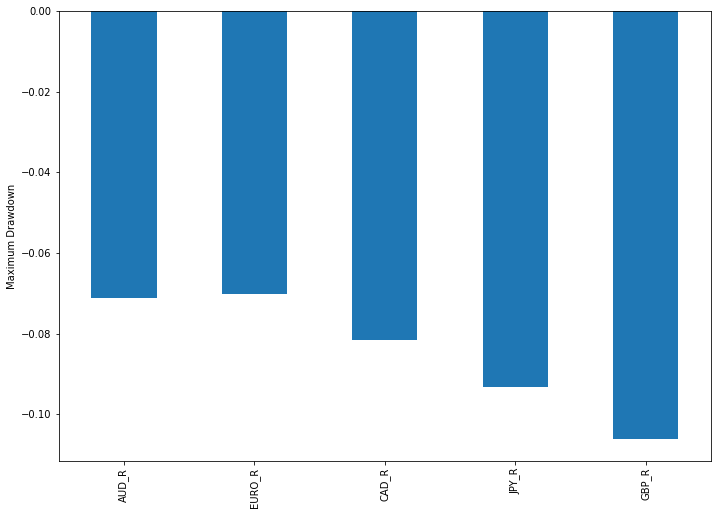

In [251]:
# Calcualte the Maximum Drawdown (MDD) for currency portfolio
def currency_MDD(return_series):
    comp_ret = (return_series + 1).cumprod()
    # Use pandas.DataFrame.expanding() function to provide expanding transformations
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret / peak) - 1
    return dd.min()

return_series = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']]

# Use pandas.DataFrame.apply() function to apply a function along an axis of the DataFrame
currency_max_drawdown = currency_df_2000_2020_2[['AUD_R','EURO_R','CAD_R','JPY_R','GBP_R']].apply(currency_MDD, axis=0)
plt.ylabel('Maximum Drawdown')
currency_max_drawdown.plot.bar();   

**Conclusion**

- Applying the risk parity portfolio strategy from Jan 2000 till Dec 2020.
- Target volatility 8.96 %.
- Maximum Drawdown 40 %.
- Cumulative return of the of portfolio 4.29 %
- Sharpe Ratio 1.83 %.

In [252]:
# Dataset Industry Portfolio contains the monthly weighted average returns of industry portfolio
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
industry_portfolio_df_2000_2020 = pd.read_csv('Industry_Portfolio_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(industry_portfolio_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
industry_portfolio_df_2000_2020.head()

(252, 11)


Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  \
0  1/1/2000  -4.77  -0.87  -7.99   0.90  -4.71  -4.04 -11.23   7.56   5.75   
1  2/1/2000  -6.19  -7.95  -4.24  -5.44  18.18  -3.59  -3.86  -2.88  -7.26   
2  3/1/2000   7.74  10.51   8.36  12.26   3.95   7.57  13.28   0.28   5.77   
3  4/1/2000  -1.82   9.27   0.96  -1.98 -10.69  -7.90  -4.27   5.25   7.60   
4  5/1/2000   7.22 -13.22  -1.41   9.44 -10.84 -10.41  -2.70   3.94   3.90   

   Other  
0  -4.64  
1  -6.98  
2  14.12  
3  -3.41  
4   3.46

In [253]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   NoDur   252 non-null    float64
 2   Durbl   252 non-null    float64
 3   Manuf   252 non-null    float64
 4   Enrgy   252 non-null    float64
 5   HiTec   252 non-null    float64
 6   Telcm   252 non-null    float64
 7   Shops   252 non-null    float64
 8   Hlth    252 non-null    float64
 9   Utils   252 non-null    float64
 10  Other   252 non-null    float64
dtypes: float64(10), object(1)
memory usage: 21.8+ KB


In [254]:
# Use pandas.to_datetime() function to convert argument to datetime
industry_portfolio_df_2000_2020['Date'] = pd.to_datetime(industry_portfolio_df_2000_2020.Date)

In [255]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
industry_portfolio_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   NoDur   252 non-null    float64       
 2   Durbl   252 non-null    float64       
 3   Manuf   252 non-null    float64       
 4   Enrgy   252 non-null    float64       
 5   HiTec   252 non-null    float64       
 6   Telcm   252 non-null    float64       
 7   Shops   252 non-null    float64       
 8   Hlth    252 non-null    float64       
 9   Utils   252 non-null    float64       
 10  Other   252 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 21.8 KB


In [256]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
industry_portfolio_df_2000_2020.set_index('Date',inplace=True)

In [257]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
industry_portfolio_df_2000_2020.isnull().any()

NoDur    False
Durbl    False
Manuf    False
Enrgy    False
HiTec    False
Telcm    False
Shops    False
Hlth     False
Utils    False
Other    False
dtype: bool

In [258]:
industry_portfolio_df_2000_2020[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']].head(5)

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth   Utils  \
Date                                                                        
2000-01-01  -4.77  -0.87  -7.99   0.90  -4.71  -4.04 -11.23   7.56   5.75   
2000-02-01  -6.19  -7.95  -4.24  -5.44  18.18  -3.59  -3.86  -2.88  -7.26   
2000-03-01   7.74  10.51   8.36  12.26   3.95   7.57  13.28   0.28   5.77   
2000-04-01  -1.82   9.27   0.96  -1.98 -10.69  -7.90  -4.27   5.25   7.60   
2000-05-01   7.22 -13.22  -1.41   9.44 -10.84 -10.41  -2.70   3.94   3.90   

            Other  
Date               
2000-01-01  -4.64  
2000-02-01  -6.98  
2000-03-01  14.12  
2000-04-01  -3.41  
2000-05-01   3.46

In [259]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
industry_portfolio_df_2000_2020 = industry_portfolio_df_2000_2020.rename(columns={'Hlth ':'Hlth'})

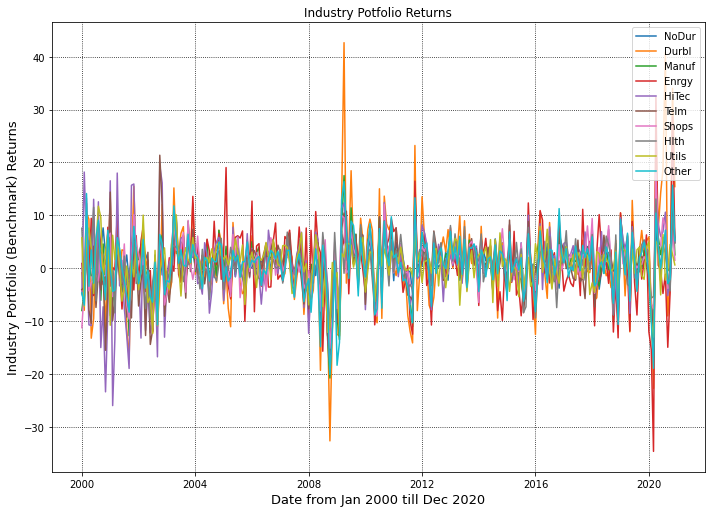

In [260]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.NoDur, label='NoDur')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Durbl, label='Durbl')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Manuf, label='Manuf')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Enrgy, label='Enrgy')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.HiTec, label='HiTec')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Telcm, label='Telm')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Shops, label='Shops')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Hlth, label='Hlth')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Utils, label='Utils')
plt.plot(industry_portfolio_df_2000_2020.index, industry_portfolio_df_2000_2020.Other, label='Other')
plt.title('Industry Potfolio Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Industry Portfolio (Benchmark) Returns', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=1);

<h4><center>Investment on a Mixture of Different Asset Classes Portfolio</center></h4>

In [261]:
# Use pandas.concat() function to concatenate pandas objects along a particular axis with optional set logic along
# the other axes.
# I Concatenate Portfolio value of different asset classes (Bonds, Equities, Emerge Market Equities, Commodities, 
# Foreign Currencies)
# I create a hypothetical $1,000 portfolio for each

mix_port_2000_2020 = pd.concat([bond_df_2000_2020_2['Bond_Port_Value'],
                               equity_df_2000_2020_2['Equity_Port_Value'],
                               emerg_market_df_2000_2020_2['Emerg_Market_Port_Value'],
                               commodity_df_2000_2020_2['Commodity_Port_Value'],
                               currency_df_2000_2020_2['Currency_Port_Value']],axis=1).reindex(bond_df_2000_2020_2.index)
mix_port_2000_2020

Bond_Port_Value  Equity_Port_Value  Emerg_Market_Port_Value  \
Date                                                                      
2000-02-01      1026.522530        1052.813355               991.047885   
2000-03-01      1050.338123        1068.685373              1008.869197   
2000-04-01      1037.064222        1040.030776               971.050180   
2000-05-01      1043.937533        1014.942760               912.970632   
2000-06-01      1045.487827        1048.491537               925.100889   
...                     ...                ...                      ...   
2020-08-01      1184.423024        1511.608919              5105.160858   
2020-09-01      1170.007890        1483.700837              4945.007426   
2020-10-01      1165.022703        1426.217028              4858.993726   
2020-11-01      1167.332009        1601.848455              5451.791584   
2020-12-01      1165.489231        1629.808239              5673.516155   

            Commodity_Port_Value  Currency_Port_Value  
Date                                                   
2000-02-01            989.551087          1020.976201  
2000-03-01            991.551539          1010.942340  
2000-04-01            970.794486          1030.624378  
2000-05-01            995.281505          1030.473117  
2000-06-01            997.647248          1025.059209  
...                          ...                  ...  
2020-08-01           2276.526089          1082.654380  
2020-09-01           2267.912736          1071.585562  
2020-10-01           2309.457935          1083.726107  
2020-11-01           2318.597931          1082.974582  
2020-12-01           2420.262454          1064.727045  

[251 rows x 5 columns]

In [262]:
mix_port_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2000-02-01 to 2020-12-01
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bond_Port_Value          251 non-null    float64
 1   Equity_Port_Value        251 non-null    float64
 2   Emerg_Market_Port_Value  251 non-null    float64
 3   Commodity_Port_Value     251 non-null    float64
 4   Currency_Port_Value      251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


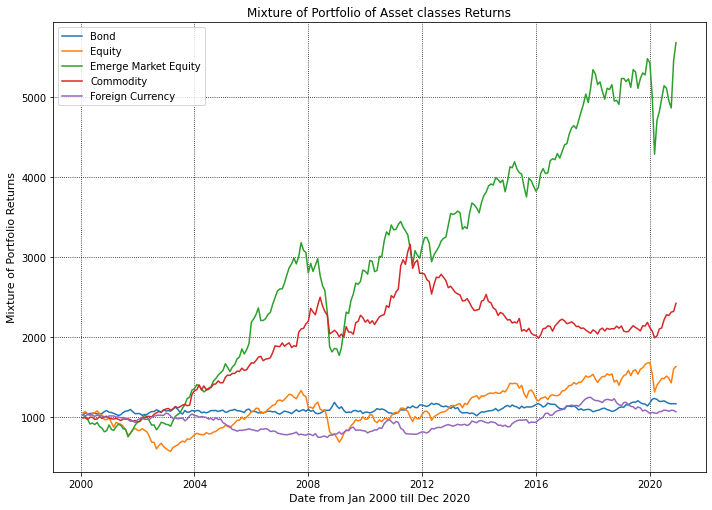

In [263]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Bond_Port_Value, label='Bond')
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Equity_Port_Value, label='Equity')
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Emerg_Market_Port_Value, label='Emerge Market Equity')
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Commodity_Port_Value, label='Commodity')                               
plt.plot(mix_port_2000_2020.index, mix_port_2000_2020.Currency_Port_Value, label='Foreign Currency')
                               
plt.title('Mixture of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With Risk Parity Strategy on the Asset Classes and Portfolio (RP):**

In [264]:
1/5

0.2

In [265]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Risk_Parity_Strategy_2000_2020 = mix_port_2000_2020.copy()

In [266]:
Risk_Parity_Strategy_2000_2020['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2000_2020['Bond_Port_Value'] * .20
Risk_Parity_Strategy_2000_2020['Equity_Port_Value_20%'] = Risk_Parity_Strategy_2000_2020['Equity_Port_Value'] * .20
Risk_Parity_Strategy_2000_2020['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2000_2020['Emerg_Market_Port_Value'] * .20
Risk_Parity_Strategy_2000_2020['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2000_2020['Commodity_Port_Value'] * .20
Risk_Parity_Strategy_2000_2020['Bond_Port_Value_20%'] = Risk_Parity_Strategy_2000_2020['Currency_Port_Value'] * .20

In [268]:
Risk_Parity_Strategy_2000_2020.head()

Bond_Port_Value  Equity_Port_Value  Emerg_Market_Port_Value  \
Date                                                                      
2000-02-01      1026.522530        1052.813355               991.047885   
2000-03-01      1050.338123        1068.685373              1008.869197   
2000-04-01      1037.064222        1040.030776               971.050180   
2000-05-01      1043.937533        1014.942760               912.970632   
2000-06-01      1045.487827        1048.491537               925.100889   

            Commodity_Port_Value  Currency_Port_Value  Bond_Port_Value_20%  \
Date                                                                         
2000-02-01            989.551087          1020.976201           204.195240   
2000-03-01            991.551539          1010.942340           202.188468   
2000-04-01            970.794486          1030.624378           206.124876   
2000-05-01            995.281505          1030.473117           206.094623   
2000-06-01            997.647248          1025.059209           205.011842   

            Equity_Port_Value_20%  
Date                               
2000-02-01             210.562671  
2000-03-01             213.737075  
2000-04-01             208.006155  
2000-05-01             202.988552  
2000-06-01             209.698307

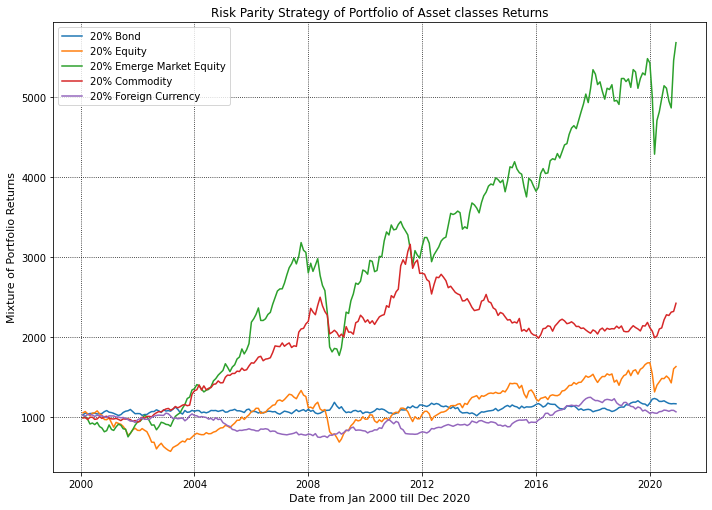

In [269]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Bond_Port_Value, label='20% Bond')
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Equity_Port_Value, label='20% Equity')
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Emerg_Market_Port_Value, label='20% Emerge Market Equity')
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Commodity_Port_Value, label='20% Commodity')                               
plt.plot(Risk_Parity_Strategy_2000_2020.index, Risk_Parity_Strategy_2000_2020.Currency_Port_Value, label='20% Foreign Currency')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With 60/40 Portfolio:**

- The 60/40 Portfolio composed of 60% Equities, and 40% Bonds

In [271]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
RP_60_40_Portfolio_2000_2020 = mix_port_2000_2020[['Bond_Port_Value','Equity_Port_Value']].copy()

In [272]:
RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'] = RP_60_40_Portfolio_2000_2020['Bond_Port_Value'] * .40
RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'] = RP_60_40_Portfolio_2000_2020['Equity_Port_Value'] * .60

In [273]:
RP_60_40_Portfolio_2000_2020.head(5)

Bond_Port_Value  Equity_Port_Value  Bond_Port_Value_40%  \
Date                                                                  
2000-02-01      1026.522530        1052.813355           410.609012   
2000-03-01      1050.338123        1068.685373           420.135249   
2000-04-01      1037.064222        1040.030776           414.825689   
2000-05-01      1043.937533        1014.942760           417.575013   
2000-06-01      1045.487827        1048.491537           418.195131   

            Equity_Port_Value_60%  
Date                               
2000-02-01             631.688013  
2000-03-01             641.211224  
2000-04-01             624.018466  
2000-05-01             608.965656  
2000-06-01             629.094922

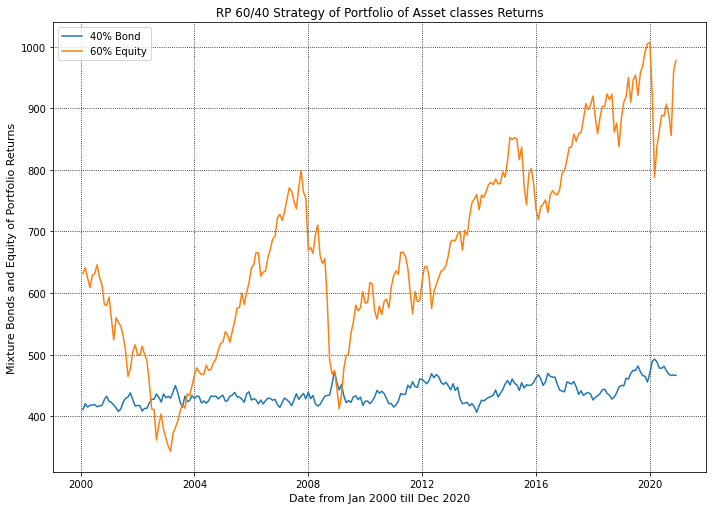

In [274]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(RP_60_40_Portfolio_2000_2020.index, RP_60_40_Portfolio_2000_2020['Bond_Port_Value_40%'], label='40% Bond')
plt.plot(RP_60_40_Portfolio_2000_2020.index, RP_60_40_Portfolio_2000_2020['Equity_Port_Value_60%'], label='60% Equity')
                               
plt.title('RP 60/40 Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture Bonds and Equity of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

**With Ten months Moving Average on the Asset Classes and Portfolio:**

In [275]:
# Use pandas.DataFrame.copy() function to make a copy of mix_port_2004_2007 dataframe
Moving_Average_Portfolio_2000_2020 = mix_port_2000_2020.copy()

In [276]:
# Calculating Moving Average with 10 numbers of observations on Mixture Portfolio 
# Use pandas.DataFrame.rolling(window=10) function to provide rolling window 10 of calculations
# Use Python mean() method to calculate the arithmetic mean (average) of data

Moving_Average_Portfolio_2000_2020['Bond_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Bond_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Equity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Equity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Emerg_Market_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Emerg_Market_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Commodity_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Commodity_Port_Value'].rolling(window=10).mean()
Moving_Average_Portfolio_2000_2020['Currency_Port_Value_Avg'] = Moving_Average_Portfolio_2000_2020['Currency_Port_Value'].rolling(window=10).mean()


In [278]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows
Moving_Average_Portfolio_2000_2020.dropna(axis=0, inplace=True)
Moving_Average_Portfolio_2000_2020.head(5)

Bond_Port_Value  Equity_Port_Value  Emerg_Market_Port_Value  \
Date                                                                      
2000-11-01      1066.894176         969.023664               815.869616   
2000-12-01      1080.887585         965.950963               829.835299   
2001-01-01      1060.175398         989.262029               900.998494   
2001-02-01      1055.179084         926.774506               844.788712   
2001-03-01      1045.963507         872.932291               832.599891   
...                     ...                ...                      ...   
2020-08-01      1184.423024        1511.608919              5105.160858   
2020-09-01      1170.007890        1483.700837              4945.007426   
2020-10-01      1165.022703        1426.217028              4858.993726   
2020-11-01      1167.332009        1601.848455              5451.791584   
2020-12-01      1165.489231        1629.808239              5673.516155   

            Commodity_Port_Value  Currency_Port_Value  Bond_Port_Value_Avg  \
Date                                                                         
2000-11-01           1003.227584          1002.949812          1044.026625   
2000-12-01           1009.476879           992.704179          1049.463131   
2001-01-01            985.948896          1014.554829          1050.446858   
2001-02-01            977.078302          1013.339518          1052.258344   
2001-03-01            975.361104          1013.636501          1052.460942   
...                          ...                  ...                  ...   
2020-08-01           2276.526089          1082.654380          1192.650459   
2020-09-01           2267.912736          1071.585562          1193.520553   
2020-10-01           2309.457935          1083.726107          1196.173591   
2020-11-01           2318.597931          1082.974582          1195.405480   
2020-12-01           2420.262454          1064.727045          1189.632495   

            Equity_Port_Value_Avg  Emerg_Market_Port_Value_Avg  \
Date                                                             
2000-11-01            1038.779828                   920.611527   
2000-12-01            1030.093589                   904.490269   
2001-01-01            1022.151254                   893.703198   
2001-02-01            1010.825627                   881.077051   
2001-03-01             996.624580                   873.039977   
...                           ...                          ...   
2020-08-01            1516.639349                  5016.908870   
2020-09-01            1499.540841                  4984.366346   
2020-10-01            1474.628616                  4922.793179   
2020-11-01            1467.023130                  4925.993011   
2020-12-01            1476.453597                  4994.007996   

            Commodity_Port_Value_Avg  Currency_Port_Value_Avg  
Date                                                           
2000-11-01                988.228471              1018.084082  
2000-12-01                990.221050              1015.256880  
2001-01-01                989.660786              1015.618128  
2001-02-01                990.289168              1013.889642  
2001-03-01                988.297128              1012.205981  
...                              ...                      ...  
2020-08-01               2120.766472              1066.078157  
2020-09-01               2133.927234              1064.497253  
2020-10-01               2146.750239              1065.997210  
2020-11-01               2167.112389              1069.820976  
2020-12-01               2201.913725              1070.473346  

[242 rows x 10 columns]

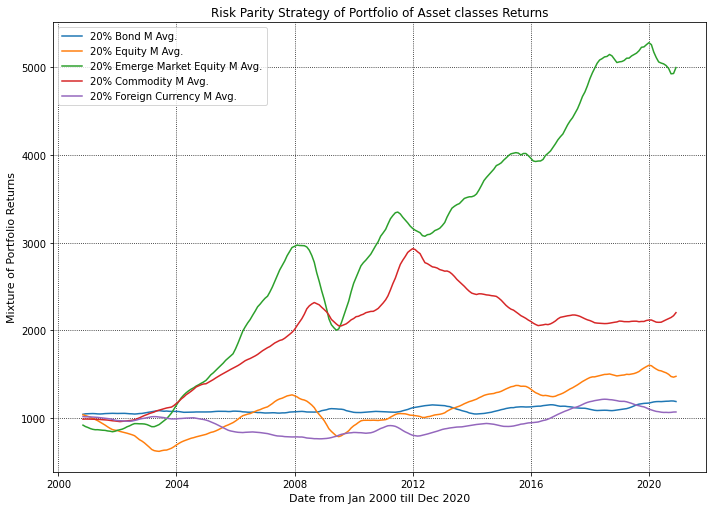

In [279]:
rcParams['figure.figsize'] = 11.69,8.27

plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Bond_Port_Value_Avg, label='20% Bond M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Equity_Port_Value_Avg, label='20% Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Emerg_Market_Port_Value_Avg, label='20% Emerge Market Equity M Avg.')
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Commodity_Port_Value_Avg, label='20% Commodity M Avg.')                               
plt.plot(Moving_Average_Portfolio_2000_2020.index, Moving_Average_Portfolio_2000_2020.Currency_Port_Value_Avg, label='20% Foreign Currency M Avg.')
                               
plt.title('Risk Parity Strategy of Portfolio of Asset classes Returns')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=11)
plt.ylabel('Mixture of Portfolio Returns', fontsize=11)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=2);

<h4><center>Other RP techniques of Portfolio</center></h4>

**The Relative Strength Index (RSI)**

- The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. 

In [283]:
# Dataset (Emerging_Market.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
emerg_market_df_2000_2020 = pd.read_csv('Emerging_market_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(emerg_market_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
emerg_market_df_2000_2020.head()

(252, 12)


Date  Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
0  1/1/2000    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
1  2/1/2000    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2  3/1/2000    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   
3  4/1/2000    390.40  1075.01  15537.60     509.51  242.85  192.06  12235.62   
4  5/1/2000    323.29  1124.19  14956.61     464.30  217.05  162.06  11864.13   

   Finland  South Africa  Indonesia  Venezuela  
0  3234.78       7771.66     636.37   90224.09  
1  3239.69       7287.01     576.54   69894.88  
2  3189.06       7388.34     583.28   47772.07  
3  3170.85       6913.24     526.74   48856.03  
4  2901.45       6921.37     454.33   55583.02

In [284]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          252 non-null    object 
 1   Thailand      252 non-null    float64
 2   Chile         252 non-null    float64
 3   Brazil        252 non-null    float64
 4   Argentina     252 non-null    float64
 5   Russia        252 non-null    float64
 6   Turkey        252 non-null    float64
 7   Portugal      252 non-null    float64
 8   Finland       252 non-null    float64
 9   South Africa  252 non-null    float64
 10  Indonesia     252 non-null    float64
 11  Venezuela     252 non-null    float64
dtypes: float64(11), object(1)
memory usage: 23.8+ KB


In [285]:
# Use pandas.to_datetime() function to convert argument to datetime
emerg_market_df_2000_2020['Date'] = pd.to_datetime(emerg_market_df_2000_2020.Date)

In [286]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame.
emerg_market_df_2000_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          252 non-null    datetime64[ns]
 1   Thailand      252 non-null    float64       
 2   Chile         252 non-null    float64       
 3   Brazil        252 non-null    float64       
 4   Argentina     252 non-null    float64       
 5   Russia        252 non-null    float64       
 6   Turkey        252 non-null    float64       
 7   Portugal      252 non-null    float64       
 8   Finland       252 non-null    float64       
 9   South Africa  252 non-null    float64       
 10  Indonesia     252 non-null    float64       
 11  Venezuela     252 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 23.8 KB


In [287]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
emerg_market_df_2000_2020.set_index('Date',inplace=True)

In [288]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2000_2020.isnull().any()

Thailand        False
Chile           False
Brazil          False
Argentina       False
Russia          False
Turkey          False
Portugal        False
Finland         False
South Africa    False
Indonesia       False
Venezuela       False
dtype: bool

In [289]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
emerg_market_df_2000_2020 = emerg_market_df_2000_2020.rename(columns={'South Africa':'South_Africa'})

In [290]:
emerg_market_df_2000_2020[['Thailand','Chile','Brazil','Argentina','Russia','Turkey','Portugal','Finland',
                           'South_Africa','Indonesia','Venezuela']].head(3)

Thailand    Chile    Brazil  Argentina  Russia  Turkey  Portugal  \
Date                                                                           
2000-01-01    477.57  1151.42  16388.27     566.28  188.81  167.15  12385.55   
2000-02-01    374.32  1106.18  17660.20     631.64  191.49  159.46  14644.27   
2000-03-01    400.32  1128.58  17820.37     569.24  254.68  159.20  13127.09   

            Finland  South_Africa  Indonesia  Venezuela  
Date                                                     
2000-01-01  3234.78       7771.66     636.37   90224.09  
2000-02-01  3239.69       7287.01     576.54   69894.88  
2000-03-01  3189.06       7388.34     583.28   47772.07

In [291]:
# Get the difference in price from the previous month
# Use pandas.DataFrame.diff() function Calculates the difference of a Dataframe element compared with another element
# in the Dataframe (default is element in previous row, axis= 1 for column or 0 for row).
emerg_market_df_2000_2020['delta_Thailand'] = emerg_market_df_2000_2020['Thailand'].diff(1)
emerg_market_df_2000_2020['delta_Chile'] = emerg_market_df_2000_2020['Chile'].diff(1)
emerg_market_df_2000_2020['delta_Brazil'] = emerg_market_df_2000_2020['Brazil'].diff(1)
emerg_market_df_2000_2020['delta_Argentina'] = emerg_market_df_2000_2020['Argentina'].diff(1)
emerg_market_df_2000_2020['delta_Russia'] = emerg_market_df_2000_2020['Russia'].diff(1)
emerg_market_df_2000_2020['delta_Turkey'] = emerg_market_df_2000_2020['Turkey'].diff(1)
emerg_market_df_2000_2020['delta_Portugal'] = emerg_market_df_2000_2020['Portugal'].diff(1)
emerg_market_df_2000_2020['delta_Finland'] = emerg_market_df_2000_2020['Finland'].diff(1)
emerg_market_df_2000_2020['delta_South_Africa'] = emerg_market_df_2000_2020['South_Africa'].diff(1)
emerg_market_df_2000_2020['delta_Indonesia'] = emerg_market_df_2000_2020['Indonesia'].diff(1)
emerg_market_df_2000_2020['delta_Venezuela'] = emerg_market_df_2000_2020['Venezuela'].diff(1)

In [292]:
emerg_market_df_2000_2020[['delta_Thailand','delta_Chile','delta_Brazil','delta_Argentina','delta_Russia',
                           'delta_Turkey','delta_Portugal','delta_Finland','delta_South_Africa',
                           'delta_Indonesia','delta_Venezuela']].head(5)

delta_Thailand  delta_Chile  delta_Brazil  delta_Argentina  \
Date                                                                     
2000-01-01             NaN          NaN           NaN              NaN   
2000-02-01         -103.25       -45.24       1271.93            65.36   
2000-03-01           26.00        22.40        160.17           -62.40   
2000-04-01           -9.92       -53.57      -2282.77           -59.73   
2000-05-01          -67.11        49.18       -580.99           -45.21   

            delta_Russia  delta_Turkey  delta_Portugal  delta_Finland  \
Date                                                                    
2000-01-01           NaN           NaN             NaN            NaN   
2000-02-01          2.68         -7.69         2258.72           4.91   
2000-03-01         63.19         -0.26        -1517.18         -50.63   
2000-04-01        -11.83         32.86         -891.47         -18.21   
2000-05-01        -25.80        -30.00         -371.49        -269.40   

            delta_South_Africa  delta_Indonesia  delta_Venezuela  
Date                                                              
2000-01-01                 NaN              NaN              NaN  
2000-02-01             -484.65           -59.83        -20329.21  
2000-03-01              101.33             6.74        -22122.81  
2000-04-01             -475.10           -56.54          1083.96  
2000-05-01                8.13           -72.41          6726.99

In [293]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
emerg_market_df_2000_2020.dropna(axis=0, inplace=True)
emerg_market_df_2000_2020.head(5)

Thailand    Chile     Brazil  Argentina   Russia   Turkey  \
Date                                                                    
2000-02-01    374.32  1106.18   17660.20     631.64   191.49   159.46   
2000-03-01    400.32  1128.58   17820.37     569.24   254.68   159.20   
2000-04-01    390.40  1075.01   15537.60     509.51   242.85   192.06   
2000-05-01    323.29  1124.19   14956.61     464.30   217.05   162.06   
2000-06-01    325.69  1108.66   16727.95     496.90   194.93   144.66   
...              ...      ...        ...        ...      ...      ...   
2020-08-01   1310.66  3767.15   99369.20   46835.42  2966.20  1078.61   
2020-09-01   1237.04  3637.30   94603.40   41260.86  2905.81  1145.24   
2020-10-01   1194.95  3539.92   93952.40   45290.02  2690.59  1112.37   
2020-11-01   1408.31  4032.87  108893.30   54572.54  3107.58  1283.58   
2020-12-01   1449.35  4177.22  119017.20   51226.49  3289.02  1476.72   

            Portugal  Finland  South_Africa  Indonesia  ...  delta_Chile  \
Date                                                    ...                
2000-02-01  14644.27  3239.69       7287.01     576.54  ...       -45.24   
2000-03-01  13127.09  3189.06       7388.34     583.28  ...        22.40   
2000-04-01  12235.62  3170.85       6913.24     526.74  ...       -53.57   
2000-05-01  11864.13  2901.45       6921.37     454.33  ...        49.18   
2000-06-01  11923.37  2764.66       7304.22     515.11  ...       -15.53   
...              ...      ...           ...        ...  ...          ...   
2020-08-01   4301.08  4308.80      51225.46    5238.49  ...      -249.93   
2020-09-01   4067.02  4280.97      50042.44    4870.04  ...      -129.85   
2020-10-01   3945.12  4057.00      47472.92    5128.23  ...       -97.38   
2020-11-01   4604.72  4564.66      52375.50    5612.42  ...       492.95   
2020-12-01   4898.36  4586.15      54379.58    5979.07  ...       144.35   

            delta_Brazil  delta_Argentina  delta_Russia  delta_Turkey  \
Date                                                                    
2000-02-01       1271.93            65.36          2.68         -7.69   
2000-03-01        160.17           -62.40         63.19         -0.26   
2000-04-01      -2282.77           -59.73        -11.83         32.86   
2000-05-01       -580.99           -45.21        -25.80        -30.00   
2000-06-01       1771.34            32.60        -22.12        -17.40   
...                  ...              ...           ...           ...   
2020-08-01      -3543.00         -2418.20         54.63        -48.29   
2020-09-01      -4765.80         -5574.56        -60.39         66.63   
2020-10-01       -651.00          4029.16       -215.22        -32.87   
2020-11-01      14940.90          9282.52        416.99        171.21   
2020-12-01      10123.90         -3346.05        181.44        193.14   

            delta_Portugal  delta_Finland  delta_South_Africa  \
Date                                                            
2000-02-01         2258.72           4.91             -484.65   
2000-03-01        -1517.18         -50.63              101.33   
2000-04-01         -891.47         -18.21             -475.10   
2000-05-01         -371.49        -269.40                8.13   
2000-06-01           59.24        -136.79              382.85   
...                    ...            ...                 ...   
2020-08-01            5.26         229.84             -143.36   
2020-09-01         -234.06         -27.83            -1183.02   
2020-10-01         -121.90        -223.97            -2569.52   
2020-11-01          659.60         507.66             4902.58   
2020-12-01          293.64          21.49             2004.08   

            delta_Indonesia  delta_Venezuela  
Date                                          
2000-02-01           -59.83        -20329.21  
2000-03-01             6.74        -22122.81  
2000-04-01           -56.54          1083.96  
2000-05-01           -72.41          6726.

In [294]:
# Get the positive gains (up) and the negative gains (down)
emerg_market_df_2000_2020['Thailand_up'] = emerg_market_df_2000_2020['delta_Thailand'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Thailand_down'] = emerg_market_df_2000_2020['delta_Thailand'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Chile_up'] = emerg_market_df_2000_2020['delta_Chile'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Chile_down'] = emerg_market_df_2000_2020['delta_Chile'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Brazil_up'] = emerg_market_df_2000_2020['delta_Brazil'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Brazil_down'] = emerg_market_df_2000_2020['delta_Brazil'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Argentina_up'] = emerg_market_df_2000_2020['delta_Argentina'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Argentina_down'] = emerg_market_df_2000_2020['delta_Argentina'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Russia_up'] = emerg_market_df_2000_2020['delta_Russia'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Russia_down'] = emerg_market_df_2000_2020['delta_Russia'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Turkey_up'] = emerg_market_df_2000_2020['delta_Turkey'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Turkey_down'] = emerg_market_df_2000_2020['delta_Turkey'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Portugal_up'] = emerg_market_df_2000_2020['delta_Portugal'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Portugal_down'] = emerg_market_df_2000_2020['delta_Portugal'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Finland_up'] = emerg_market_df_2000_2020['delta_Finland'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Finland_down'] = emerg_market_df_2000_2020['delta_Finland'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['South_Africa_up'] = emerg_market_df_2000_2020['delta_South_Africa'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['South_Africa_down'] = emerg_market_df_2000_2020['delta_South_Africa'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Indonesia_up'] = emerg_market_df_2000_2020['delta_Indonesia'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Indonesia_down'] = emerg_market_df_2000_2020['delta_Indonesia'].apply(lambda x:abs(x) if x < 0 else 0)

emerg_market_df_2000_2020['Venezuela_up'] = emerg_market_df_2000_2020['delta_Venezuela'].apply(lambda x:x if x > 0 else 0)
emerg_market_df_2000_2020['Venezuela_down'] = emerg_market_df_2000_2020['delta_Venezuela'].apply(lambda x:abs(x) if x < 0 else 0)

In [295]:
emerg_market_df_2000_2020[['Thailand_up','Thailand_down','Chile_up','Chile_down','Brazil_up','Brazil_down',
                           'Argentina_up','Argentina_down','Russia_up','Russia_down','Turkey_up','Turkey_down',
                           'Portugal_up','Portugal_down','Finland_up','Finland_down','South_Africa_up','South_Africa_down',
                           'Indonesia_up','Indonesia_down','Venezuela_up','Venezuela_down']].head(5)

Thailand_up  Thailand_down  Chile_up  Chile_down  Brazil_up  \
Date                                                                      
2000-02-01          0.0         103.25      0.00       45.24    1271.93   
2000-03-01         26.0           0.00     22.40        0.00     160.17   
2000-04-01          0.0           9.92      0.00       53.57       0.00   
2000-05-01          0.0          67.11     49.18        0.00       0.00   
2000-06-01          2.4           0.00      0.00       15.53    1771.34   

            Brazil_down  Argentina_up  Argentina_down  Russia_up  Russia_down  \
Date                                                                            
2000-02-01         0.00         65.36            0.00       2.68         0.00   
2000-03-01         0.00          0.00           62.40      63.19         0.00   
2000-04-01      2282.77          0.00           59.73       0.00        11.83   
2000-05-01       580.99          0.00           45.21       0.00        25.80   
2000-06-01         0.00         32.60            0.00       0.00        22.12   

            ...  Portugal_up  Portugal_down  Finland_up  Finland_down  \
Date        ...                                                         
2000-02-01  ...      2258.72           0.00        4.91          0.00   
2000-03-01  ...         0.00        1517.18        0.00         50.63   
2000-04-01  ...         0.00         891.47        0.00         18.21   
2000-05-01  ...         0.00         371.49        0.00        269.40   
2000-06-01  ...        59.24           0.00        0.00        136.79   

            South_Africa_up  South_Africa_down  Indonesia_up  Indonesia_down  \
Date                                                                           
2000-02-01             0.00             484.65          0.00           59.83   
2000-03-01           101.33               0.00          6.74            0.00   
2000-04-01             0.00             475.10          0.00           56.54   
2000-05-01             8.13               0.00          0.00           72.41   
2000-06-01           382.85               0.00         60.78            0.00   

            Venezuela_up  Venezuela_down  
Date                                      
2000-02-01          0.00        20329.21  
2000-03-01          0.00        22122.81  
2000-04-01       1083.96            0.00  
2000-05-01       6726.99            0.00  
2000-06-01          0.00        29794.33  

[5 rows x 22 columns]

In [296]:
# get the time period
emerg_market_df_2000_2020.shape[0]

251

In [297]:
# Calculate the average gain and the average loss
# Use pandas.DataFrame.ewm() function to provide exponential weighted (EW) functions, such as mean(),var(),std(), corr(), cov()
emerg_market_df_2000_2020['avg_up_Thailand'] = emerg_market_df_2000_2020['Thailand_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Thailand'] = emerg_market_df_2000_2020['Thailand_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Chile'] = emerg_market_df_2000_2020['Chile_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Chile'] = emerg_market_df_2000_2020['Chile_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Brazil'] = emerg_market_df_2000_2020['Brazil_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Brazil'] = emerg_market_df_2000_2020['Brazil_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Argentina'] = emerg_market_df_2000_2020['Argentina_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Argentina'] = emerg_market_df_2000_2020['Argentina_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Russia'] = emerg_market_df_2000_2020['Russia_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Russia'] = emerg_market_df_2000_2020['Russia_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Turkey'] = emerg_market_df_2000_2020['Turkey_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Turkey'] = emerg_market_df_2000_2020['Turkey_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Portugal'] = emerg_market_df_2000_2020['Portugal_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Portugal'] = emerg_market_df_2000_2020['Portugal_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Finland'] = emerg_market_df_2000_2020['Finland_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Finland'] = emerg_market_df_2000_2020['Finland_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_South_Africa'] = emerg_market_df_2000_2020['South_Africa_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_South_Africa'] = emerg_market_df_2000_2020['South_Africa_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Indonesia'] = emerg_market_df_2000_2020['Indonesia_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Indonesia'] = emerg_market_df_2000_2020['Indonesia_down'].ewm(span=251).mean()

emerg_market_df_2000_2020['avg_up_Venezuela'] = emerg_market_df_2000_2020['Venezuela_up'].ewm(span=251).mean()
emerg_market_df_2000_2020['avg_down_Venezuela'] = emerg_market_df_2000_2020['Venezuela_down'].ewm(span=251).mean()

In [298]:
emerg_market_df_2000_2020[['avg_up_Thailand','avg_down_Thailand','avg_up_Chile','avg_down_Chile',
                           'avg_up_Brazil','avg_down_Brazil','avg_up_Argentina','avg_down_Argentina',
                           'avg_up_Russia','avg_down_Russia','avg_up_Turkey','avg_down_Turkey',
                           'avg_up_Portugal','avg_down_Portugal','avg_up_Finland','avg_down_Finland',
                           'avg_up_South_Africa','avg_down_South_Africa','avg_up_Indonesia','avg_down_Indonesia',
                           'avg_up_Venezuela','avg_down_Venezuela']].head(5)

avg_up_Thailand  avg_down_Thailand  avg_up_Chile  avg_down_Chile  \
Date                                                                           
2000-02-01         0.000000         103.250000      0.000000       45.240000   
2000-03-01        13.051793          51.419323     11.244622       22.529880   
2000-04-01         8.666483          37.475845      7.466509       32.959140   
2000-05-01         6.473898          44.973167     18.019853       24.620611   
2000-06-01         5.646082          35.834624     14.358221       22.773400   

            avg_up_Brazil  avg_down_Brazil  avg_up_Argentina  \
Date                                                           
2000-02-01    1271.930000         0.000000         65.360000   
2000-03-01     713.835339         0.000000         32.549801   
2000-04-01     473.991741       766.994487         21.613299   
2000-05-01     354.073749       719.936105         16.145222   
2000-06-01     642.062107       573.645162         19.488831   

            avg_down_Argentina  avg_up_Russia  avg_down_Russia  ...  \
Date                                                            ...   
2000-02-01            0.000000       2.680000         0.000000  ...   
2000-03-01           31.324303      33.055538         0.000000  ...   
2000-04-01           40.868415      21.949112         3.974796  ...   
2000-05-01           41.966818      16.396076         9.496484  ...   
2000-06-01           33.439165      13.064395        12.061581  ...   

            avg_up_Portugal  avg_down_Portugal  avg_up_Finland  \
Date                                                             
2000-02-01      2258.720000           0.000000        4.910000   
2000-03-01      1124.860558         761.612271        2.445219   
2000-04-01       746.915409         805.243544        1.623643   
2000-05-01       557.948834         695.505653        1.212868   
2000-06-01       456.611250         554.178975        0.966413   

            avg_down_Finland  avg_up_South_Africa  avg_down_South_Africa  \
Date                                                                       
2000-02-01          0.000000             0.000000             484.650000   
2000-03-01         25.415857            50.866853             241.359562   
2000-04-01         22.994740            33.775952             319.894687   
2000-05-01         85.334273            27.287630             238.962626   
2000-06-01         95.790072            99.537867             190.405445   

            avg_up_Indonesia  avg_down_Indonesia  avg_up_Venezuela  \
Date                                                                 
2000-02-01          0.000000           59.830000          0.000000   
2000-03-01          3.383426           29.795817          0.000000   
2000-04-01          2.246619           38.781672        364.202852   
2000-05-01          1.678234           47.289503       1973.962247   
2000-06-01         13.687706           37.680281       1572.853319   

            avg_down_Venezuela  
Date                            
2000-02-01        20329.210000  
2000-03-01        21229.582908  
2000-04-01        14096.594014  
2000-05-01        10530.212785  
2000-06-01        14444.679443  

[5 rows x 22 columns]

In [299]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
emerg_market_df_2000_2020.isnull().any()

Thailand                 False
Chile                    False
Brazil                   False
Argentina                False
Russia                   False
                         ...  
avg_down_South_Africa    False
avg_up_Indonesia         False
avg_down_Indonesia       False
avg_up_Venezuela         False
avg_down_Venezuela       False
Length: 66, dtype: bool

In [300]:
# Calculate the Relative Strength (RS)
emerg_market_df_2000_2020['Thailand_RS'] = emerg_market_df_2000_2020['avg_up_Thailand'] / emerg_market_df_2000_2020['avg_down_Thailand']
emerg_market_df_2000_2020['Chile_RS'] = emerg_market_df_2000_2020['avg_up_Chile'] / emerg_market_df_2000_2020['avg_down_Chile']
emerg_market_df_2000_2020['Brazil_RS'] = emerg_market_df_2000_2020['avg_up_Brazil'] / emerg_market_df_2000_2020['avg_down_Brazil']
emerg_market_df_2000_2020['Argentina_RS'] = emerg_market_df_2000_2020['avg_up_Argentina'] / emerg_market_df_2000_2020['avg_down_Argentina']
emerg_market_df_2000_2020['Russia_RS'] = emerg_market_df_2000_2020['avg_up_Russia'] / emerg_market_df_2000_2020['avg_down_Russia']
emerg_market_df_2000_2020['Turkey_RS'] = emerg_market_df_2000_2020['avg_up_Turkey'] /emerg_market_df_2000_2020['avg_down_Turkey']
emerg_market_df_2000_2020['Portugal_RS'] = emerg_market_df_2000_2020['avg_up_Portugal'] / emerg_market_df_2000_2020['avg_down_Portugal']
emerg_market_df_2000_2020['Finland_RS'] = emerg_market_df_2000_2020['avg_up_Finland'] / emerg_market_df_2000_2020['avg_down_Finland']
emerg_market_df_2000_2020['South_Africa_RS'] = emerg_market_df_2000_2020['avg_up_South_Africa'] / emerg_market_df_2000_2020['avg_down_South_Africa']
emerg_market_df_2000_2020['Indonesia_RS'] = emerg_market_df_2000_2020['avg_up_Indonesia'] / emerg_market_df_2000_2020['avg_down_Indonesia']
emerg_market_df_2000_2020['Venezuela_RS'] = emerg_market_df_2000_2020['avg_up_Venezuela'] / emerg_market_df_2000_2020['avg_down_Venezuela']

In [302]:
emerg_market_df_2000_2020[['Thailand_RS','Chile_RS','Brazil_RS','Argentina_RS','Russia_RS','Turkey_RS',
                          'Portugal_RS','Finland_RS','South_Africa_RS','Indonesia_RS','Venezuela_RS']].head(5)

Thailand_RS  Chile_RS  Brazil_RS  Argentina_RS  Russia_RS  \
Date                                                                    
2000-02-01     0.000000  0.000000        inf           inf        inf   
2000-03-01     0.253831  0.499098        inf      1.039123        inf   
2000-04-01     0.231255  0.226538   0.617986      0.528851   5.522073   
2000-05-01     0.143950  0.731901   0.491813      0.384714   1.726542   
2000-06-01     0.157559  0.630482   1.119267      0.582815   1.083141   

            Turkey_RS  Portugal_RS  Finland_RS  South_Africa_RS  Indonesia_RS  \
Date                                                                            
2000-02-01   0.000000          inf         inf         0.000000      0.000000   
2000-03-01   0.000000     1.476946    0.096208         0.210751      0.113554   
2000-04-01   4.198633     0.927565    0.070609         0.105585      0.057930   
2000-05-01   0.863229     0.802220    0.014213         0.114192      0.035489   
2000-06-01   0.589461     0.823942    0.010089         0.522768      0.363259   

            Venezuela_RS  
Date                      
2000-02-01      0.000000  
2000-03-01      0.000000  
2000-04-01      0.025836  
2000-05-01      0.187457  
2000-06-01      0.108888

In [303]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
emerg_market_df_2000_2020.dropna(axis=0, inplace=True)
emerg_market_df_2000_2020.head(5)

Thailand    Chile     Brazil  Argentina   Russia   Turkey  \
Date                                                                    
2000-02-01    374.32  1106.18   17660.20     631.64   191.49   159.46   
2000-03-01    400.32  1128.58   17820.37     569.24   254.68   159.20   
2000-04-01    390.40  1075.01   15537.60     509.51   242.85   192.06   
2000-05-01    323.29  1124.19   14956.61     464.30   217.05   162.06   
2000-06-01    325.69  1108.66   16727.95     496.90   194.93   144.66   
...              ...      ...        ...        ...      ...      ...   
2020-08-01   1310.66  3767.15   99369.20   46835.42  2966.20  1078.61   
2020-09-01   1237.04  3637.30   94603.40   41260.86  2905.81  1145.24   
2020-10-01   1194.95  3539.92   93952.40   45290.02  2690.59  1112.37   
2020-11-01   1408.31  4032.87  108893.30   54572.54  3107.58  1283.58   
2020-12-01   1449.35  4177.22  119017.20   51226.49  3289.02  1476.72   

            Portugal  Finland  South_Africa  Indonesia  ...  Chile_RS  \
Date                                                    ...             
2000-02-01  14644.27  3239.69       7287.01     576.54  ...  0.000000   
2000-03-01  13127.09  3189.06       7388.34     583.28  ...  0.499098   
2000-04-01  12235.62  3170.85       6913.24     526.74  ...  0.226538   
2000-05-01  11864.13  2901.45       6921.37     454.33  ...  0.731901   
2000-06-01  11923.37  2764.66       7304.22     515.11  ...  0.630482   
...              ...      ...           ...        ...  ...       ...   
2020-08-01   4301.08  4308.80      51225.46    5238.49  ...  1.037655   
2020-09-01   4067.02  4280.97      50042.44    4870.04  ...  1.020092   
2020-10-01   3945.12  4057.00      47472.92    5128.23  ...  1.007204   
2020-11-01   4604.72  4564.66      52375.50    5612.42  ...  1.071669   
2020-12-01   4898.36  4586.15      54379.58    5979.07  ...  1.090697   

            Brazil_RS  Argentina_RS  Russia_RS  Turkey_RS  Portugal_RS  \
Date                                                                     
2000-02-01        inf           inf        inf   0.000000          inf   
2000-03-01        inf      1.039123        inf   0.000000     1.476946   
2000-04-01   0.617986      0.528851   5.522073   4.198633     0.927565   
2000-05-01   0.491813      0.384714   1.726542   0.863229     0.802220   
2000-06-01   1.119267      0.582815   1.083141   0.589461     0.823942   
...               ...           ...        ...        ...          ...   
2020-08-01   1.302694      1.545127   1.491957   1.217151     0.809152   
2020-09-01   1.261595      1.420128   1.462171   1.250106     0.796780   
2020-10-01   1.256138      1.479067   1.364321   1.229950     0.790435   
2020-11-01   1.356201      1.615941   1.495018   1.314604     0.833868   
2020-12-01   1.424545      1.539383   1.552341   1.410864     0.853359   

            Finland_RS  South_Africa_RS  Indonesia_RS  Venezuela_RS  
Date                                                                 
2000-02-01         inf         0.000000      0.000000      0.000000  
2000-03-01    0.096208         0.210751      0.113554      0.000000  
2000-04-01    0.070609         0.105585      0.057930      0.025836  
2000-05-01    0.014213         0.114192      0.035489      0.187457  
2000-06-01    0.010089         0.522768      0.363259      0.108888  
...                ...              ...           ...           ...  
2020-08-01    1.238585         1.325587      1.241280      0.929069  
2020-09-01    1.232134         1.298905      1.175192      0.929049  
2020-10-01    1.182185         1.244079      1.212799      0.927734  
2020-11-01    1.274807         1.325257      1.283890      0.927424  
2020-12-01    1.278759         1.358707      1.338153      0.927814  

[251 rows x 77 columns]

In [282]:
# Calculate the Relative Strength Index (RSI)

In [304]:
# Calculate the Relative Strength Index (RSI), RSI = 100 - (100/(1 + RS))
emerg_market_df_2000_2020['Thailand_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Thailand_RS']))
emerg_market_df_2000_2020['Chile_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Chile_RS']))
emerg_market_df_2000_2020['Brazil_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Brazil_RS']))
emerg_market_df_2000_2020['Argentina_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Argentina_RS']))
emerg_market_df_2000_2020['Russia_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Russia_RS']))
emerg_market_df_2000_2020['Turkey_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Turkey_RS']))
emerg_market_df_2000_2020['Portugal_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Portugal_RS']))
emerg_market_df_2000_2020['Finland_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Finland_RS']))
emerg_market_df_2000_2020['South_Africa_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['South_Africa_RS']))
emerg_market_df_2000_2020['Indonesia_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Indonesia_RS']))
emerg_market_df_2000_2020['Venezuela_RSI'] = 100 - (100 /(1 + emerg_market_df_2000_2020['Venezuela_RS']))

In [305]:
emerg_market_df_2000_2020[['Thailand_RSI','Chile_RSI','Brazil_RSI','Argentina_RSI','Russia_RSI','Turkey_RSI',
                          'Portugal_RSI','Finland_RSI','South_Africa_RSI','Indonesia_RSI','Venezuela_RSI']].head(5)

Thailand_RSI  Chile_RSI  Brazil_RSI  Argentina_RSI  Russia_RSI  \
Date                                                                         
2000-02-01      0.000000   0.000000  100.000000     100.000000  100.000000   
2000-03-01     20.244404  33.293227  100.000000      50.959307  100.000000   
2000-04-01     18.782067  18.469731   38.194762      34.591399   84.667451   
2000-05-01     12.583610  42.259984   32.967458      27.782920   63.323502   
2000-06-01     13.611346  38.668446   52.813874      36.821404   51.995571   

            Turkey_RSI  Portugal_RSI  Finland_RSI  South_Africa_RSI  \
Date                                                                  
2000-02-01    0.000000    100.000000   100.000000          0.000000   
2000-03-01    0.000000     59.627711     8.776471         17.406658   
2000-04-01   80.764173     48.121064     6.595246          9.550115   
2000-05-01   46.329744     44.512891     1.401396         10.248865   
2000-06-01   37.085579     45.173691     0.998810         34.330113   

            Indonesia_RSI  Venezuela_RSI  
Date                                      
2000-02-01       0.000000       0.000000  
2000-03-01      10.197419       0.000000  
2000-04-01       5.475780       2.518553  
2000-05-01       3.427223      15.786425  
2000-06-01      26.646375       9.819573

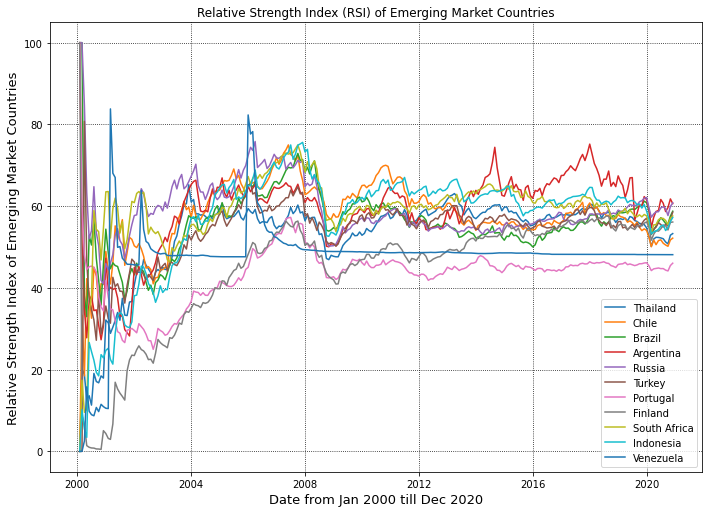

In [306]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand_RSI, label='Thailand')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Chile_RSI, label='Chile')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Brazil_RSI, label='Brazil')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina_RSI, label='Argentina')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Russia_RSI, label='Russia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Turkey_RSI, label='Turkey')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Portugal_RSI, label='Portugal')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Finland_RSI, label='Finland')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.South_Africa_RSI, label='South Africa')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Indonesia_RSI, label='Indonesia')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Venezuela_RSI, label='Venezuela')
plt.title('Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Relative Strength Index of Emerging Market Countries', fontsize=13)
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=4);

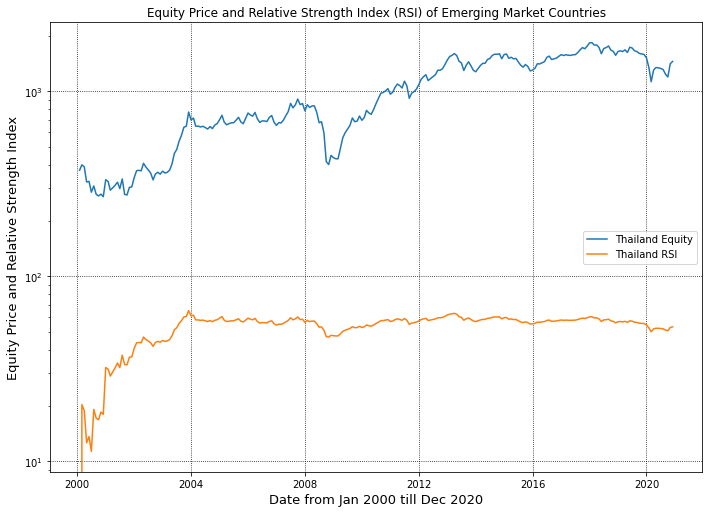

In [307]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand, label='Thailand Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Thailand_RSI, label='Thailand RSI')
plt.title('Equity Price and Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Price and Relative Strength Index', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

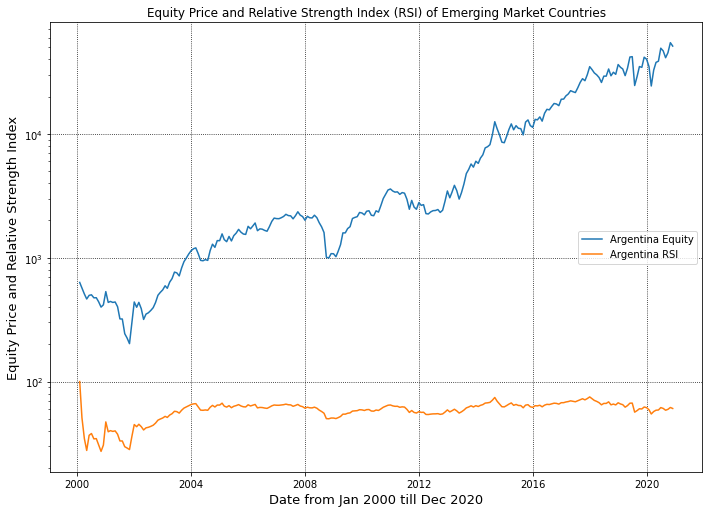

In [308]:
rcParams['figure.figsize'] = 11.69,8.27
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina, label='Argentina Equity')
plt.plot(emerg_market_df_2000_2020.index, emerg_market_df_2000_2020.Argentina_RSI, label='Argentina RSI')
plt.title('Equity Price and Relative Strength Index (RSI) of Emerging Market Countries')
plt.xlabel('Date from Jan 2000 till Dec 2020', fontsize=13)
plt.ylabel('Equity Price and Relative Strength Index', fontsize=13)
plt.yscale('log')
plt.grid(True, color='k', linestyle=':')
plt.legend(loc=5);

In [309]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
bond_df_2000_2020 = pd.read_csv('Bond_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(bond_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
bond_df_2000_2020.head()

(252, 7)


Date  Germany  Australia      US      UK  Canada   Japan
0  1/1/2000    98.71     102.11   95.28  100.23   92.80   99.87
1  2/1/2000    99.07     106.07  100.59  102.33   95.62   99.70
2  3/1/2000   101.07     108.00  103.66  103.86   96.91  100.86
3  4/1/2000   100.46     107.28  102.28  104.06   95.09  100.13
4  5/1/2000   100.53     109.13  101.53  104.33   96.27  100.59

In [310]:
# Use pandas.to_datetime() function to convert argument to datetime
bond_df_2000_2020['Date'] = pd.to_datetime(bond_df_2000_2020.Date)

In [311]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
bond_df_2000_2020.set_index('Date',inplace=True)

In [312]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
bond_df_2000_2020 = np.log(1+bond_df_2000_2020[['Germany','Australia','US','UK','Canada','Japan']].pct_change())

In [314]:
# Use pandas.DataFrame.dropna(axis=0) function to remove missing values in rows (the first row)
bond_df_2000_2020.dropna(axis=0, inplace=True)
bond_df_2000_2020.head(5)

Germany  Australia        US        UK    Canada     Japan
Date                                                                   
2000-02-01  0.003640   0.038049  0.054233  0.020735  0.029935 -0.001704
2000-03-01  0.019987   0.018032  0.030063  0.014841  0.013401  0.011568
2000-04-01 -0.006054  -0.006689 -0.013402  0.001924 -0.018959 -0.007264
2000-05-01  0.000697   0.017098 -0.007360  0.002591  0.012333  0.004584
2000-06-01 -0.003687   0.000092  0.020086  0.000862  0.012798 -0.011901

In [315]:
1/6

0.16666666666666666

In [316]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [318]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(bond_df_2000_2020.mean(), weights)

0.0003965069725551601

In [319]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [320]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
bond_df_2000_2020.cov()

Germany  Australia        US        UK    Canada     Japan
Germany    0.000378   0.000101  0.000213  0.000139  0.000132  0.000030
Australia  0.000101   0.000941  0.000206  0.000198  0.000233  0.000026
US         0.000213   0.000206  0.000609  0.000187  0.000226  0.000037
UK         0.000139   0.000198  0.000187  0.004597  0.000128  0.000051
Canada     0.000132   0.000233  0.000226  0.000128  0.000409  0.000031
Japan      0.000030   0.000026  0.000037  0.000051  0.000031  0.000143

In [322]:
# Calculate the portfolio_variance 
portfolio_variance = weights[0]**2* 0.000378 + weights[1]**2* 0.000941 + weights[2]**2* 0.000609 + weights[3]**2* 0.004597 + weights[4]**2* 0.000409 + weights[5]**2* 0.000143
portfolio_variance

0.0001965833333333333

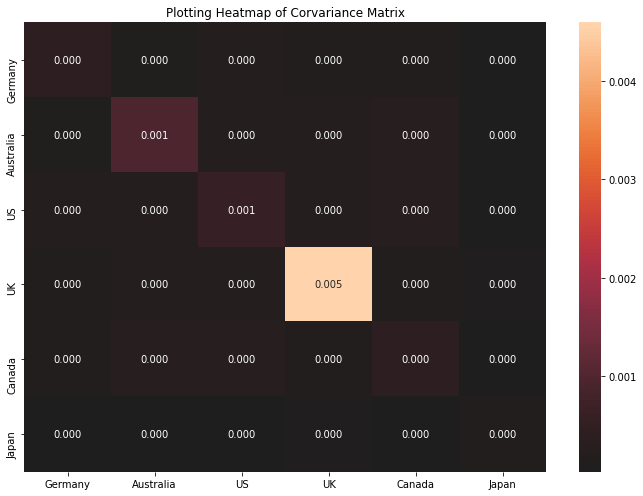

In [321]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(bond_df_2000_2020.cov(),annot=True,fmt='.3f', center=0);

In [323]:
# calculate the portfolio standard deviation (Standard deviation = Square root of the variance)
portfolio_standard_deviation = portfolio_variance**(1/2)
portfolio_standard_deviation

0.014020817855365403

In [324]:
bond_df_2000_2020.shape[0]

251

In [325]:
portfolio_variance**(1/2)*np.sqrt(251)

0.2221315301047257

In [326]:
# Calculate the portfolio_variance 
np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights)

0.00030429308287755245

In [327]:
# calculate the portfolio standard deviation
(np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

0.017443998477343216

In [328]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)

In [329]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [330]:
def weights_creator(bond_df_2000_2020):
    rand = np.random.random(len(bond_df_2000_2020.columns))
    rand /= rand.sum()
    return rand


In [331]:
weights_creator(bond_df_2000_2020)

array([0.00846891, 0.23111086, 0.12456408, 0.35365416, 0.18079241,
       0.10140958])

In [332]:
def portfolio_returns(weights):
    return np.dot(bond_df_2000_2020.mean(), weights)

In [333]:
weights = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666,
           0.16666666666666666, 0.16666666666666666]

In [334]:
portfolio_returns(weights)

0.0003965069725551601

In [335]:
def portfolio_std(weights):
    return (np.dot(np.dot(bond_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [336]:
portfolio_std(weights)

0.2758138334445684

In [337]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(bond_df_2000_2020)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)
    

In [338]:
returns

[0.0003523113476960883,
 0.0004709742056269835,
 0.0003328255338796779,
 0.0004201345092097363,
 0.0003019938804100554,
 0.00031136130197596346,
 0.00032096873680811363,
 0.00035348227676016667,
 0.0005680116860111438,
 0.0006494099543750245,
 0.0005643723747078143,
 0.00019783322647807437,
 0.000442012414048499,
 0.0003326656361456953,
 0.0002318177547541607,
 0.000579951959155778,
 0.0003788386671835399,
 0.00020449568407750163,
 0.00043661610325750104,
 0.00015364331516465218,
 0.00024381291627381836,
 0.00042095998837573536,
 0.0004814035716863889,
 0.00036858070131449885,
 0.00048120326599377457,
 0.00033439511754547306,
 0.0006059417392329377,
 0.0003516626509024335,
 0.00031633869616368767,
 0.0004254429560283241,
 0.00041201053385289476,
 0.000279561470162504,
 0.00011689946513501493,
 0.0004029480824685117,
 0.0007110435058640737,
 0.0005084945794715252,
 0.0004276246121748686,
 0.0003898957942893847,
 0.0006159363390332107,
 0.0003723976310895201,
 0.0004113628226544951,
 0.0

In [339]:
stds

[0.2537201292081696,
 0.25756236481665273,
 0.2509355487366148,
 0.2909051742928461,
 0.2256947630411741,
 0.25108316307592177,
 0.2613765324703013,
 0.23406627668515012,
 0.33189868899550057,
 0.3683117722109794,
 0.32986237478917346,
 0.2441896364748928,
 0.3640290546163102,
 0.2691636398924213,
 0.24632186168451234,
 0.3619155065926317,
 0.27507323793607297,
 0.2514624356739736,
 0.2949963286040887,
 0.20594936450593365,
 0.2613975732881865,
 0.2746023377722375,
 0.3447784839869792,
 0.27278726463848585,
 0.2661183010237399,
 0.27917458033803094,
 0.378039439592906,
 0.26298114249518495,
 0.22191360206931643,
 0.31615280252076183,
 0.2904766669479886,
 0.25992703358619473,
 0.21745658813732102,
 0.3290665335181491,
 0.5105300198005873,
 0.3261287228319708,
 0.29086472767273286,
 0.2754725596661853,
 0.3889450463691304,
 0.27442489930084324,
 0.288843510915368,
 0.4404827488701111,
 0.4247368316270471,
 0.24432115138260582,
 0.3920399911562437,
 0.29552384472123083,
 0.27575975392534

In [340]:
w

[array([0.1368542 , 0.2014628 , 0.07787424, 0.14416904, 0.19162816,
        0.24801155]),
 array([0.39097189, 0.01177012, 0.04959023, 0.12065034, 0.35329726,
        0.07372016]),
 array([0.04857771, 0.21501151, 0.12961616, 0.11538085, 0.27047711,
        0.22093665]),
 array([0.15846536, 0.20114731, 0.09824889, 0.18899723, 0.18227074,
        0.17087046]),
 array([0.08718508, 0.1216303 , 0.21750064, 0.07134602, 0.27062886,
        0.23170911]),
 array([0.15607219, 0.14922443, 0.27835064, 0.11479021, 0.10991844,
        0.19164409]),
 array([0.1174268 , 0.16912461, 0.21204441, 0.15994473, 0.03658508,
        0.30487438]),
 array([0.29482559, 0.06382051, 0.17123608, 0.10911644, 0.15997556,
        0.20102581]),
 array([0.11503774, 0.00293545, 0.19195033, 0.24945857, 0.26045477,
        0.18016314]),
 array([0.19386055, 0.06950314, 0.0402447 , 0.28450344, 0.35016483,
        0.06172334]),
 array([0.23395291, 0.10292463, 0.00274405, 0.24714524, 0.28126409,
        0.13196908]),
 array([0.

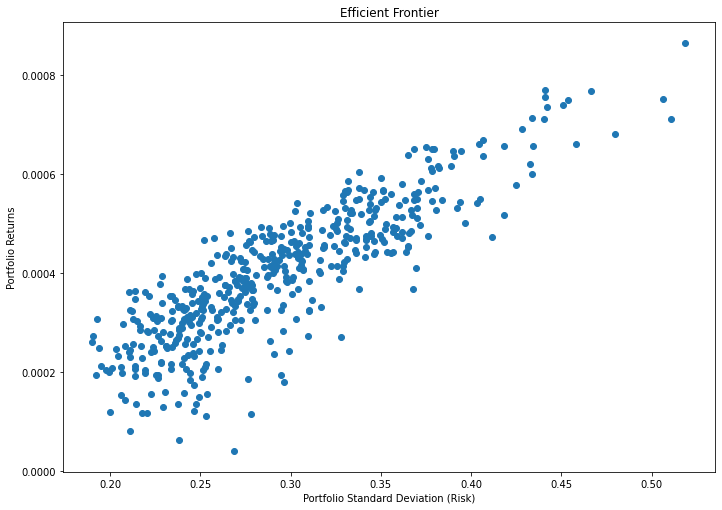

In [341]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [343]:
bond_df_2000_2020.shape[0]

251

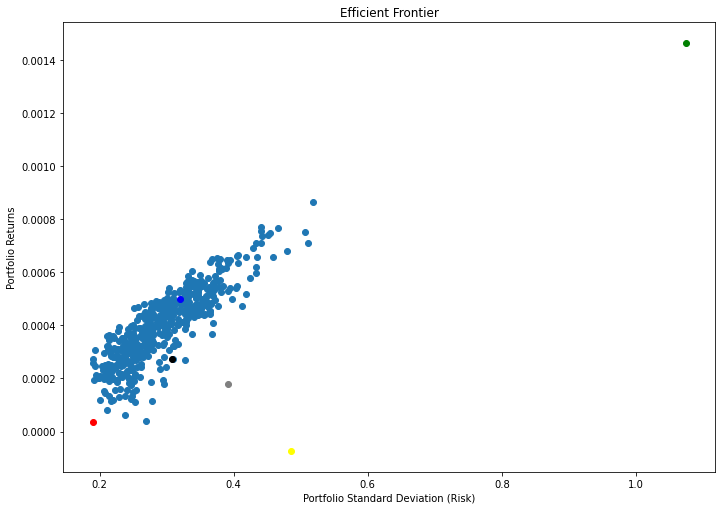

In [344]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(251), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(251), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(251), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(251), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(251), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(251), bond_df_2000_2020.mean().iloc[5],c='red')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [345]:
min(stds)

0.19015529068144432

In [346]:
stds.index(min(stds))

344

In [347]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.000259563724250413

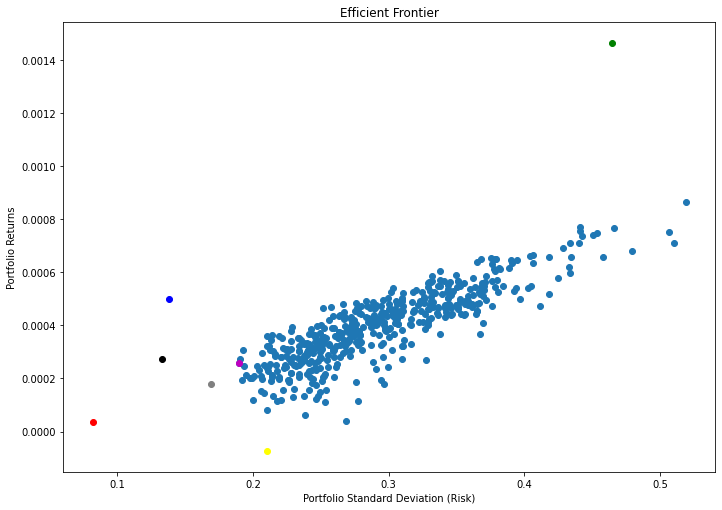

In [348]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(bond_df_2000_2020.std().iloc[0]*np.sqrt(47), bond_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(bond_df_2000_2020.std().iloc[1]*np.sqrt(47), bond_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(bond_df_2000_2020.std().iloc[2]*np.sqrt(47), bond_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(bond_df_2000_2020.std().iloc[3]*np.sqrt(47), bond_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(bond_df_2000_2020.std().iloc[4]*np.sqrt(47), bond_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(bond_df_2000_2020.std().iloc[5]*np.sqrt(47), bond_df_2000_2020.mean().iloc[5],c='red')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Portfolio Returns')
plt.show();

In [349]:
# Dataset (Bond.csv) from Master Equity Portfolio Excel file
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
equity_df_2000_2020 = pd.read_csv('Equity_2000_2020.csv')

# Use pandas.DataFrame.shape function to return a tuple representing the dimensionality of the DataFrame
print(equity_df_2000_2020.shape)

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on positioms
equity_df_2000_2020.head()

(252, 15)


Date  Australia  Nethelands  Germany   Canada     Hong_Kong  \
0  1/1/2000     3080.2      612.38  6835.60  8481.11  1.553234e+10   
1  2/1/2000     3124.6      664.28  7644.55  9128.99  1.716944e+10   
2  3/1/2000     3133.3      662.29  7599.39  9462.39  1.740654e+10   
3  4/1/2000     3115.8      661.38  7414.68  9347.61  1.551930e+10   
4  5/1/2000     3081.0      655.50  7109.67  9251.99  1.471386e+10   

        France        Belgium            US    Japan     Spain  Sweden   \
0  5.659810e+09  2.806290e+09  1.394460e+09  19539.70  10835.1  1220.23   
1  6.190960e+09  2.746080e+09  1.366420e+09  19959.52  12585.8  1433.08   
2  6.286050e+09  2.777840e+09  1.498580e+09  20337.32  11935.0  1383.66   
3  6.419720e+09  2.813280e+09  1.452430e+09  17973.70  11467.9  1429.61   
4  6.426260e+09  2.849430e+09  1.420600e+09  16332.45  10688.5  1377.15   

        UK   Italy  Singapore  
0  6268.50  112.52    3958.79  
1  6232.56  109.75    3844.90  
2  6540.22  108.78    3907.83  
3  6327.43  103.99    3709.37  
4  6359.35  101.37    3666.83

In [350]:
# Use pandas.to_datetime() function to convert argument to datetime
equity_df_2000_2020['Date'] = pd.to_datetime(equity_df_2000_2020.Date)

In [351]:
# Use pandas.DataFrame.set.index() function to set the DataFrame index using existing column ("Date")
equity_df_2000_2020.set_index('Date',inplace=True)

In [352]:
# Use pandas.DataFrame.rename() function to alter axes labels (to remove space in the name)
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'France ':'France'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Japan ':'Japan'})
equity_df_2000_2020 = equity_df_2000_2020.rename(columns={'Sweden ':'Sweden'})

In [353]:
# use the pandas.DataFrame.pct_change() method to get percentage change between the current and a prior element.
equity_df_2000_2020 = np.log(1+equity_df_2000_2020[['Australia','Nethelands','Germany','Canada','Hong_Kong','France','Belgium',
                       'US','Japan','Spain','Sweden','UK','Italy','Singapore']].pct_change())
equity_df_2000_2020.head(5)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-01-01        NaN         NaN       NaN       NaN        NaN       NaN   
2000-02-01   0.014312    0.081351  0.111849  0.073614   0.100207  0.089700   
2000-03-01   0.002780   -0.003000 -0.005925  0.035870   0.013715  0.015243   
2000-04-01  -0.005601   -0.001375 -0.024606 -0.012204  -0.114762  0.021042   
2000-05-01  -0.011232   -0.008930 -0.042006 -0.010282  -0.053294  0.001018   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2000-02-01 -0.021689 -0.020313  0.021258  0.149778  0.160787 -0.005750   
2000-03-01  0.011499  0.092324  0.018751 -0.053094 -0.035094  0.048184   
2000-04-01  0.012677 -0.031280 -0.123548 -0.039923  0.032670 -0.033077   
2000-05-01  0.012768 -0.022159 -0.095756 -0.070383 -0.037386  0.005032   

               Italy  Singapore  
Date                             
2000-01-01       NaN        NaN  
2000-02-01 -0.024926  -0.029191  
2000-03-01 -0.008878   0.016235  
2000-04-01 -0.045033  -0.052120  
2000-05-01 -0.025518  -0.011535

In [354]:
# Use pandas.DataFrame.dropna() function to remove missing values in rows
equity_df_2000_2020.dropna(axis=0, inplace=True)
equity_df_2000_2020.head(4)

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Date                                                                         
2000-02-01   0.014312    0.081351  0.111849  0.073614   0.100207  0.089700   
2000-03-01   0.002780   -0.003000 -0.005925  0.035870   0.013715  0.015243   
2000-04-01  -0.005601   -0.001375 -0.024606 -0.012204  -0.114762  0.021042   
2000-05-01  -0.011232   -0.008930 -0.042006 -0.010282  -0.053294  0.001018   

             Belgium        US     Japan     Spain    Sweden        UK  \
Date                                                                     
2000-02-01 -0.021689 -0.020313  0.021258  0.149778  0.160787 -0.005750   
2000-03-01  0.011499  0.092324  0.018751 -0.053094 -0.035094  0.048184   
2000-04-01  0.012677 -0.031280 -0.123548 -0.039923  0.032670 -0.033077   
2000-05-01  0.012768 -0.022159 -0.095756 -0.070383 -0.037386  0.005032   

               Italy  Singapore  
Date                             
2000-02-01 -0.024926  -0.029191  
2000-03-01 -0.008878   0.016235  
2000-04-01 -0.045033  -0.052120  
2000-05-01 -0.025518  -0.011535

In [355]:
1/14

0.07142857142857142

In [356]:
weights = [0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
           0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
          0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]

In [357]:
# Use numpy.dot() function to returns the dot product of two arrays.
np.dot(equity_df_2000_2020.mean(), weights)

0.0011164279767861187

In [358]:
def portfolio_returns(weights):
    return np.dot(equity_df_2000_2020.mean(), weights)

In [359]:
portfolio_returns(weights)

0.0011164279767861187

In [360]:
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
equity_df_2000_2020.cov()

Australia  Nethelands   Germany    Canada  Hong_Kong    France  \
Australia    0.001580    0.001494  0.001619  0.001205   0.001437  0.001518   
Nethelands   0.001494    0.003006  0.002950  0.001628   0.002079  0.002607   
Germany      0.001619    0.002950  0.003769  0.001744   0.002300  0.002960   
Canada       0.001205    0.001628  0.001744  0.001735   0.001715  0.001580   
Hong_Kong    0.001437    0.002079  0.002300  0.001715   0.003608  0.001962   
France       0.001518    0.002607  0.002960  0.001580   0.001962  0.002746   
Belgium      0.001454    0.002344  0.002429  0.001426   0.001775  0.002250   
US           0.001286    0.001911  0.002188  0.001472   0.001830  0.001895   
Japan        0.001364    0.001948  0.002148  0.001418   0.001981  0.001897   
Spain        0.001556    0.002493  0.002855  0.001592   0.002165  0.002643   
Sweden       0.001348    0.002439  0.002817  0.001502   0.002094  0.002391   
UK           0.001174    0.001859  0.002007  0.001241   0.001580  0.001823   
Italy        0.000086   -0.000226 -0.000213 -0.000089  -0.000116 -0.000175   
Singapore    0.000090    0.000050  0.000120  0.000039  -0.000088 -0.000016   

             Belgium        US     Japan     Spain    Sweden        UK  \
Australia   0.001454  0.001286  0.001364  0.001556  0.001348  0.001174   
Nethelands  0.002344  0.001911  0.001948  0.002493  0.002439  0.001859   
Germany     0.002429  0.002188  0.002148  0.002855  0.002817  0.002007   
Canada      0.001426  0.001472  0.001418  0.001592  0.001502  0.001241   
Hong_Kong   0.001775  0.001830  0.001981  0.002165  0.002094  0.001580   
France      0.002250  0.001895  0.001897  0.002643  0.002391  0.001823   
Belgium     0.002519  0.001688  0.001658  0.002228  0.001921  0.001619   
US          0.001688  0.001951  0.001666  0.001836  0.001812  0.001467   
Japan       0.001658  0.001666  0.003208  0.001998  0.001887  0.001374   
Spain       0.002228  0.001836  0.001998  0.003526  0.002365  0.001781   
Sweden      0.001921  0.001812  0.001887  0.002365  0.003027  0.001618   
UK          0.001619  0.001467  0.001374  0.001781  0.001618  0.001639   
Italy      -0.000054  0.000018  0.000014 -0.000229 -0.000144 -0.000159   
Singapore   0.000130  0.000001  0.000034  0.000122 -0.000009  0.000094   

               Italy  Singapore  
Australia   0.000086   0.000090  
Nethelands -0.000226   0.000050  
Germany    -0.000213   0.000120  
Canada     -0.000089   0.000039  
Hong_Kong  -0.000116  -0.000088  
France     -0.000175  -0.000016  
Belgium    -0.000054   0.000130  
US          0.000018   0.000001  
Japan       0.000014   0.000034  
Spain      -0.000229   0.000122  
Sweden     -0.000144  -0.000009  
UK         -0.000159   0.000094  
Italy       0.004694   0.002651  
Singapore   0.002651   0.004385

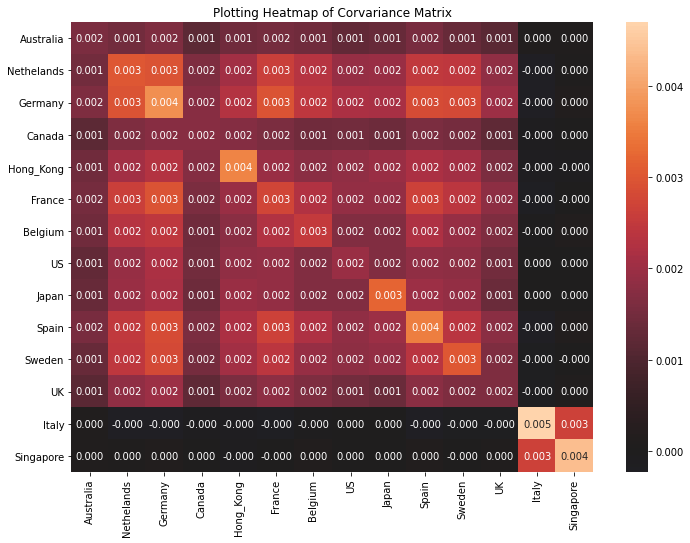

In [361]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.title('Plotting Heatmap of Corvariance Matrix');
# Use seaborn.heatmap() function to plot rectangular data as a color-encoded matrix.
# Use pandas.DataFrame.cov() to Compute pairwise covariance of columns, excluding NA/null values.
sb.heatmap(equity_df_2000_2020.cov(),annot=True,fmt='.3f', center=0);

In [362]:
# Calculate the portfolio_variance 
np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights)

0.0014993773827110916

In [363]:
# calculate the portfolio standard deviation
(np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights))**(1/2)

0.03872179467316942

**The Efficient Frontier**

- The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. 
- Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

In [364]:
def weights_creator(equity_df_2000_2020):
    rand = np.random.random(len(equity_df_2000_2020.columns))
    rand /= rand.sum()
    return rand

In [365]:
weights_creator(equity_df_2000_2020)

array([0.05479133, 0.10196545, 0.00290379, 0.01431179, 0.07556079,
       0.09338629, 0.06878015, 0.1281163 , 0.08573629, 0.03613208,
       0.06203958, 0.12102787, 0.02787592, 0.12737238])

In [366]:
weights = [0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
           0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142,
          0.07142857142857142, 0.07142857142857142, 0.07142857142857142, 0.07142857142857142]

In [367]:
def portfolio_returns(weights):
    return np.dot(equity_df_2000_2020.mean(), weights)

In [368]:
portfolio_returns(weights)

0.0011164279767861187

In [369]:
equity_df_2000_2020.shape[0]

251

In [370]:
def portfolio_std(weights):
    return (np.dot(np.dot(equity_df_2000_2020.cov(),weights),weights))**(1/2)*np.sqrt(251)

In [371]:
portfolio_std(weights)

0.6134685998977323

In [372]:
# Generate efficient frontier

returns = []
stds = []
w = []

for i in range(500):
    weights = weights_creator(equity_df_2000_2020)
    returns.append(portfolio_returns(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)

In [373]:
returns

[0.0005647516786089592,
 0.000996851023471776,
 0.0013965977541555185,
 0.002137770943465152,
 0.0014138043836508139,
 0.0010333852729759634,
 0.001238892689818357,
 0.0014387760796468927,
 0.000979813354037522,
 0.0009282041295748269,
 0.0010391417488749834,
 0.0006560720415874459,
 0.000923749763365671,
 0.0010882562571178772,
 0.0008246021099696987,
 0.001511091798259513,
 0.001662769741600842,
 0.000851315918036645,
 0.000997970377204459,
 0.0014644880146559309,
 0.001119690819404483,
 0.0014982356953990158,
 0.0009355666679484162,
 0.0008445460581082368,
 0.0007659548704969615,
 0.0012776048115927018,
 0.0010969472766736846,
 0.0013725158723144198,
 0.0012015545437886479,
 0.00021467456028591688,
 0.00123184430211814,
 0.0008353554618167671,
 0.000989088640727712,
 0.00108734127930761,
 0.000990513039393028,
 0.0016014505969448208,
 0.000326653143183391,
 0.0006518816591153878,
 0.0011354098306061641,
 0.0010782356823233327,
 0.0011695445964732714,
 0.0010528019052754105,
 0.00103

In [374]:
stds

[0.6041138972613759,
 0.6161827400738189,
 0.6200658975183334,
 0.6703076643560251,
 0.6307578166735301,
 0.5579751363317106,
 0.6209917090048198,
 0.6904628270981359,
 0.5823265277553535,
 0.582918760548375,
 0.6272969819038328,
 0.5987118040250079,
 0.6104303024860313,
 0.609610931069822,
 0.5969240897222964,
 0.688673271852314,
 0.6259430640061701,
 0.6304218286412798,
 0.6357825445736779,
 0.5932148727658455,
 0.6116206192721628,
 0.5617288768638181,
 0.6148257100118689,
 0.6145363464936136,
 0.5930712989972261,
 0.5814792592204827,
 0.6206624781051946,
 0.6044528848484979,
 0.6276943116918373,
 0.5951269828249011,
 0.6227589823339725,
 0.6278670830247681,
 0.5771297040786196,
 0.6486713932266842,
 0.6161401803679879,
 0.6087902865941257,
 0.6375093355045933,
 0.5980723813709323,
 0.5860111879792734,
 0.6305619442179697,
 0.5944194078372765,
 0.6996666255411486,
 0.5932018789025313,
 0.6565129787773702,
 0.607414199934056,
 0.6500506052273809,
 0.5967048548759685,
 0.60455526327433

In [375]:
w

[array([0.03873154, 0.1120323 , 0.11160477, 0.00548391, 0.07427907,
        0.05136972, 0.10776238, 0.03574936, 0.00448897, 0.08858231,
        0.05575433, 0.04758688, 0.13294258, 0.13363189]),
 array([0.06205794, 0.08637546, 0.06698561, 0.01291701, 0.10979677,
        0.08955475, 0.10997705, 0.09058666, 0.10493259, 0.07211861,
        0.00157795, 0.01990417, 0.08735666, 0.08585876]),
 array([0.10501732, 0.10965655, 0.08594424, 0.08938638, 0.05731425,
        0.06197483, 0.05128513, 0.11825807, 0.02089291, 0.04319226,
        0.06762244, 0.07383338, 0.05075833, 0.0648639 ]),
 array([0.14937861, 0.0701917 , 0.13878186, 0.00215848, 0.14434538,
        0.04281815, 0.03380635, 0.17096526, 0.04082565, 0.02966271,
        0.11147979, 0.00217281, 0.05326455, 0.01014872]),
 array([0.11703689, 0.09108668, 0.106409  , 0.09515028, 0.05590692,
        0.02910139, 0.09657782, 0.0968462 , 0.05133393, 0.07557275,
        0.06248248, 0.01244986, 0.03981709, 0.07022872]),
 array([0.08941129, 0.02111305

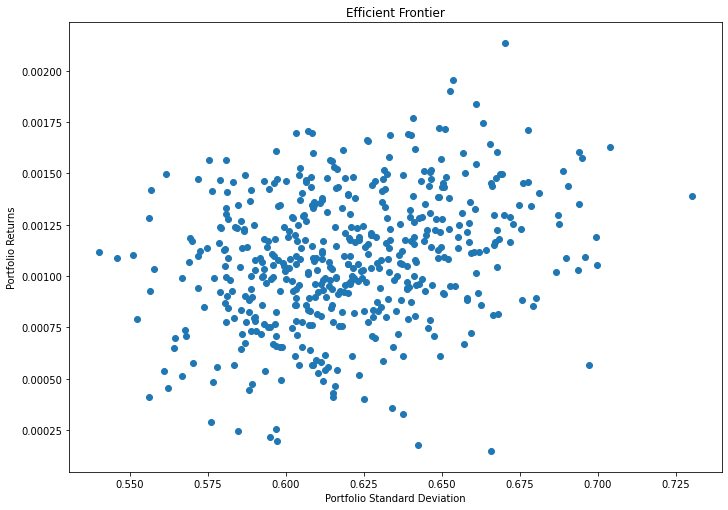

In [376]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

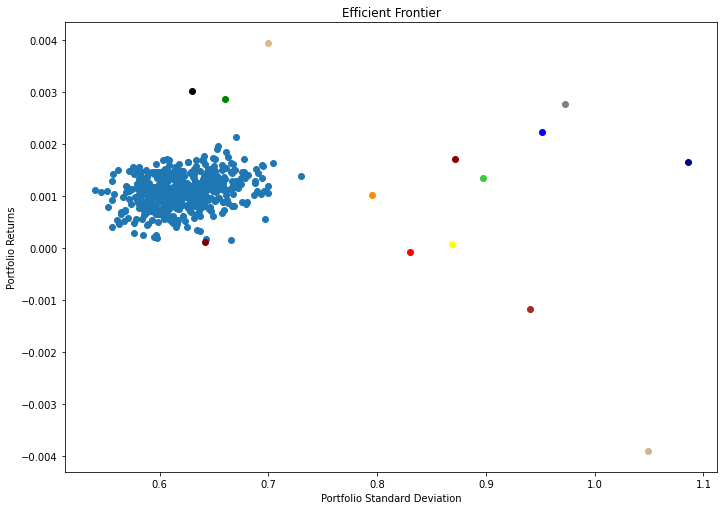

In [377]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)
plt.scatter(equity_df_2000_2020.std().iloc[0]*np.sqrt(251), equity_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(equity_df_2000_2020.std().iloc[1]*np.sqrt(251), equity_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(equity_df_2000_2020.std().iloc[2]*np.sqrt(251), equity_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(equity_df_2000_2020.std().iloc[3]*np.sqrt(251), equity_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(equity_df_2000_2020.std().iloc[4]*np.sqrt(251), equity_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(equity_df_2000_2020.std().iloc[5]*np.sqrt(251), equity_df_2000_2020.mean().iloc[5],c='red')
plt.scatter(equity_df_2000_2020.std().iloc[6]*np.sqrt(251), equity_df_2000_2020.mean().iloc[6],c='darkorange')
plt.scatter(equity_df_2000_2020.std().iloc[7]*np.sqrt(251), equity_df_2000_2020.mean().iloc[7],c='burlywood')
plt.scatter(equity_df_2000_2020.std().iloc[8]*np.sqrt(251), equity_df_2000_2020.mean().iloc[8],c='limegreen')
plt.scatter(equity_df_2000_2020.std().iloc[9]*np.sqrt(251), equity_df_2000_2020.mean().iloc[9],c='brown')
plt.scatter(equity_df_2000_2020.std().iloc[10]*np.sqrt(251), equity_df_2000_2020.mean().iloc[10],c='darkred')
plt.scatter(equity_df_2000_2020.std().iloc[11]*np.sqrt(251), equity_df_2000_2020.mean().iloc[11],c='maroon')
plt.scatter(equity_df_2000_2020.std().iloc[12]*np.sqrt(251), equity_df_2000_2020.mean().iloc[12],c='navy')
plt.scatter(equity_df_2000_2020.std().iloc[13]*np.sqrt(251), equity_df_2000_2020.mean().iloc[13],c='tan')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();

**Minimum Variance Portfolio (MV)**

- A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return.

- A minimum variance portfolio is a collection of securities that combine to minimize the price volatility of the overall portfolio. Volatility is a statistical measure of a particular security's price movement (ups and downs).

In [378]:
min(stds)

0.5402067924426174

In [379]:
stds.index(min(stds))

174

In [380]:
# Minimum Variance Portfolio
returns[stds.index(min(stds))]

0.0011150710501040225

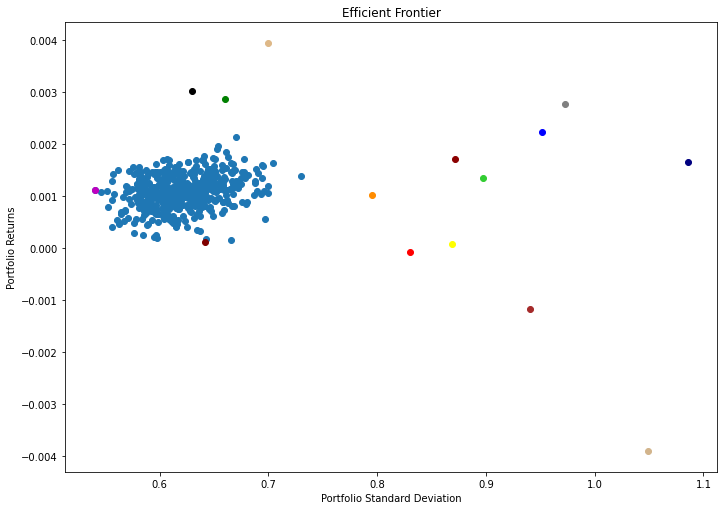

In [381]:
rcParams['figure.figsize'] = 11.69,8.27
plt.scatter(stds, returns)

plt.scatter(equity_df_2000_2020.std().iloc[0]*np.sqrt(251), equity_df_2000_2020.mean().iloc[0],c='k')
plt.scatter(equity_df_2000_2020.std().iloc[1]*np.sqrt(251), equity_df_2000_2020.mean().iloc[1],c='yellow')
plt.scatter(equity_df_2000_2020.std().iloc[2]*np.sqrt(251), equity_df_2000_2020.mean().iloc[2],c='gray')
plt.scatter(equity_df_2000_2020.std().iloc[3]*np.sqrt(251), equity_df_2000_2020.mean().iloc[3],c='green')
plt.scatter(equity_df_2000_2020.std().iloc[4]*np.sqrt(251), equity_df_2000_2020.mean().iloc[4],c='blue')
plt.scatter(equity_df_2000_2020.std().iloc[5]*np.sqrt(251), equity_df_2000_2020.mean().iloc[5],c='red')
plt.scatter(equity_df_2000_2020.std().iloc[6]*np.sqrt(251), equity_df_2000_2020.mean().iloc[6],c='darkorange')
plt.scatter(equity_df_2000_2020.std().iloc[7]*np.sqrt(251), equity_df_2000_2020.mean().iloc[7],c='burlywood')
plt.scatter(equity_df_2000_2020.std().iloc[8]*np.sqrt(251), equity_df_2000_2020.mean().iloc[8],c='limegreen')
plt.scatter(equity_df_2000_2020.std().iloc[9]*np.sqrt(251), equity_df_2000_2020.mean().iloc[9],c='brown')
plt.scatter(equity_df_2000_2020.std().iloc[10]*np.sqrt(251), equity_df_2000_2020.mean().iloc[10],c='darkred')
plt.scatter(equity_df_2000_2020.std().iloc[11]*np.sqrt(251), equity_df_2000_2020.mean().iloc[11],c='maroon')
plt.scatter(equity_df_2000_2020.std().iloc[12]*np.sqrt(251), equity_df_2000_2020.mean().iloc[12],c='navy')
plt.scatter(equity_df_2000_2020.std().iloc[13]*np.sqrt(251), equity_df_2000_2020.mean().iloc[13],c='tan')

plt.scatter(min(stds),returns[stds.index(min(stds))], c='m')

plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Returns')
plt.show();